# Starbucks Capstone Challenge

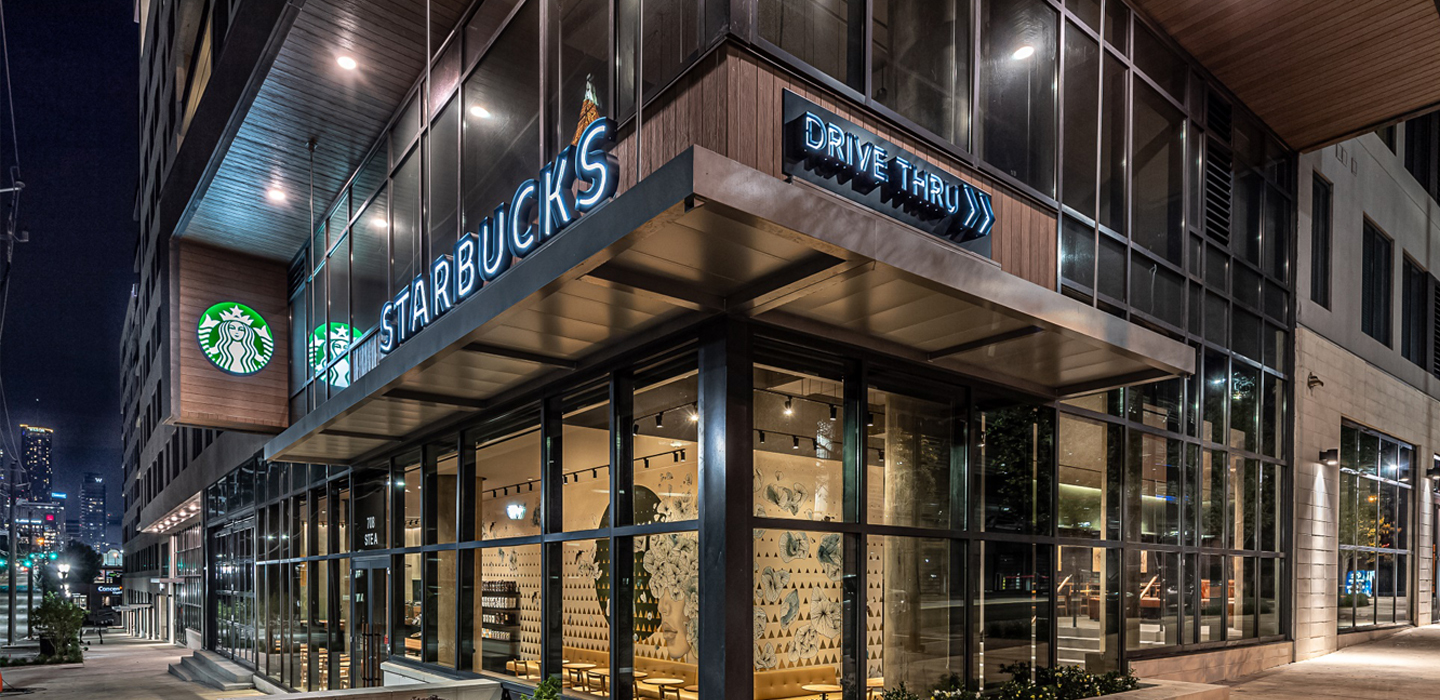

## Table of Contents

1. [Business Understanding](#1)
<br>    1.1. [Business Goals](#1.1)
<br>    1.2. [Situation Assessment](#1.2)
<br>    1.3. [Project Goals](#1.3)
<br>    1.4. [Project Plan](#1.4)

2. [Data Understanding](#2)
<br>    2.1. [Import Packages](#2.1)
<br>    2.2. [Gather Data](#2.2)
<br>    2.21. [Portfolio Data EDA](#2.21)
<br>    2.22. [Profile Data EDA](#2.22)
<br>    2.23. [Transcript Data EDA](#2.22)
<br>    2.3. [Assess Data](#2.3)

3. [Data Preperation](#3)
<br>    3.1. [Clean Data](#3.1)
<br>    3.2. [Integrating](#3.2)
<br>    3.3. [Numerical variable analysis](#3.2)

4. [Modelling](#4)
<br>    4.1. [Pre-processing](#4.1)
<br>    4.2. [Designing Tests](#4.2)
<br>    4.21. [Feature Scaling](#4.21)
<br>    4.22. [Explanatory Data Analysis](#4.22)
<br>    4.3. [Building models](#4.3)
<br>    4.4. [Assessing models](#4.4)

5. [Evaluation](#5)
<br>    5.1. [Evaluating results](#5.1)
<br>    5.2. [Reviewing the process](#5.2)
<br>    5.3. [Determining the next steps](#5.3)

6. [Deployment](#6)
<br>    6.1. [Planning deployment](#6.1)
<br>    6.2. [Reporting final results](#6.2)
<br>    6.3. [Reviewing final results](#6.3)

7. [Resources](#7)

<a id='1'></a>
## 1. Business Understanding

<a id='1.1'></a>
### 1.1. Business Goals

#### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks.

Not all users receive the same offer, and that is the challenge to solve with this data set.

Our task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. We'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, we can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

We'll use transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer.

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

#### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.  This could make data cleaning especially important and tricky.

#### Cleaning

We also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, we wouldn't want to send a buy 10 dollars get 2 dollars off offer. We want to try to assess what a certain demographic group will buy when not receiving any offers.

#### Analysis

Since this is a capstone project, we are free to analyze the data any way we see fit. For example, we could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or, we could build a model that predicts whether or not someone will respond to an offer but we don't need to build a machine learning model at all. We could develop a set of heuristics that determine what offer we should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

<a id='1.2'></a>
### 1.2. Situation Assessment

#### Inventory of resources

- Computer
- Dataset
- Jupyter Notebooks

#### Requirements, assumptions, and constraints

Completion by: 09/08/21

#### Risks and contingencies

- **Risk:** major changes in notebook.
- **Contingency:** Regular version uploads to GitHub.

#### Terminology

Create a list here of business terms and data-mining terms that are relevant to our project and write them down in a glossary with definitions (and perhaps examples), so that everyone involved in the project can have a common understanding of those terms.

#### Costs and benefits

Cost benefits will be documented here if data allows.

<a id='1.3'></a>
### 1.3. Project Goals

- Create a ML model to predict if a customer will respond to an offer.

<a id='1.4'></a>
### 1.4. Project Plan

#### Step 1

The plan is to build a machine learning model which predicts if a customer will respond to an offer or not. I believe the best strategy is to combine the data from the `portfolio`, `profile` and `transaction` datasets. From this created DataFrame, we will have various observations of each customer, offer, and transaction data. This will help me determine which attributes may affect if the customer will be successful completing an offer or not.

#### Step 2

Create visualisations for important columns such as how `gender`, `income` or when a user became a member. We can use this data to give us an idea of what data to keep or remove from the dataset.

#### Step 3

We an next create a **naive model** that assumes all offers were successful. From there, we will evaluate the **accuracy** and **F1-score** of the model to use a baseline to compare other models against. The **accuracy** is a measurement of how well our model correctly predicts if a offer is successful but it is not useful if the score is low. In the event the **accuracy** is low, we will need to use **precision** and **recall** to measure model performance since it's a weighted average of the **F1-score**.

#### Step 4

The **Naive Model** we created may not have the best performance with our data, so we must compare different models to see which one performs best. We can compare:
- **Logistic Regression.**
- **Random Forest.**

From here, we can fine tune the parameters of the model with the highest **accuracy** and **F1-score**.

#### Step 5

We can finish by concluding our findings in a debrief at the end.

<a id='2'></a>
## 2. Data Understanding

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

<a id='2.1'></a>
### 2.1. Import Packages

In [1]:
# Import
import pandas as pd
import numpy as np
import math
import json
import pickle
from datetime import datetime, date
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import os
import joblib
from joblib import dump, load
from tqdm import tqdm
import re
from re import search
import time
import logging
import import_ipynb
import styling_functions as style

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Import custom modules
from cf_matrix import make_confusion_matrix
import functions

# Display options
pd.set_option('display.max_rows', None, 'display.max_columns', None)

# Check module versions
print('Pandas Version:', pd.__version__)
print('NumPy Version:', np.__version__)
print('Seaborn Version:', sns.__version__)
print('Matplotlib Version:', matplotlib.__version__)

importing Jupyter notebook from styling_functions.ipynb
Pandas Version: 1.3.0
NumPy Version: 1.21.0
Seaborn Version: 0.11.1
Matplotlib Version: 3.4.2


In [2]:
# Print bold text
class bold:
    BOLD = '\033[1m'
    END = '\033[0m'

<a id='2.2'></a>
### 2.2. Gather Data

**Gather necessary data to answer our questions:**<br>
We have imported the libraries we need above. We will gather data provided to us from Udacity in the form of json files. The next step is to use `pd.read_json()` to import our data into pandas as dataframes.

In [3]:
# Read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

<a id='2.21'></a>
### 2.21 `Portfolio` Data EDA

**`Portfolio` Data Info**

This dataset holds data on the different offer campaigns used in the Starbucks app.

In [4]:
portfolio.head(10)

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [5]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [6]:
portfolio.isnull().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

**`Portfolio` Offer Type Distribution**

In [7]:
[*portfolio['offer_type'].unique()]

['bogo', 'informational', 'discount']

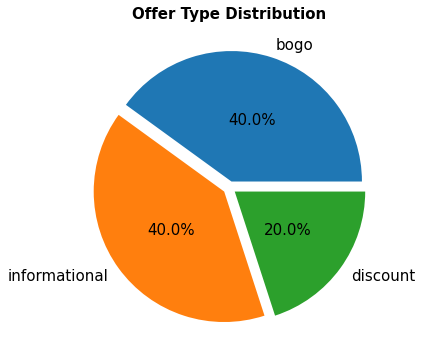

In [8]:
style.style_pie_1(title='Offer Type Distribution', labels=[*portfolio['offer_type'].dropna().unique()],
            data=portfolio['offer_type'].value_counts())

**`Portfolio Data` Observations:** 
- There are three types of offer including BOGO, information, discount offers
- There are 10 different offers in total. 4 of them are discounts, 4 are BOGO (Buy One Get One Free), and 2 of them are informational (advertisments).
- The `reward` and `difficulty` columns are in USD (US Dollars) units.
- The `duration` column is measured in `days`
- The `channel`, `offer_type`, and `id` columns are categorical
- There are no null values

<a id='2.22'></a>
### 2.22 `Profile` Data EDA

**`Profile` Data Info**

This dataset holds data on the demographics of users on the Starbucks app.

In [9]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [10]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [11]:
profile.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [12]:
# Looking for outliers
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


**`Profile` Age and Income Distribution**

In [13]:
profile[['age', 'income']].mean()

age          62.531412
income    65404.991568
dtype: float64

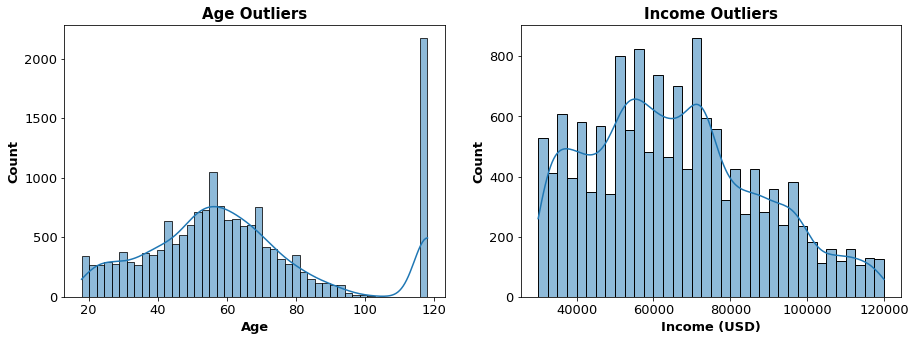

In [14]:
# Looking for age and income outliers in profile using histplot
f, axes = plt.subplots(1, 2, figsize=(15,5))

# Plots
ax1 = sns.histplot(ax=axes[0], data=profile, x='age', kde=True)
ax2 = sns.histplot(ax=axes[1], data=profile, x='income', kde=True)

# Style plot
style.style_sns_2('Age Outliers', 'Income Outliers', 'Age', 'Count', 'Income (USD)', 'Count', ax1, ax2)

**`Profile` Age and Income Distribution by Gender**

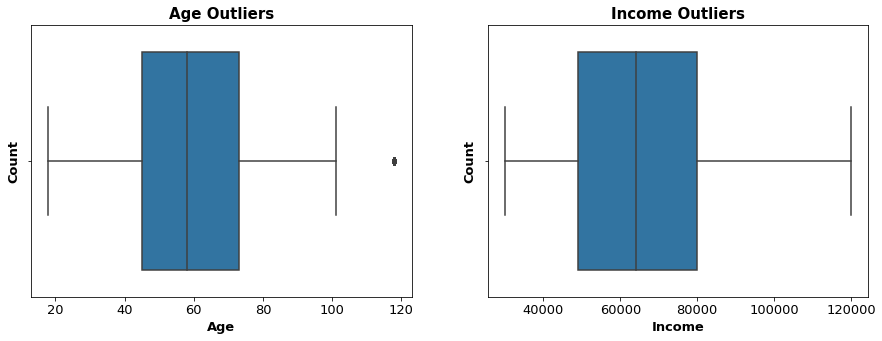

In [15]:
# Looking for age and income outliers in profile using boxplot
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Plots
ax1 = sns.boxplot(ax=axes[0], data=profile, x='age')
ax2 = sns.boxplot(ax=axes[1], data=profile, x='income')

# Style plot
style.style_sns_2('Age Outliers', 'Income Outliers', 'Age', 'Count', 'Income', 'Count', ax1, ax2)

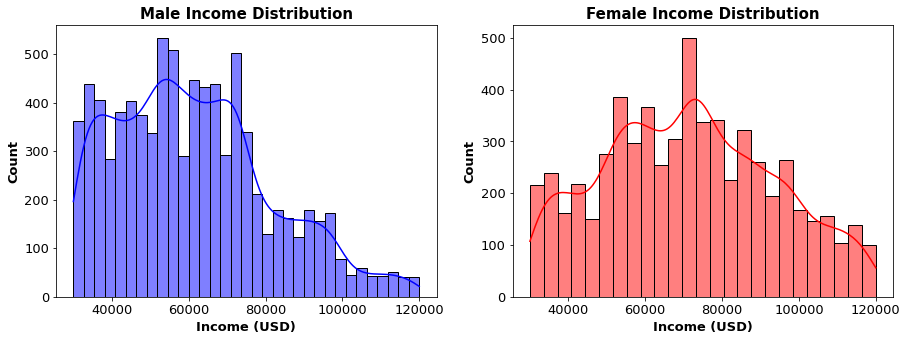

In [16]:
# Income for the main two genders in profile using histplot
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Data
profile_male = profile[profile['gender'] == 'M']
profile_female = profile[profile['gender'] == 'F']

# Plots
ax1 = sns.histplot(ax=axes[0], data=profile_male, x='income', kde=True, color='blue')
ax2 = sns.histplot(ax=axes[1], data=profile_female, x='income', kde=True, color='red')

# Style plot
style.style_sns_2('Male Income Distribution', 'Female Income Distribution', 'Income (USD)', 
                  'Count', 'Income (USD)', 'Count', ax1, ax2)

**`Profile` Age Groups Distribution**

In [17]:
print('Minimum age:', profile['age'].min())
print('Maximum age:', profile['age'].max())

Minimum age: 18
Maximum age: 118


In [18]:
# Create age groups
age_ranges = profile.drop(columns=['id', 'became_member_on', 'income']).copy()
a = age_ranges['age']
age_ranges['age_group'] = a

# Filter age ranges, then replace income integer with strings
age_ranges.loc[a.between(18, 24), 'age_group'] = '18-24'
age_ranges.loc[a.between(25, 34), 'age_group'] = '25-34'
age_ranges.loc[a.between(35, 44), 'age_group'] = '35-44'
age_ranges.loc[a.between(45, 54), 'age_group'] = '45-54'
age_ranges.loc[a.between(55, 64), 'age_group'] = '55-64'
age_ranges.loc[a.between(65, 74), 'age_group'] = '65-74'
age_ranges.loc[a.between(75, 84), 'age_group'] = '75-84'
age_ranges.loc[a.between(66, 94), 'age_group'] = '85-94'
age_ranges.loc[a.between(95, 104), 'age_group'] = '95-104'
age_ranges.loc[a.between(105, 119), 'age_group'] = '105+'

# Null data age ranges
null_ranges = age_ranges.loc[a.between(105, 118)]

In [19]:
# Formatting data for grouped bar plot
age_ranges = age_ranges.groupby(['age_group', 'gender'])['age'].count().reset_index().rename(columns={'age':'count'})
age_ranges['gender'] = age_ranges['gender'].replace({'F':'Female', 'M':'Male', 'O':'Other'})

In [20]:
age_ranges

,age_group,gender,count
0,18-24,Female,238
1,18-24,Male,629
2,18-24,Other,9
3,25-34,Female,407
4,25-34,Male,955
5,25-34,Other,18
6,35-44,Female,622
7,35-44,Male,1218
8,35-44,Other,29
9,45-54,Female,1247


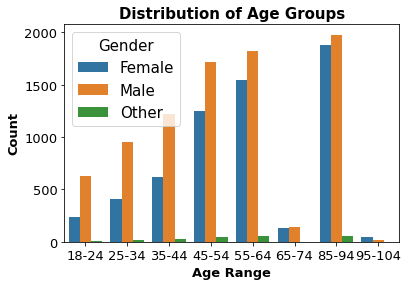

In [21]:
# Plot
sns.barplot(x='age_group', y='count', hue='gender', data=age_ranges).legend(title='Gender')

# Styling
style.style_sns_1(title='Distribution of Age Groups', 
                  xlabel='Age Range', ylabel='Count')

**Note:** None gender ages are omitted from the bar plot due to missing data.

In [22]:
# Sample of age ranges with null gender values
null_ranges.head()

,gender,age,age_group
0,None,118,105+
2,None,118,105+
4,None,118,105+
6,None,118,105+
7,None,118,105+


In [23]:
# Total count of ages over 115
print('Age outlier count:', profile['age'][profile['age'] > 115].count())

# Finding percentage of outliers in age
outliers = profile['age'][profile['age'] > 115].count()
all_age_counts = profile ['age'].count()
print('Age outlier percentage:', round(outliers/all_age_counts*100, 2), '%')

Age outlier count: 2175
Age outlier percentage: 12.79 %


We can see a large number of outliers here in the age column showing around 120 years of age. We could just use the median age to fill their values but the dataset would be imbalanced with most datapoints coming from the median age range. Since we only found 2175 ages over 115, we can safely delete them. We also found a pattern that all ages of 118 have a gender of `none` and income of `NaN`. This suggests to me there is an error with the data being input so it is useless to us even if we decided to impute the values.

**`Profile` Gender Distribution**

In [24]:
profile['gender'].value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

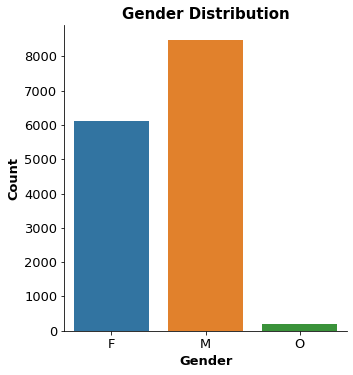

In [25]:
# Gender distribution
sns.catplot(x='gender', kind='count', data=profile)

# Style plot
style.style_sns_1('Gender Distribution', 'Gender', 'Count')

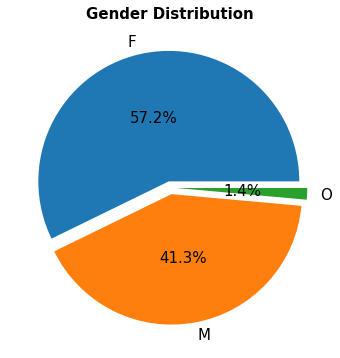

In [26]:
style.style_pie_1(title='Gender Distribution', labels=[*profile['gender'].dropna().unique()],
            data=profile['gender'].value_counts())

**`Profile` Distribution of when customer became a rewards member**

In [27]:
# Percentage of years users became members on
became_member_on = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')
became_member_year = became_member_on.dt.year.value_counts()
became_member_year *= 100 / became_member_year.sum()
became_member_year

2017    38.052941
2018    24.694118
2016    20.741176
2015    10.764706
2014     4.064706
2013     1.682353
Name: became_member_on, dtype: float64

In [28]:
# Percentage of years users became members on
became_member_on = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')
became_member_month = became_member_on.dt.month.value_counts()
became_member_month *= 100 / became_member_month.sum()
became_member_month

8     9.470588
10    9.223529
12    9.152941
1     8.970588
9     8.911765
11    8.523529
7     7.994118
3     7.817647
4     7.735294
5     7.688235
6     7.441176
2     7.070588
Name: became_member_on, dtype: float64

In [29]:
# Prepare data for bar plot
profile_members = profile[['became_member_on', 'gender']].copy()
profile_members['year'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d').dt.year
profile_members['gender'] = profile_members['gender'].replace({'F':'Female', 'M':'Male', 'O':'Other'})
member_date = profile_members.groupby(['year','gender']).count().reset_index().iloc[:,:3].rename(
    columns={'became_member_on':'count'})

member_date

,year,gender,count
0,2013,Female,74
1,2013,Male,197
2,2013,Other,3
3,2014,Female,138
4,2014,Male,520
5,2014,Other,4
6,2015,Female,663
7,2015,Male,905
8,2015,Other,29
9,2016,Female,1509


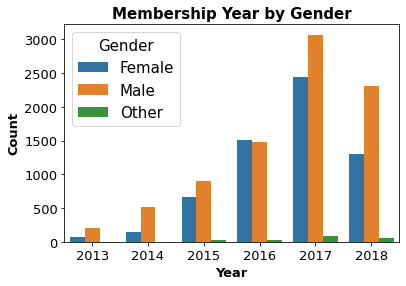

In [30]:
# Plot
sns.barplot(x='year', y='count', hue='gender', data=member_date).legend(title='Gender')

# Styling
style.style_sns_1(title='Membership Year by Gender', 
                     xlabel='Year', ylabel='Count')

**`Profile Data` Observations:** 
- The meadian and mean age of users is around 55 years old
- The maximum age is 118 which is an error, but the minimum age is 18
- Observations with age as 118 seem to be bad data since only the `id` hash is provided
- The income seems to have the most users between 50,000 to 70,000 USD which shows our demographic is mainly older, wealthier individuals
- The maximum income is 120,000 USD, but the minimum is 30,000 USD
- `id` column contains verbose hashes that can be converted to integers to make them easier to navigate
- The hashes should be mapped to the `Transcript` DataFrame since we can match the `id` values
- Females account for 57.2% of the dataset, males account for 41.3% and other only 1.4%. The gender distribution could create some imbalance later

<a id='2.23'></a>
### 2.23 `Transcript` Data EDA

**`Transcript` Data Info**

This dataset holds the transaction data including records for transactions, offers received, offers viewed, and offers completed.

In [31]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [32]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [33]:
transcript.isnull().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [34]:
transcript['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [35]:
transcript['person'].nunique()

17000

In [36]:
# Exploring the dictionaries
transcript['value'][0]

{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}

In [37]:
type(transcript['value'][0])

dict

In [38]:
transcript['value'][0].keys()

dict_keys(['offer id'])

In [39]:
# Iterate through the keys in value_col and append to list
value_col = transcript['value']
dict_counter = []
for x in value_col:
    try:
        dict_counter.append([*x.keys()]) # *unpacks the dict to reveal each string value
    except:
        dict_counter.extend([*x.keys()]) # if two values or more cause error then extend list

# File name        
file_name = "data/dict_counter.pkl"

# Save dict as pkl
open_file = open(file_name, "wb")
pickle.dump(dict_counter, open_file)
open_file.close()

In [40]:
# Load dict strings from pkl
open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()

In [41]:
# Unique values
loaded = np.array(loaded_list, dtype=object)
np.unique(loaded)

array([list(['amount']), list(['offer id']), list(['offer_id', 'reward'])],
      dtype=object)

**`Transcript Data` Observations:** 
- Found nested dicts in the transcript `value` column from the json which need to be unpacked/flattened to fix the issue
- There are no null values in the dataset
- Categorical columns found are `person`, `value`, `event`

**Note:** Portfolio data looks clean, no changes need to be made at the moment apart from renaming some columns to match the other dataframes.

<a id='2.3'></a>
### 2.3. Assess Data

<blockquote> 
<b>Quality:</b> issues with content. Low quality data is also known as dirty data. <br>
<b>Tidiness:</b> issues with structure that prevent easy analysis. Untidy data is also known as messy data.<br>
    <b>Tidy data requirements:</b>
Each variable forms a column.
Each observation forms a row.
Each type of observational unit forms a table.
</blockquote>

#### 1. Assess `Portfolio`

#### Quality issues

None.

#### Tidiness issues

1. Unpack lists in `channels` column then split categorical columns into dummies then drop their parent columns
2. Rename `id` column to `offer_id`
3. Map each offer hash to in `id` to an integer

#### 2. Assess `Profile`

#### Quality issues

**Note:** These issues should only be addressed after all datasets have been merged in order to retain each `id` hash

1. Missing data such as `None` in `gender` column
2. Missing data such as `NaN` in `income` column
3. Incorrect values such as `118` years old in `age` column

#### Tidiness issues

1. Format `became_member_on` as a datetime object then create `became_member_year` with just the year the user joined
2. Rename `id` column to `user_id`
3. Map each offer hash to in `id` to an integer
4. Split the `income` by quantiles for creating 5 equal income groups as strings
5. Split the `age` by ranges as strings

#### 3. Assess `Transcript`

#### Quality issues

None.

#### Tidiness issues

1. Rename `person` column to `user_id`
2. Unpack dict from `value` column to their own columns then drop `value` column
3. Map each offer hash to in `user_id` and `offer_id` to an integer

<a id='3'></a>
## 3. Data Preparation

To prepare our data we must clean our data then pre-process it in order to build a more accurate model. We also need to pay attention the total numbers of the selected variables. Selecting too few variables may not achieve high accuracy, while selecting too many variables may cause overfitting. In this section, we will select the top numerical variables with a high correlation to our response variable to use for our predictions. Dummy variables will be created for the selected categorical variables with 0, 1 encodings. A number of dummy variables with the highest correlations will be obtained to be used for the initial modeling.

**Reference:** https://towardsdatascience.com/introduction-to-data-preprocessing-in-machine-learning-a9fa83a5dc9d

<a id='3.1'></a>
### 3.1. Clean Data

In [42]:
# Copy dataframes
portfolio_new = portfolio.copy()
profile_new = profile.copy()
transcript_new = transcript.copy()

#### 1. Clean `portfolio_new`

#### Define

1. Unpack lists in `channels` column then split categorical columns into dummies then drop their parent columns
2. Rename `id` column to `offer_id`
3. Map each offer hash to in `id` to an integer

#### Code 1

In [43]:
# Unpack list to strings to prepare for dummies
portfolio_new['channels'] = portfolio_new['channels'].str.join(',')

# Use dummies to split at commas
channel_dummies = portfolio_new['channels'].str.get_dummies(',')

# Show dummies
channel_dummies

,email,mobile,social,web
0,1,1,1,0
1,1,1,1,1
2,1,1,0,1
3,1,1,0,1
4,1,0,0,1
5,1,1,1,1
6,1,1,1,1
7,1,1,1,0
8,1,1,1,1
9,1,1,0,1


In [44]:
# Get dummies from offer_type column
offer_dummies = pd.get_dummies(portfolio_new['offer_type'], prefix=None)

In [45]:
# Append dummies to portfolio then drop parent columns
portfolio_new = pd.concat([portfolio_new, offer_dummies], axis=1).drop(columns=['offer_type'])
portfolio_new = pd.concat([portfolio_new, channel_dummies], axis=1).drop(columns=['channels'])

#### Code 2

In [46]:
# Rename portfolio columns
portfolio_new = portfolio_new.rename(columns={'id':'offer_id'})

#### Code 3

In [47]:
# Store copy for future use as offer_id hash map
portfolio_hash = portfolio_new.copy() 

# Take the unique hashes from offer_id
offer_id = portfolio_new['offer_id'].unique()
offer_id

array(['ae264e3637204a6fb9bb56bc8210ddfd',
       '4d5c57ea9a6940dd891ad53e9dbe8da0',
       '3f207df678b143eea3cee63160fa8bed',
       '9b98b8c7a33c4b65b9aebfe6a799e6d9',
       '0b1e1539f2cc45b7b9fa7c272da2e1d7',
       '2298d6c36e964ae4a3e7e9706d1fb8c2',
       'fafdcd668e3743c1bb461111dcafc2a4',
       '5a8bc65990b245e5a138643cd4eb9837',
       'f19421c1d4aa40978ebb69ca19b0e20d',
       '2906b810c7d4411798c6938adc9daaa5'], dtype=object)

In [48]:
# Add dict to each hash
offer_dict = portfolio_new['offer_id'].to_dict()
offer_dict

{0: 'ae264e3637204a6fb9bb56bc8210ddfd',
 1: '4d5c57ea9a6940dd891ad53e9dbe8da0',
 2: '3f207df678b143eea3cee63160fa8bed',
 3: '9b98b8c7a33c4b65b9aebfe6a799e6d9',
 4: '0b1e1539f2cc45b7b9fa7c272da2e1d7',
 5: '2298d6c36e964ae4a3e7e9706d1fb8c2',
 6: 'fafdcd668e3743c1bb461111dcafc2a4',
 7: '5a8bc65990b245e5a138643cd4eb9837',
 8: 'f19421c1d4aa40978ebb69ca19b0e20d',
 9: '2906b810c7d4411798c6938adc9daaa5'}

In [49]:
# Swap keys and hash values and start dict from 1 instead of 0
offer_dict = dict([(value, key) for key, value in offer_dict.items()])
offer_dict = dict([(key, value +1) for key, value in offer_dict.items()])

offer_dict

{'ae264e3637204a6fb9bb56bc8210ddfd': 1,
 '4d5c57ea9a6940dd891ad53e9dbe8da0': 2,
 '3f207df678b143eea3cee63160fa8bed': 3,
 '9b98b8c7a33c4b65b9aebfe6a799e6d9': 4,
 '0b1e1539f2cc45b7b9fa7c272da2e1d7': 5,
 '2298d6c36e964ae4a3e7e9706d1fb8c2': 6,
 'fafdcd668e3743c1bb461111dcafc2a4': 7,
 '5a8bc65990b245e5a138643cd4eb9837': 8,
 'f19421c1d4aa40978ebb69ca19b0e20d': 9,
 '2906b810c7d4411798c6938adc9daaa5': 10}

In [50]:
# Map keys to hash in portfolio df
portfolio_new['offer_id'] = portfolio_new['offer_id'].map(offer_dict)

In [51]:
# Create a function for future mapping int to dict
def hash_map(df, col):
    '''This function replaces hashes with integers.
    
    INPUT:
    df - dataframe 'variable'
    col - column in dataframe containing the hashes 'string'
    
    
    OUTPUT:
    none.
    '''
    x_id = df[col].unique()
    x_dict = pd.Series(x_id).to_dict()
    x_dict = dict([(value, key) for key, value in x_dict.items()])
    x_dict = dict([(key, value +1) for key, value in x_dict.items()])
    df[col] = df[col].map(x_dict)
    
# Create a function for future mapping int to dict
def hash_map_offer(df_1, col_1, df_2, col_2):
    '''This function replaces hashes with integers.
    
    INPUT:
    df - dataframe 'variable'
    col - column in dataframe containing the hashes 'string'
    var - variable for column
    
    
    OUTPUT:
    none.
    '''
    # Input 1
    x_id = df_1[col_1].unique()
    x_dict = pd.Series(x_id).to_dict()
    x_dict = dict([(value, key) for key, value in x_dict.items()])
    x_dict = dict([(key, value +1) for key, value in x_dict.items()])
    
    # Input 2
    y_id = df_2[col_2].unique()
    y_dict = pd.Series(y_id).to_dict()
    y_dict = dict([(value, key) for key, value in y_dict.items()])
    y_dict = dict([(key, value +1) for key, value in y_dict.items()])
    df_1[col_1] = df_1[col_1].map(y_dict)

#### Test

In [52]:
# Sort columns
portfolio_new.insert(0, 'offer_id', portfolio_new.pop('offer_id'))
portfolio_new.insert(3, 'reward', portfolio_new.pop('reward'))

In [53]:
portfolio_new

,offer_id,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web
0,1,10,7,10,1,0,0,1,1,1,0
1,2,10,5,10,1,0,0,1,1,1,1
2,3,0,4,0,0,0,1,1,1,0,1
3,4,5,7,5,1,0,0,1,1,0,1
4,5,20,10,5,0,1,0,1,0,0,1
5,6,7,7,3,0,1,0,1,1,1,1
6,7,10,10,2,0,1,0,1,1,1,1
7,8,0,3,0,0,0,1,1,1,1,0
8,9,5,5,5,1,0,0,1,1,1,1
9,10,10,7,2,0,1,0,1,1,0,1


#### 2. Clean `profile_new`

#### Define

1. Drop missing data from `profile_new`
2. Format `became_member_on` as a datetime object then create `became_member_year` dummies
3. Rename `id` column to `user_id`
4. Map each offer hash to in `id` to an integer
5. Split the `income` by quantiles for creating 5 equal income groups as strings then get dummies
6. Split the `age` by ranges as strings then get dummies of each
7. Get `gender` dummies
8. Concatenate dummy columns

In [54]:
# Function to move column order
def move_column(df, col, pos):
    '''This function moves the selected column order.
    
    INPUT:
    df - dataframe 'variable'
    col - column in dataframe 'string'
    pos - index position to place col in dataframe 'integer'
    
    OUTPUT:
    none.
    '''
    df.insert(pos, col, df.pop(col))

#### Code 1

In [55]:
# Drop all missing data
profile_new = profile_new.dropna()

#### Code 2

In [56]:
# Convert became_member_on to datatime year object
profile_new['became_member_year'] = pd.to_datetime(profile_new['became_member_on'], format='%Y%m%d').dt.year

# Get dummies of member year
year_dummies = pd.get_dummies(profile_new['became_member_year'])

In [57]:
# Create memeber_time column
profile_new['member_days'] = pd.to_datetime(profile_new['became_member_on'], format='%Y%m%d')
profile_new['member_days'] = (datetime.now() - profile_new['member_days']).dt.days

**Reference:** https://www.geeksforgeeks.org/how-to-move-a-column-to-first-position-in-pandas-dataframe/

In [58]:
# Drop dummy parent columns
profile_new.drop(columns=['became_member_on', 'became_member_year'], inplace=True)

#### Code 3

In [59]:
# Rename portfolio columns
profile_new = profile_new.rename(columns={'id':'user_id'})

#### Code 4

In [60]:
# Using hash_map function to turn hashes into integers
hash_map(profile_new, 'user_id')

#### Code 5

In [61]:
# Split the income bands by quantiles for creating 5 equal income groups
bins = []
group_names = ['income_1', 'income_2', 'income_3', 'income_4', 'income_5']

for i in range(0, 12, 2):
    
    # Create 5 equal income groups using quantiles
    bin_values = profile_new['income'].quantile(q=[i/10]).values[0]
    bins.append(bin_values)
    
# Create column with groups    
profile_new['income_group'] = pd.cut(profile_new['income'], bins, labels=group_names)

In [62]:
# Change dtype from float to int as there are no null rows now
profile_new['income'] = profile_new['income'].astype(int)

# Income group dummies
income_dummies = pd.get_dummies(profile_new['income_group'], prefix=None)
profile_new = pd.concat([profile_new, income_dummies], axis=1).drop(columns=['income_group'])

**Reference:** https://pandas.pydata.org/docs/reference/api/pandas.cut.html

#### Code 6

In [63]:
# Create age groups
bins = [18, 24, 25, 34, 35, 44, 45, 54, 55, 
        64, 65, 74, 75, 84, 85, 94, 95, 104]

# Add age 18 to simplify looping
bin_edges = [bins[0]] 
group_names = []

# Skip every 2 in list using step
for i in range(0, len(bins)-1, 2):
    
    # Index bins and convert to string for labels
    names = str(bins[i]) + '_' + str(bins[i+1])
    group_names.append(names)
    
    # Age values to cut (+1 to skip age 18)
    bin_edges.append(bins[i+1])

# Create column with groups
profile_new['age_group'] = pd.cut(profile_new['age'], bins=bin_edges, labels=group_names)

# Turn age_group into dummies then sort columns by ages
age_dummies = pd.get_dummies(profile_new['age_group'], prefix=None)
age_dummies.head()

,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104
1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,1,0,0,0
12,0,0,0,0,1,0,0,0,0


In [64]:
# Join age dummies to profile
profile_age = profile_new[['user_id', 'age']].copy()
profile_new = pd.concat([profile_new, age_dummies], axis=1).drop(columns=['age', 'age_group'])

#### Code 7

In [65]:
# Create gender dummies
gender_dummies = pd.get_dummies(profile_new['gender'], prefix=None)
gender_dummies = gender_dummies.rename(columns={
    'F':'female', 'M':'male', 'O':'other'})

# Join dummies to profile
profile_new = pd.concat([profile_new, gender_dummies], axis=1).drop(columns=['gender'])

gender_dummies.head()

,female,male,other
1,1,0,0
3,1,0,0
5,0,1,0
8,0,1,0
12,0,1,0


In [66]:
# Move gender column to start of index
move_column(profile_new, 'female', 1) 
move_column(profile_new, 'male', 2) 
move_column(profile_new, 'other', 3); 

#### Code 8

In [67]:
# Concatenate other dummy columns
profile_new = pd.concat([profile_new, year_dummies], axis=1)

#### Test

In [68]:
# Move member_days column
move_col = profile_new.pop('member_days')
profile_new.insert(4, 'member_days', move_col)

**Reference:** https://www.geeksforgeeks.org/how-to-move-a-column-to-first-position-in-pandas-dataframe/

#### 3. Clean `transcript_new`

#### Define

1. Rename `person` column to `user_id`
2. Convert time from hours to days
3. Unpack dict from `value` column to their own columns then drop `value` column
4. Map each offer hash to in `user_id` and `offer_id` to an integer
5. Create `transaction` df by filtering only `user_id` values in `transcript` and `profile` df
    1. Drop null `offer_id` values and remove all columns apart from `user_id`, `time`, and `amount`
6. Create `offer_data` df by using dropna `offer_id` then drop columns `transaction`, `amount`

#### Code 1

In [69]:
# Rename transcript columns
transcript_new = transcript_new.rename(columns={'person':'user_id'})

#### Code 2

In [70]:
# Convert time into days (np.floor can accept arrays)
transcript_new['time'] = np.floor(transcript_new['time'] / 24).astype(int)

#### Code 3

In [71]:
# Extract dict from value column rows in their own columns
transcript_new['offer_id'] = [[*i.values()][0]if [*i.keys()][0] in ['offer id','offer_id'] else np.nan for i in transcript_new.value]
transcript_new['amount'] = [[*i.values()][0]if [*i.keys()][0] in ['amount','amount'] else np.nan for i in transcript_new.value]

# Drop value column
transcript_new = transcript_new.drop(columns=['value'])

#### Code 4

In [72]:
# Using hash_map function to turn hashes of user and offer_ids into integers
hash_map(transcript_new, 'user_id')
hash_map_offer(transcript_new, 'offer_id', portfolio_hash, 'offer_id')

#### Code 5

In [73]:
# Filter user_ids in (customer) profile df
user_count = transcript_new['user_id'].count()
transcript_new = transcript_new[transcript_new['user_id'].isin(profile_new['user_id'])]

# Print user counts before and after operation
print('User count before:', user_count)
print('User count after:', transcript_new['user_id'].count())

User count before: 306534
User count after: 275506


In [74]:
# Create transaction df from transcript
transaction = transcript_new[transcript_new['offer_id'].isna()]
transaction = transaction[['user_id', 'time', 'amount']]

In [75]:
# Get evemt dummies
event_dummies = pd.get_dummies(transcript_new['event'])

# Remove 'offer_' from column name
event_dummies.columns = [col.replace('offer ', '') for col in event_dummies.columns] 

# Join dummies to profile
transcript_new = pd.concat([transcript_new, event_dummies], axis=1).drop(columns=['event'])

event_dummies.head()

,completed,received,viewed,transaction
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


#### Code 6

In [76]:
# Create offer data df
offer_data = transcript_new.dropna(subset=['offer_id'],axis=0).drop(columns=['transaction', 'amount'])
offer_data['offer_id'] = offer_data['offer_id'].astype(int)

#### Test

In [77]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125792 entries, 12654 to 306533
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  125792 non-null  int64  
 1   time     125792 non-null  int32  
 2   amount   125792 non-null  float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 3.4 MB


In [78]:
offer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149714 entries, 0 to 306527
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    149714 non-null  int64
 1   time       149714 non-null  int32
 2   offer_id   149714 non-null  int32
 3   completed  149714 non-null  uint8
 4   received   149714 non-null  uint8
 5   viewed     149714 non-null  uint8
dtypes: int32(2), int64(1), uint8(3)
memory usage: 3.9 MB


In [79]:
offer_data.head()

,user_id,time,offer_id,completed,received,viewed
0,1,0,4,0,1,0
1,2,0,5,0,1,0
2,3,0,10,0,1,0
3,4,0,7,0,1,0
4,5,0,2,0,1,0


In [80]:
offer_data.tail()

,user_id,time,offer_id,completed,received,viewed
306490,12315,29,3,0,0,1
306506,12467,29,7,1,0,0
306507,12468,29,5,0,0,1
306509,12470,29,7,1,0,0
306527,14767,29,7,1,0,0


In [81]:
transaction.head()

,user_id,time,amount
12654,28,0,0.83
12657,37,0,34.56
12659,12651,0,13.23
12670,6658,0,19.51
12671,108,0,18.97


In [82]:
# Count each offer event
event_count = transcript['event'].value_counts()
event_count = pd.DataFrame(event_count).rename(columns={'event':'count'})
event_count

,count
transaction,138953
offer received,76277
offer viewed,57725
offer completed,33579


<a id='3.2'></a>
### 3.2. Integrating

It is time to merge all the DataFrames into one large DataFrame. A warning though, I have included a script which checks the data folder for a csv document of the `clean_data.csv` file so that it skips creating a new csv each time the notebook is restarted. This can be a problem if we want to see new changes reflected so we have to remember to delete the csv and restart the notebook again to have the changes saved. The `clean_data.csv` file takes aproximately 3 minutes to be created for me but it varies depending on the hardware used.

#### Create `df`

In [83]:
def create_offer_df(portfolio, profile, transaction, offer_data):
    ''' This function creates a DataFrame from:
    1. portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
    2. profile.json - demographic data for each customer
    3. transcript.json - records for transactions, offers received, offers viewed, and offers completed
    
    INPUT:
    portfolio - containing offer ids and meta data about each offer (duration, type, etc.)
    profile - demographic data for each customer
    transaction - records for transactions completed
    offer_data - records offers received, offers viewed, and offers completed

    OUTPUT:
    clean_data - Combined DataFrame showing the success of each offer'''
    
    # Init empty array
    clean_data = []
    
    # List each user id
    user_id_list = offer_data['user_id'].unique()

    # Loop
    for idx in tqdm(range(len(user_id_list))):
        clean_data.extend(combine_data(user_id_list[idx],
                                        portfolio_new,
                                        profile_new,
                                        offer_data,
                                        transaction))    
    
    # Create dataframe
    clean_data = pd.DataFrame(clean_data).sort_values('time')
    return clean_data.reset_index(drop=True)

In [84]:
def combine_data(user_id, portfolio, profile, offer_data, transaction):
    ''' The function creates a list of dictionaries describing the success of offers
    sent to each customer
    
    INPUT:
    user_id - customer user id (integer)
    portfolio - containing offer ids and meta data about each offer (duration, type, etc.)
    profile - demographic data for each customer
    transaction - records for transactions completed
    offer_data - records offers viewed, offers viewed, and offers completed
    
    OUTPUT:
    rows - a list of dictionaries describing the success of offers sent to each 
    customer '''
    
    # Filter a specific user
    get_user = profile[profile['user_id'] == user_id]
    
    # Filter offer data for a specific user
    get_offer_data = offer_data['user_id'] == user_id
    user_offer_data = offer_data[get_offer_data]
    user_offer_data = user_offer_data \
    .drop(columns='user_id').reset_index(drop=True)
    
    # Filter transaction data for a specific user
    get_transaction = transaction['user_id'] == user_id
    user_transaction_data = transaction[get_transaction]
    user_transaction_data = user_transaction_data \
    .drop(columns='user_id').reset_index(drop=True)
    
    
    # Create DataFrames for when a customer receives, views, and completes an offer
    event_cols = ['received', 'viewed', 'completed']
    
    # Received offers
    offer_received = user_offer_data[user_offer_data['received'] == 1]
    offer_received = offer_received.drop(columns=event_cols).reset_index(drop=True)
    
    # Viewed offers
    offer_viewed = user_offer_data[user_offer_data['viewed'] == 1]
    offer_viewed = offer_viewed.drop(columns=event_cols).reset_index(drop=True)
    
    # Completed offers
    offer_completed = user_offer_data[user_offer_data['completed'] == 1]
    offer_completed = offer_completed.drop(columns=event_cols).reset_index(drop=True)
    
    # Iterate over each offer a customer receives
    rows = []
    for idx in range(offer_received.shape[0]):
    
        # Filter current offer id
        get_offer_id = offer_received.iloc[idx]['offer_id']

        # Filter portfolio data for current offer
        get_offer = portfolio.loc[portfolio['offer_id'] == get_offer_id]
        duration = get_offer['duration'].values[0]
        
        # Init time the offer is valid
        get_offer_startime = offer_received.iloc[idx]['time']
        get_offer_endtime = offer_received.iloc[idx]['time'] + duration
        
        # Init boolean array to get transactions within the valid offer time window
        get_transaction = np.logical_and(user_transaction_data['time'] >=
                                         get_offer_startime,
                                         user_transaction_data['time'] <=
                                         get_offer_endtime)
         
        # Init boolean array to find when user completes an offer
        get_offer_completed = np.logical_and(offer_completed['time'] >= get_offer_startime,
                                             offer_completed['time'] <= get_offer_endtime)
        
        # Init boolean array to find when user views an offer
        get_offer_viewed = np.logical_and(offer_viewed['time'] >= get_offer_startime,
                                          offer_viewed['time'] <= get_offer_endtime)
        
        # Find out if current offer was successful
        get_offer_successful = get_offer_completed.sum() > 0 and get_offer_viewed.sum() > 0
        
        # Get customer transactions occuring within the valid offer time window
        get_offer_transactions = user_transaction_data[get_transaction]
        
        # Init dictionary for description of current customer offer
        user_row = {'user_id': user_id,
                    'offer_id': get_offer_id,
                    'time': get_offer_startime,
                    'offer_successful': int(get_offer_successful),
                    'total_amount': get_offer_transactions['amount'].sum()}
        
        # Create dict from 'user_row'
        user_row.update(get_offer.iloc[0,1:].to_dict())
        user_row.update(get_user.iloc[0,1:].to_dict())
        
        # Append 'user_row' to 'rows' list
        rows.append(user_row)
        
    return rows

#### Save clean_data as .csv (Warning delete this file to update .csv!)

In [85]:
# File path variable
clean_data_csvfile = "./data/clean_data.csv"

# Check if csv file already exists. If not, create csv from function.
if os.path.exists(clean_data_csvfile):
    clean_data = pd.read_csv(clean_data_csvfile)
else:
    clean_data = create_offer_df(portfolio_new, profile_new, transaction, offer_data)
    clean_data.to_csv(clean_data_csvfile, index=False)
    
clean_data.head()

,user_id,offer_id,time,offer_successful,total_amount,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web,female,male,other,member_days,income,income_1,income_2,income_3,income_4,income_5,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104,2013,2014,2015,2016,2017,2018
0,1,4,0,1,37.67,5,7,5,1,0,0,1,1,0,1,1,0,0,1497,112000,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,8041,8,0,0,0.00,0,3,0,0,0,1,1,1,1,0,1,0,0,2711,62000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,8040,8,0,0,32.90,0,3,0,0,0,1,1,1,1,0,0,1,0,1156,66000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,2593,5,0,0,0.00,20,10,5,0,1,0,1,0,0,1,1,0,0,1179,50000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,8039,8,0,0,0.00,0,3,0,0,0,1,1,1,1,0,0,1,0,1297,94000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [86]:
# Create a verbose version of clean_data with age, etc
clean_verbose = pd.merge(left=clean_data.copy(), right=profile_age, on='user_id') # Insert age
# Drop columns
clean_data = clean_data.drop(columns=['time',
                                      'user_id',
                                      'email'])
# Optional columns
clean_data = clean_data.drop(columns=['informational']) # 'member_days'
# Create income columns
income_dummies =  ['income_1', 'income_2', 'income_3', 'income_4', 'income_5']
clean_data = clean_data.drop(columns=income_dummies)

column_ordering = ['offer_id', 'total_amount']
column_ordering.extend([elem for elem in clean_data.columns if elem not in column_ordering])
clean_data = clean_data[column_ordering]

In [87]:
clean_data.head()

,offer_id,total_amount,offer_successful,difficulty,duration,reward,bogo,discount,mobile,social,web,female,male,other,member_days,income,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104,2013,2014,2015,2016,2017,2018
0,4,37.67,1,5,7,5,1,0,1,0,1,1,0,0,1497,112000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,8,0.00,0,0,3,0,0,0,1,1,0,1,0,0,2711,62000,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,8,32.90,0,0,3,0,0,0,1,1,0,0,1,0,1156,66000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,5,0.00,0,20,10,5,0,1,0,0,1,1,0,0,1179,50000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,8,0.00,0,0,3,0,0,0,1,1,0,0,1,0,1297,94000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


This dataframe has users that did not view the offer but still completed the offer unintentionally. This information will cause our results to be skewed as they were not influenced by the offer so we will remove them from our dataset. We only want users that viewed the offer.

<a id='3.3'></a>
### 3.3. Numerical variable analysis

A numerical variable is a data variable that takes on any value within a finite or infinite interval (e.g. length, test scores, etc.). A numerical variable can also be called a continuous variable because it exhibits the features of continuous data. Unlike discrete data, continuous data takes on both finite and infinite values.

In [88]:
# Filter columns to take numerical variable col names
num = clean_verbose.copy()
num_cols = num.select_dtypes(include='number').mean() >= 1
num_cols = num_cols[num_cols == True].dropna()
num_cols = num_cols.index.tolist()

# Select numerical variables to use for our model
drop_cols = ['user_id']
num = num[num_cols].drop(columns=drop_cols)

# Append offer_successful to start of num
num['offer_successful'] = clean_verbose['offer_successful']
num = num[['offer_successful'] + [col for col in num.columns if col != 'offer_successful']]
num.head()

,offer_successful,offer_id,time,total_amount,difficulty,duration,reward,email,member_days,income,age
0,1,4,0,37.67,5,7,5,1,1497,112000,55
1,0,8,7,49.39,0,3,0,1,1497,112000,55
2,1,1,17,48.28,10,7,10,1,1497,112000,55
3,1,9,21,48.28,5,5,5,1,1497,112000,55
4,0,8,0,0.00,0,3,0,1,2711,62000,51


#### Heatmap

In this step, we need to visualise correlations between the numerical variables. The correlation between the variables should be ordered in descending order and the darkness of the colour indicates whether the effect of price is positive or negative.

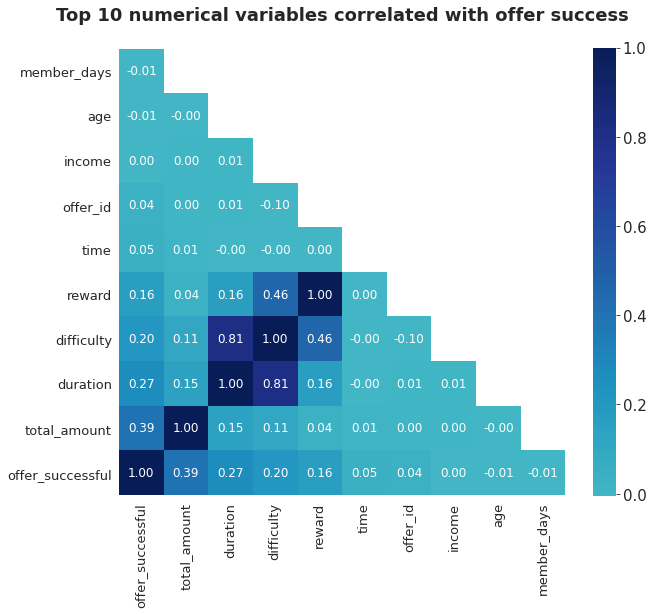

In [89]:
# Heatmap of top 10 closest correlated variables with 'offer_successful'
corr = num.corr().sort_values('offer_successful', axis=1, ascending=False). \
       sort_values('offer_successful', axis=0, ascending=False).iloc[:10,:10]
corr = corr.sort_values('offer_successful', axis=0, ascending=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr, mask=mask, vmin=corr.iloc[1:2].values.min(), 
                     vmax=corr.drop(['offer_successful'], axis=0).iloc[1:2].values.max(), 
                     center=0, square=True, fmt='.2f', cmap='YlGnBu', annot=True, 
                     annot_kws={'size': 12}, cbar_kws={"shrink": 0.825})

# Increase tick label size
ax.tick_params(labelsize=13)
ax.set_title('Top 10 numerical variables correlated with offer success', weight='bold', y=1.05)
plt.show()

**Observations:** Numerical variables show similarly high correlations such as:
- `total_amount`, `duration`, `difficulty`

Other numerical variables show a decent correlation to `offer_successful` spent such as:
- `income`, `age`, `member_days`

<a id='3.4'></a>
### 3.4. Categorical variable analysis

Categorical data is a collection of information that is divided into groups. For example, if an organisation is trying to get a data of its employees, the resulting data is referred to as categorical. This data is called 'categorical' because it may be grouped according to the variables present in the data such as gender, offer type, etc. Categorical data can take on numerical or boolian values such as “1” indicating Yes and “2” indicating No. However, those numbers don’t have mathematical siginificance. We can't add them together or subtract them from each other.

In [90]:
# Filter columns to take caterical variable col names
cat = clean_verbose.copy()
cat_cols = cat.select_dtypes(include='number').mean() <= 1
cat_cols = cat_cols[cat_cols == True].dropna()
cat_cols = cat_cols.index.tolist()

# Select caterical variables to use for our model
drop_cols = []
cat = cat[cat_cols].drop(columns=drop_cols)

# Move offer_successful to start of df
cat = cat[['offer_successful'] + [col for col in cat.columns if col != 'offer_successful']]
cat.head()

,offer_successful,bogo,discount,informational,email,mobile,social,web,female,male,other,income_1,income_2,income_3,income_4,income_5,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104,2013,2014,2015,2016,2017,2018
0,1,1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,1,0,0,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


#### Heatmap

Now we can visualise correlations between the categorical variables. The correlation between the variables should be ordered in descending order and the darkness of the colour indicates whether the effect of price is positive or negative.

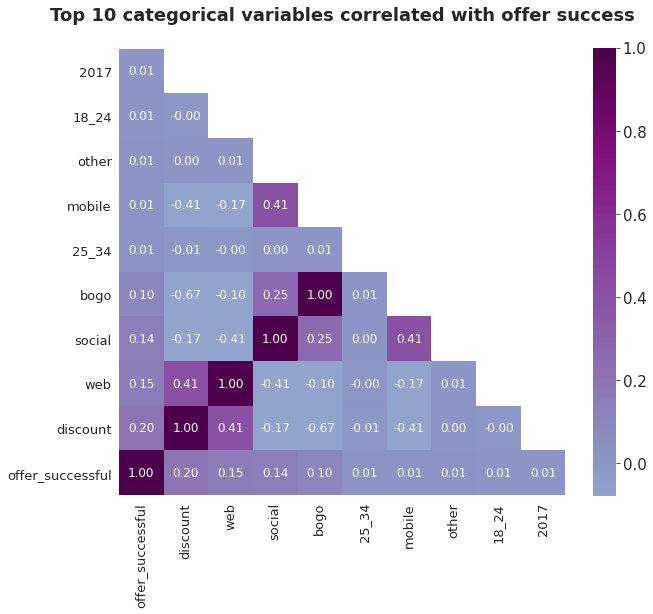

In [91]:
# Heatmap of top 10 closest correlated variables with 'offer_successful'
corr = cat.corr().sort_values('offer_successful', axis=1, ascending=False). \
       sort_values('offer_successful', axis=0, ascending=False).iloc[:10,:10]
corr = corr.sort_values('offer_successful', axis=0, ascending=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr, mask=mask, vmin=corr.iloc[1:2].values.min(), 
                     vmax=corr.drop(['offer_successful'], axis=0).iloc[1:2].values.max(), 
                     center=0, square=True, fmt='.2f', cmap='BuPu', annot=True, 
                     annot_kws={'size': 12}, cbar_kws={"shrink": 0.825})

# Increase tick label size
ax.tick_params(labelsize=13)
ax.set_title('Top 10 categorical variables correlated with offer success', weight='bold', y=1.05)
plt.show()

**Observations:** Categorical variables show similarly high correlations such as:
- `discount`, `web`, `social`

Other categorical variables show a decent correlation to `offer_successful` spent such as:
- `other`, `18_24`, `2017`

**References:** 
1. https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/
2. https://stackoverflow.com/questions/35321812/move-column-in-pandas-dataframe
3. https://www.python-graph-gallery.com/92-control-color-in-seaborn-heatmaps

<a id='4'></a>
## 4. Modelling

The first step in a Modelling process is to split our data into training and testing data. Generally, the rule of thumb is to divide the data in a way that variance is not too high with either training or testing data. However, 80/20 is a good starting point to start tweaking from.

**Reference:** https://stackoverflow.com/questions/13610074/is-there-a-rule-of-thumb-for-how-to-divide-a-dataset-into-training-and-validatio

<a id='4.1'></a>
### 4.1. Pre-processing

**We will split our data into training and testing sets by using these variables:**

**`X_train`** - includes the independent variables used to train the model. Since we have also specified the test_size = 0.2, this means 80% of observations from the complete dataset will be used to train/fit the model. The remaining 20% will be used to test the model.

**`X_test`** - the remaining 20% portion of the independent variables from the dataset which will not be used in the training phase and will be used to make predictions to test the accuracy of the model.

**`y_train`** - includes a dependent variable which needs to be predicted by the model. This will include category labels against our independent variables, but we need to specify our dependent variable while training/fitting the model.

**`y_test`** - includes category labels for our test data, these labels will be used to test the accuracy between actual and predicted categories.

**References:** 
1. https://scikit-learn.org/stable/modules/preprocessing.html
2. https://realpython.com/train-test-split-python-data/
3. https://stackoverflow.com/questions/56212429/how-to-remerge-the-x-test-and-the-y-test-the-x-train-and-the-y-train-after-spl
4. https://www.geeksforgeeks.org/python-pandas-series-ravel/
5. https://www.youtube.com/watch?v=5bHpPQ6_OU4&ab_channel=Simplilearn

#### Feature Selection

In [92]:
# Dependent variable name string
class_label_name = 'offer_successful'

# Dependent variable (Offer successful dummies)
label = clean_data.filter([class_label_name])

# Independent variables
variables = clean_data.drop(columns=[class_label_name])

# Create a random_state to produce consistent testing results
random_state = 42

# Restore features
features = variables 

# Removes features
drop = []

# Drop or retain columns using this loop to test features
for drops in drop:
    features = features.drop(drops, axis=1)

In [93]:
# Drop input feature selection to train models with
variables = features
variable_names = features.columns

In [94]:
# Count features minus class label name
original_features = variables.columns
current_features = features.columns
print(bold.BOLD + 'Original features count:', len(original_features), bold.END)
print(original_features, '\n')
print(bold.BOLD + 'Current features count:', len(current_features), bold.END)
print(current_features)

Original features count: 30 
Index(['offer_id', 'total_amount', 'difficulty', 'duration', 'reward', 'bogo',
       'discount', 'mobile', 'social', 'web', 'female', 'male', 'other',
       'member_days', 'income', '18_24', '25_34', '35_44', '45_54', '55_64',
       '65_74', '75_84', '85_94', '95_104', '2013', '2014', '2015', '2016',
       '2017', '2018'],
      dtype='object') 

Current features count: 30 
Index(['offer_id', 'total_amount', 'difficulty', 'duration', 'reward', 'bogo',
       'discount', 'mobile', 'social', 'web', 'female', 'male', 'other',
       'member_days', 'income', '18_24', '25_34', '35_44', '45_54', '55_64',
       '65_74', '75_84', '85_94', '95_104', '2013', '2014', '2015', '2016',
       '2017', '2018'],
      dtype='object')


#### Split data into random train and test subsets

In [95]:
# Split data into random train and test subsets
X, y = variables.values, label.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=random_state)

# Validation set if needed
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, 
                                                  random_state=random_state)

# Convert to 1D array
y_train = y_train.ravel()
y_test = y_test.ravel()

#### Create training Dataframe from X, y train for further EDA

In [96]:
X_train.shape

(43593, 30)

In [97]:
# Reconstruct DataFrame for training data arrays
def train_test_df(X, y, X_cols, y_cols, data):
    '''This function replaces hashes with integers.
    
    INPUT:
    X - matrix of input feature values, usually X_train 
        or X_test | shape: n_samples, n_features (array)
    y - target vector | shape: n_samples (array)
    X_cols - input columns (str)
    y_cols - target label (str)
    data - type of data input | training or testing (str)
    
    OUTPUT:
    training or testing_data - DataFrame containing training 
    or testing split.'''
    
    X_data_df = pd.DataFrame(data=X, 
                      columns=X_cols)
    y_data_df = pd.DataFrame(data=y, 
                      columns=y_cols)

    # Concat data
    df = pd.concat([X_data_df, y_data_df], axis=1)
    
    if data == 'testing':
        # Save testing data
        testing_data = df
        return testing_data
    else:
        # Drop columns we don't need for EDA
        drop = ['difficulty','duration','reward','bogo',
                'discount','mobile','social','web']
        
        # Use this below to avoid dropping any columns
        none = []
        
        # Class label name will be retained here for EDA
        training_data = df.drop(columns=none, errors='ignore')

        # Create a verbose version of clean_data with age, etc
        training_data_verbose = pd.merge(left=training_data.copy(), right=clean_verbose)
        return training_data, training_data_verbose

In [98]:
# Create training df
training_data = train_test_df(X=X_train, y=y_train, X_cols=variable_names, 
              y_cols=[class_label_name], data='training')[0]

training_data_verbose = train_test_df(X=X_train, y=y_train, X_cols=variable_names, 
              y_cols=[class_label_name], data='training')[1]

# For EDA
print(training_data.shape)
training_data.head()

(43593, 31)


,offer_id,total_amount,difficulty,duration,reward,bogo,discount,mobile,social,web,female,male,other,member_days,income,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104,2013,2014,2015,2016,2017,2018,offer_successful
0,9.0,15.40,5.0,5.0,5.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2058.0,73000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,1.0,8.70,10.0,7.0,10.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1148.0,67000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,10.0,48.20,10.0,7.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1456.0,64000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,4.0,91.56,5.0,7.0,5.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1660.0,57000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,1.0,54.21,10.0,7.0,10.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1462.0,106000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [99]:
# For model training
print(training_data_verbose.shape)
training_data_verbose.head()

(45310, 41)


,offer_id,total_amount,difficulty,duration,reward,bogo,discount,mobile,social,web,female,male,other,member_days,income,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104,2013,2014,2015,2016,2017,2018,offer_successful,user_id,time,informational,email,income_1,income_2,income_3,income_4,income_5,age
0,9.0,15.40,5.0,5.0,5.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2058.0,73000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,4622,7,0,1,0,0,0,1,0,69
1,1.0,8.70,10.0,7.0,10.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1148.0,67000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,10808,7,0,1,0,0,1,0,0,52
2,10.0,48.20,10.0,7.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1456.0,64000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,9992,21,0,1,0,0,1,0,0,24
3,4.0,91.56,5.0,7.0,5.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1660.0,57000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,13777,14,0,1,0,0,1,0,0,49
4,1.0,54.21,10.0,7.0,10.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1462.0,106000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,3684,21,0,1,0,0,0,0,1,68


In [100]:
# Create testing df
testing_data = train_test_df(X=X_test, y=y_test, X_cols=variable_names, 
              y_cols=[class_label_name], data='testing')

print(testing_data.shape)
testing_data.head()

(13623, 31)


,offer_id,total_amount,difficulty,duration,reward,bogo,discount,mobile,social,web,female,male,other,member_days,income,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104,2013,2014,2015,2016,2017,2018,offer_successful
0,1.0,45.58,10.0,7.0,10.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1854.0,33000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,4.0,12.16,5.0,7.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2401.0,54000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,2.0,2.80,10.0,5.0,10.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1503.0,88000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,2.0,19.40,10.0,5.0,10.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1333.0,30000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,5.0,85.25,20.0,10.0,5.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1595.0,49000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [101]:
# Check shapes
training_data.shape, testing_data.shape

((43593, 31), (13623, 31))

In [102]:
training_data.describe()

,offer_id,total_amount,difficulty,duration,reward,bogo,discount,mobile,social,web,female,male,other,member_days,income,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104,2013,2014,2015,2016,2017,2018,offer_successful
count,43593.000000,43593.000000,43593.000000,43593.000000,43593.000000,43593.000000,43593.000000,43593.000000,43593.000000,43593.000000,43593.000000,43593.000000,43593.000000,43593.000000,43593.000000,43593.000000,43593.000000,43593.000000,43593.000000,43593.000000,43593.000000,43593.000000,43593.00000,43593.000000,43593.000000,43593.000000,43593.000000,43593.000000,43593.000000,43593.000000,43593.000000
mean,5.497029,29.469507,7.731723,6.512972,4.218636,0.402014,0.401326,0.899020,0.599477,0.800128,0.415021,0.570550,0.014429,1642.604684,65341.820935,0.060423,0.091895,0.126374,0.203244,0.231138,0.164958,0.084004,0.03379,0.004175,0.018535,0.044296,0.106852,0.205171,0.375221,0.249925,0.447503
std,2.872688,57.428227,5.529048,2.195750,3.393123,0.490310,0.490172,0.301305,0.490010,0.399908,0.492731,0.495003,0.119252,418.583090,21599.234261,0.238271,0.288882,0.332274,0.402417,0.421565,0.371147,0.277397,0.18069,0.064480,0.134878,0.205755,0.308929,0.403831,0.484185,0.432975,0.497242
min,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.000000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.200000,5.000000,5.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1328.000000,49000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,13.980000,10.000000,7.000000,5.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1479.000000,64000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,38.370000,10.000000,7.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1918.000000,80000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,10.000000,1200.990000,20.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2944.000000,120000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [103]:
testing_data.describe()

,offer_id,total_amount,difficulty,duration,reward,bogo,discount,mobile,social,web,female,male,other,member_days,income,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104,2013,2014,2015,2016,2017,2018,offer_successful
count,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000,13623.00000,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000
mean,5.491742,29.180952,7.680247,6.494091,4.168245,0.395801,0.399104,0.899288,0.593702,0.800705,0.407913,0.577846,0.014241,1645.084269,65496.293034,0.058284,0.094179,0.125376,0.20113,0.233502,0.168098,0.079498,0.035822,0.004111,0.020333,0.044337,0.105557,0.203846,0.379065,0.246862,0.444983
std,2.867899,55.493456,5.567996,2.214448,3.406149,0.489040,0.489732,0.300958,0.491160,0.399485,0.491465,0.493921,0.118486,421.388700,21387.548198,0.234288,0.292088,0.331157,0.40086,0.423075,0.373967,0.270524,0.185852,0.063985,0.141143,0.205850,0.307281,0.402871,0.485172,0.431202,0.496982
min,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.000000,30000.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.220000,5.000000,5.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1329.000000,50000.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,13.830000,10.000000,7.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1480.000000,64000.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,37.875000,10.000000,7.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1919.000000,80000.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,10.000000,1074.780000,20.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2944.000000,120000.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**References:** 
1. https://www.geeksforgeeks.org/python-pandas-series-ravel/
2. https://numpy.org/doc/stable/reference/generated/numpy.r_.html
3. https://www.marsja.se/how-to-convert-numpy-array-to-pandas-dataframe-examples/

<a id='4.2'></a>
### 4.2. Designing Tests

The test in this task is a test that we will use to determine how well our model works. It may be as simple as splitting our data into a group of cases for model training and another group for model testing. Training data is used to fit mathematical forms to the data model, and test data is used during the model-training process to avoid overfitting: making a model that’s perfect for one dataset, but no other. We can also use holdout data, data that is not used during the model-training process, for an additional test. The deliverable for this task is our test design. It may not be elaborate, but
we must make our training and test data are similar and avoid introducing any bias into the data. 

First, we should look at columns which may introduce bias due to larger numbers such as `total_amount` and `income`. We can use feature scaling tool such as a **Min Max Scaler** to help remove bias from our model.

<a id='4.21'></a>
### 4.21. Feature Scaling

We can transform features by scaling each feature to a given range. An estimator scales and translates each feature individually such that it is in the given range on the training set, e.g., between zero and one. This Scaler shrinks the data within the range of -1 to 1 if there are negative values. We can set the range like [0,1] or [0,5] or [-1,1].
This Scaler responds well if the standard deviation is small and when a distribution is not Gaussian. This Scaler is sensitive to outliers.

#### Checking model for bias

In [104]:
# Fit model
model = XGBClassifier(verbosity=0, 
                      scale_pos_weight=1,
                      learning_rate=0.1,  
                      colsample_bytree=1,
                      subsample=0.8,
                      objective='binary:logistic', 
                      n_estimators=200, 
                      reg_alpha=0.4,
                      max_depth=11, 
                      gamma=1,
                      use_label_encoder=False,
                      eval_metric='mlogloss')

eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["logloss","error"]
%time model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=False)

# Make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1 Score: %.2f%%" % (f1 * 100.0))

Wall time: 5.65 s
Accuracy: 90.14%
F1 Score: 89.07%


In [105]:
from mlxtend.evaluate import bias_variance_decomp
# Estimate bias and variance
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=5, random_seed=1)

# Summarize results
print('MSE: %.3f' % mse) # Mean squared error
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.100
Bias: 0.086
Variance: 0.014


**Observation:** The model we have chosen to test for bias has very low bias and variance so feature scaling is not needed on this model. We can still improve it later using hyperparameter tuning.

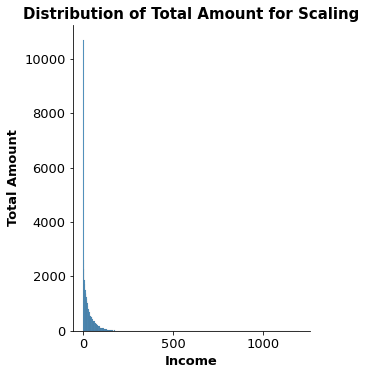

In [106]:
# Distribution plot of total_amount from X_train
sns.displot(data=X_train[:, 1])

# Styling
style.style_sns_1(title='Distribution of Total Amount for Scaling', 
                  xlabel='Income', ylabel='Total Amount')

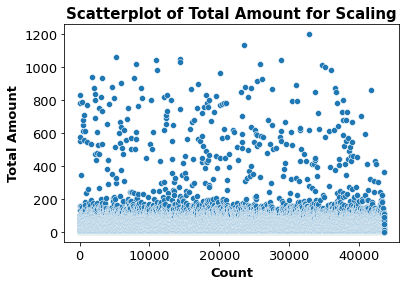

In [107]:
# Scatterplot of total_amount from X_train
sns.scatterplot(data=X_train[:, 1])
# Styling
style.style_sns_1(title='Scatterplot of Total Amount for Scaling', 
                  xlabel='Count', ylabel='Total Amount')

#### Creating functions to automatically detect features with max  value of 1

In [108]:
# Collect ilocs of columns.max() over 1
def array_mean(array):
    '''This function finds the mean or
    numerical range of each column. We 
    can find out which columns are in 
    the array by using data.describe().
    
    INPUT:
    array - NumPy array (np.array)
    
    OUTPUT:
    print - each column mean (str, int)
    '''
    
    col_bin = []
    for i in range(0, 29):
        if array[:, [i]].max() > 1:
            print(f'column {i}:', round(array[:, i].mean(), 3), '- Mean is too high! Needs scaling')
            col_bin.append(i)
        else:
            print(f'column {i}:', round(array[:, i].mean(), 3), '- Mean is OK')
    
    print(f'\nColumns recommended for scaler: {col_bin}')
    return col_bin

In [109]:
col_bin = array_mean(X_train)

column 0: 5.497 - Mean is too high! Needs scaling
column 1: 29.47 - Mean is too high! Needs scaling
column 2: 7.732 - Mean is too high! Needs scaling
column 3: 6.513 - Mean is too high! Needs scaling
column 4: 4.219 - Mean is too high! Needs scaling
column 5: 0.402 - Mean is OK
column 6: 0.401 - Mean is OK
column 7: 0.899 - Mean is OK
column 8: 0.599 - Mean is OK
column 9: 0.8 - Mean is OK
column 10: 0.415 - Mean is OK
column 11: 0.571 - Mean is OK
column 12: 0.014 - Mean is OK
column 13: 1642.605 - Mean is too high! Needs scaling
column 14: 65341.821 - Mean is too high! Needs scaling
column 15: 0.06 - Mean is OK
column 16: 0.092 - Mean is OK
column 17: 0.126 - Mean is OK
column 18: 0.203 - Mean is OK
column 19: 0.231 - Mean is OK
column 20: 0.165 - Mean is OK
column 21: 0.084 - Mean is OK
column 22: 0.034 - Mean is OK
column 23: 0.004 - Mean is OK
column 24: 0.019 - Mean is OK
column 25: 0.044 - Mean is OK
column 26: 0.107 - Mean is OK
column 27: 0.205 - Mean is OK
column 28: 0.375 - 

In [110]:
# Save X_train and X_test shape before transforming to compare later
xtrain_copy, xtest_copy = X_train.copy(), X_test.copy()
xtrain_copy.shape, xtest_copy.shape

((43593, 30), (13623, 30))

In [111]:
def scaler_tool(col_int):
    '''This function scales the values using a 
    MinMaxScaler. Inputs are the column numbers
    from the array being scaled. The output will
    print the minimum and maximum values of each
    column.
    
    INPUT:
    col_int - list of columns in the NumPy array 
    containing input features (int)
    
    OUTPUT:
    X_train, X_test - returns two numPy arrays 
    being scaled'''
    
    for i in range(len(col_int)):
        # Fit scaler on training data then transform
        norm = MinMaxScaler(copy=True, feature_range=(0, 1)). \
        fit(X_train[:, col_int[i]].reshape(-1, 1))
        X_train[:, col_int[i]] =\
        norm.transform(X_train[:, col_int[i]].reshape(-1, 1)).flatten()
        
        # Fit scaler on testing data then transform
        norm = MinMaxScaler(copy=True, feature_range=(0, 1)). \
        fit(X_test[:, col_int[i]].reshape(-1, 1)) # Using fit again will add bias to our model
        X_test[:, col_int[i]] =\
        norm.transform(X_test[:, col_int[i]].reshape(-1, 1)).flatten()

**Reference:**
1. https://stackoverflow.com/questions/58823264/how-to-scale-train-validation-and-test-sets-properly-using-standardscaler

#### Scaling transformation function

In [112]:
# Manual Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [113]:
# Check if all columns are valued 1 or under
for i in range(0, 1):
    if X_train.max() >= 1:
        print('OK')
    else:
        print('That seems too high...')   

OK


In [114]:
# Making sure the max value looks right
X_train.max(), X_test.max()

(20.399967085167102, 18.20224211085647)

In [115]:
# Making sure the shapes match
print('Before:', X_train.shape, X_test.shape)
print('After:', xtrain_copy.shape, xtest_copy.shape)

Before: (43593, 30) (13623, 30)
After: (43593, 30) (13623, 30)


In [116]:
def scaling_test(col_int):
    '''This function checks the results of a 
    MinMaxScaler. Inputs are the column numbers
    from the array being scaled. The output will
    print the minimum and maximum values of each
    column.
    
    INPUT:
    col_int - list of columns in the NumPy array 
    containing input features (int)
    
    OUTPUT:
    print - minimum and maximum values of the 
    scaled columns'''
    
    for i in range(len(col_int)): 
        print(f'X_train {col_int[i]} Min', X_train[:, col_int[i]].min())
        print(f'X_train {col_int[i]} Max', X_train[:, col_int[i]].max())
        print(f'X_test {col_int[i]} Min', X_test[:, col_int[i]].min())
        print(f'X_test {col_int[i]} Max', X_test[:, col_int[i]].max())

In [117]:
# Testing the new normalized values
scaling_test(col_bin)

X_train 0 Min -1.56546091999377
X_train 0 Max 1.5675291532446964
X_test 0 Min -1.56546091999377
X_test 0 Max 1.5675291532446964
X_train 1 Min -0.5131595838553592
X_train 1 Max 20.399967085167102
X_test 1 Min -0.5131595838553592
X_test 1 Max 18.20224211085647
X_train 2 Min -1.3983984387012465
X_train 2 Max 2.218902496076987
X_test 2 Min -1.3983984387012465
X_test 2 Max 2.218902496076987
X_train 3 Min -1.5999145694894426
X_train 3 Max 1.5880986392154297
X_test 3 Min -1.5999145694894426
X_test 3 Max 1.5880986392154297
X_train 4 Min -1.2433041519008723
X_train 4 Max 1.7038667965782026
X_test 4 Min -1.2433041519008723
X_test 4 Max 1.7038667965782026
X_train 13 Min -1.2461341126282233
X_train 13 Max 3.1090846113727735
X_test 13 Min -1.2461341126282233
X_test 13 Max 3.1090846113727735
X_train 14 Min -1.6362721879386866
X_train 14 Max 2.5305899889476557
X_test 14 Min -1.6362721879386866
X_test 14 Max 2.5305899889476557


In [118]:
# Fit model
model = XGBClassifier(verbosity=0, 
                      scale_pos_weight=1,
                      learning_rate=0.1,  
                      colsample_bytree=1,
                      subsample=0.8,
                      objective='binary:logistic', 
                      n_estimators=200, 
                      reg_alpha=0.4,
                      max_depth=11, 
                      gamma=1,
                      use_label_encoder=False,
                      eval_metric='mlogloss')

eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["logloss","error"]
%time model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=False)

# Make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1 Score: %.2f%%" % (f1 * 100.0))

Wall time: 5.36 s
Accuracy: 90.33%
F1 Score: 89.29%


In [119]:
# Estimate bias and variance
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=5, random_seed=1)

# Summarize results
print('MSE: %.3f' % mse) # Mean squared error
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.100
Bias: 0.086
Variance: 0.014


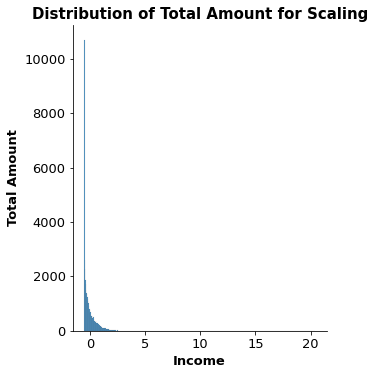

In [120]:
# Distribution plot of total_amount from X_train
sns.displot(data=X_train[:, 1])

# Styling
style.style_sns_1(title='Distribution of Total Amount for Scaling', 
                  xlabel='Income', ylabel='Total Amount')

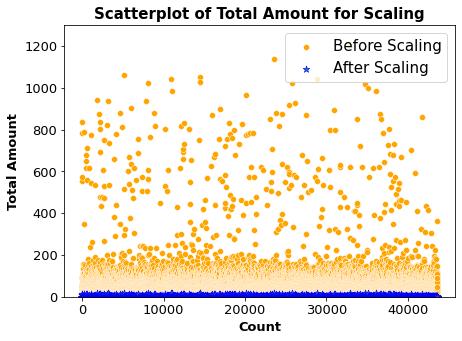

In [121]:
# Scatterplot of total_amount from X_train
f, axes = plt.subplots(1, 1, figsize=(7,5))
ax1 = sns.scatterplot(data=xtrain_copy[:, 1], ax=axes, color='orange', zorder=1)
ax2 = sns.scatterplot(data=X_train[:, 1], ax=axes, edgecolor='blue', zorder=2, marker = '*', s=50)
ax1.set_ylim((0, 1300))
ax2.set_ylim((0, 1300))
ax1.legend(labels=['Before Scaling', 'After Scaling'], loc=1)

# Styling
style.style_sns_1(title='Scatterplot of Total Amount for Scaling', 
                  xlabel='Count', ylabel='Total Amount')

**Observation:** We have decreased the model bias by introducing feature scaling, yet the bias remains identical. The model performance has also improved in fit time as a result of using smaller integers.

**References:**
1. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
2. https://machinelearningmastery.com/calculate-the-bias-variance-trade-off/
3. https://discuss.tvm.apache.org/t/parameters-silent-might-not-be-used/6753/5
4. https://stackoverflow.com/questions/51626360/unexpected-behavior-from-xgboost-in-python-with-custom-evaluation-function
5. https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
6. https://www.marsja.se/transform-skewed-data-using-square-root-log-box-cox-methods-in-python/
7. https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

#### Create a scaled version of the training data

In [122]:
# Reconstruct scaled DataFrame for training data arrays
X_train_df = pd.DataFrame(data=X_train, 
                          columns=variable_names)
y_train_df = pd.DataFrame(data=y_train, 
                          columns=[class_label_name])

# Concat data
scaled_training_data = pd.concat([X_train_df,
                           y_train_df], axis=1)

# Drop columns we don't need for EDA
scaled_training_data = scaled_training_data.drop(columns=['difficulty',
                                            'duration',
                                            'reward',
                                            'bogo',
                                            'discount',
                                            'mobile',
                                            'social',
                                            'web'], errors='ignore')

scaled_training_data.head()

,offer_id,total_amount,female,male,other,member_days,income,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104,2013,2014,2015,2016,2017,2018,offer_successful
0,1.219419,-0.244996,1.187231,-1.152632,-0.120997,0.992396,0.354562,-0.253591,-0.318111,-0.380334,-0.505063,-0.548291,2.249925,-0.302834,-0.187007,-0.064749,-0.137423,-0.215289,-0.345883,1.968246,-0.774962,-0.577235,1
1,-1.565461,-0.361664,-0.842296,0.867579,-0.120997,-1.181630,0.076771,-0.253591,-0.318111,-0.380334,1.979950,-0.548291,-0.444459,-0.302834,-0.187007,-0.064749,-0.137423,-0.215289,-0.345883,-0.508066,-0.774962,1.732395,0
2,1.567529,0.326159,-0.842296,0.867579,-0.120997,-0.445806,-0.062124,3.943363,-0.318111,-0.380334,-0.505063,-0.548291,-0.444459,-0.302834,-0.187007,-0.064749,-0.137423,-0.215289,-0.345883,-0.508066,1.290387,-0.577235,1
3,-0.521131,1.081197,1.187231,-1.152632,-0.120997,0.041558,-0.386214,-0.253591,-0.318111,-0.380334,1.979950,-0.548291,-0.444459,-0.302834,-0.187007,-0.064749,-0.137423,-0.215289,-0.345883,-0.508066,1.290387,-0.577235,1
4,-1.565461,0.430812,1.187231,-1.152632,-0.120997,-0.431472,1.882411,-0.253591,-0.318111,-0.380334,-0.505063,-0.548291,2.249925,-0.302834,-0.187007,-0.064749,-0.137423,-0.215289,-0.345883,-0.508066,1.290387,-0.577235,1


**Reference:** https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

<a id='4.22'></a>
### 4.22. Exploratory Data Analysis

We can analyse the success of each offer below.

In [123]:
# Copying back data for analysis
clean_data = clean_verbose

#### Overall Offer Statistics

In [124]:
# Count successful offers
success_count = clean_data[['offer_id', 'offer_successful']].groupby('offer_id').sum().reset_index()
success_count

,offer_id,offer_successful
0,1,3482
1,2,3185
2,3,655
3,4,3226
4,5,2957
5,6,4601
6,7,4815
7,8,533
8,9,3879
9,10,3126


In [125]:
# Count total offers
offer_count = clean_data['offer_id'].value_counts()
offer_count

5     6874
1     6862
4     6855
10    6855
8     6812
3     6796
6     6788
9     6784
7     6756
2     6733
Name: offer_id, dtype: int64

In [126]:
# Create df from value counts then sort by offer_id
offer_count = offer_count.reset_index()
offer_count = offer_count.rename(columns={'index':'offer_id', 
                                          'offer_id':'count'}).sort_values('offer_id')
offer_count

,offer_id,count
1,1,6862
9,2,6733
5,3,6796
2,4,6855
0,5,6874
6,6,6788
8,7,6756
4,8,6812
7,9,6784
3,10,6855


In [127]:
# Merge offer_success and offer_count
pct_success = pd.merge(offer_count, success_count, on="offer_id")
pct_success

,offer_id,count,offer_successful
0,1,6862,3482
1,2,6733,3185
2,3,6796,655
3,4,6855,3226
4,5,6874,2957
5,6,6788,4601
6,7,6756,4815
7,8,6812,533
8,9,6784,3879
9,10,6855,3126


In [128]:
# Calculate success percentage
pct_success['percent_success'] = 100 * pct_success['offer_successful'] / pct_success['count']
pct_success

,offer_id,count,offer_successful,percent_success
0,1,6862,3482,50.743224
1,2,6733,3185,47.304322
2,3,6796,655,9.638022
3,4,6855,3226,47.060540
4,5,6874,2957,43.017166
5,6,6788,4601,67.781379
6,7,6756,4815,71.269982
7,8,6812,533,7.824427
8,9,6784,3879,57.178656
9,10,6855,3126,45.601751


In [129]:
# Merge portfolio with pct_success
pct_success = pd.merge(pct_success,
                       portfolio_new,
                       on='offer_id')
pct_success = pct_success.drop(columns=['offer_successful']) \
              .sort_values('percent_success', ascending=False)
pct_success

,offer_id,count,percent_success,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web
6,7,6756,71.269982,10,10,2,0,1,0,1,1,1,1
5,6,6788,67.781379,7,7,3,0,1,0,1,1,1,1
8,9,6784,57.178656,5,5,5,1,0,0,1,1,1,1
0,1,6862,50.743224,10,7,10,1,0,0,1,1,1,0
1,2,6733,47.304322,10,5,10,1,0,0,1,1,1,1
3,4,6855,47.060540,5,7,5,1,0,0,1,1,0,1
9,10,6855,45.601751,10,7,2,0,1,0,1,1,0,1
4,5,6874,43.017166,20,10,5,0,1,0,1,0,0,1
2,3,6796,9.638022,0,4,0,0,0,1,1,1,0,1
7,8,6812,7.824427,0,3,0,0,0,1,1,1,1,0


In [130]:
pct_success.sort_values('percent_success', ascending=False)

,offer_id,count,percent_success,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web
6,7,6756,71.269982,10,10,2,0,1,0,1,1,1,1
5,6,6788,67.781379,7,7,3,0,1,0,1,1,1,1
8,9,6784,57.178656,5,5,5,1,0,0,1,1,1,1
0,1,6862,50.743224,10,7,10,1,0,0,1,1,1,0
1,2,6733,47.304322,10,5,10,1,0,0,1,1,1,1
3,4,6855,47.060540,5,7,5,1,0,0,1,1,0,1
9,10,6855,45.601751,10,7,2,0,1,0,1,1,0,1
4,5,6874,43.017166,20,10,5,0,1,0,1,0,0,1
2,3,6796,9.638022,0,4,0,0,0,1,1,1,0,1
7,8,6812,7.824427,0,3,0,0,0,1,1,1,1,0


In [131]:
clean_data.head()

,user_id,offer_id,time,offer_successful,total_amount,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web,female,male,other,member_days,income,income_1,income_2,income_3,income_4,income_5,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104,2013,2014,2015,2016,2017,2018,age
0,1,4,0,1,37.67,5,7,5,1,0,0,1,1,0,1,1,0,0,1497,112000,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,55
1,1,8,7,0,49.39,0,3,0,0,0,1,1,1,1,0,1,0,0,1497,112000,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,55
2,1,1,17,1,48.28,10,7,10,1,0,0,1,1,1,0,1,0,0,1497,112000,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,55
3,1,9,21,1,48.28,5,5,5,1,0,0,1,1,1,1,1,0,0,1497,112000,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,55
4,8041,8,0,0,0.00,0,3,0,0,0,1,1,1,1,0,1,0,0,2711,62000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,51


In [132]:
# Compute the value of the relevant boolean conditions
income_1 = clean_data['income_1'] == 1
income_2 = clean_data['income_2'] == 1
income_3 = clean_data['income_3'] == 1
income_4 = clean_data['income_4'] == 1
income_5 = clean_data['income_5'] == 1

# Create categorical series data
cat = pd.Series(pd.Categorical([np.nan] * len(clean_data),
                                categories=['income_1', 'income_2', 
                                            'income_3', 'income_4',
                                            'income_5']),
                                index=clean_data.index)

# Create labels
cat[income_1] = 'income_1'
cat[income_2] = 'income_2'
cat[income_3] = 'income_3'
cat[income_4] = 'income_4'
cat[income_5] = 'income_5'

# Assign to new column
clean_data['income_group'] = cat

In [133]:
clean_data.head()

,user_id,offer_id,time,offer_successful,total_amount,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web,female,male,other,member_days,income,income_1,income_2,income_3,income_4,income_5,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104,2013,2014,2015,2016,2017,2018,age,income_group
0,1,4,0,1,37.67,5,7,5,1,0,0,1,1,0,1,1,0,0,1497,112000,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,55,income_5
1,1,8,7,0,49.39,0,3,0,0,0,1,1,1,1,0,1,0,0,1497,112000,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,55,income_5
2,1,1,17,1,48.28,10,7,10,1,0,0,1,1,1,0,1,0,0,1497,112000,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,55,income_5
3,1,9,21,1,48.28,5,5,5,1,0,0,1,1,1,1,1,0,0,1497,112000,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,55,income_5
4,8041,8,0,0,0.00,0,3,0,0,0,1,1,1,1,0,1,0,0,2711,62000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,51,income_3


In [134]:
# This is a function with the purpose of splitting the income and age groups for offer EDA
def offer_success_count(col_list):
    '''This function filters the offer success DataFrame
    depending on the input column. The output will be used
    for the offer success EDA (Exploratory Data Analysis).
    
    INPUT:
    col_list - list of columns of DataFrame containing input 
    features (str)
    
    OUTPUT:
    df - DataFrame with successful offer 
    '''
    
    # Default columns
    cols = ['offer_id', 'offer_successful']
    
    # Join input columns
    cols.extend(col_list)
    
    # Count successful offers
    successful_df = clean_data[clean_data['offer_successful'] == 1]

    # Count unsuccessful offers
    unsuccessful_df = clean_data[clean_data['offer_successful'] == 0]

    # Count successful offers per category
    success_count = successful_df[cols]. \
                                   groupby('offer_id').sum().reset_index()

    # Count unsuccessful offers per category
    unsuccess_count = unsuccessful_df[cols]. \
                                       groupby('offer_id').sum().reset_index()
    
    # Split output dfs using [0] or [1], etc
    return success_count, unsuccess_count

In [135]:
clean_data.columns

Index(['user_id', 'offer_id', 'time', 'offer_successful', 'total_amount',
       'difficulty', 'duration', 'reward', 'bogo', 'discount', 'informational',
       'email', 'mobile', 'social', 'web', 'female', 'male', 'other',
       'member_days', 'income', 'income_1', 'income_2', 'income_3', 'income_4',
       'income_5', '18_24', '25_34', '35_44', '45_54', '55_64', '65_74',
       '75_84', '85_94', '95_104', '2013', '2014', '2015', '2016', '2017',
       '2018', 'age', 'income_group'],
      dtype='object')

In [136]:
input_cols = ['income_1', 'income_2', 'income_3', 'income_4', 'income_5', 
              'male', 'female', 'other', '18_24', '25_34', '35_44', '45_54', 
              '55_64', '65_74', '75_84', '85_94', '95_104', '2013', '2014', 
              '2015', '2016','2017', '2018']
offer_success_func = offer_success_count(input_cols)

# Copy dfs to prevent overwriting column names
success_count1 = offer_success_func[0].copy()
unsuccess_count1 = offer_success_func[1].copy()

In [137]:
success_count1

,offer_id,offer_successful,income_1,income_2,income_3,income_4,income_5,male,female,other,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104,2013,2014,2015,2016,2017,2018
0,1,3482,679,649,718,670,766,1965,1467,50,194,348,432,683,861,565,269,113,17,53,147,390,742,1293,857
1,2,3185,631,615,671,642,626,1865,1265,55,220,319,383,627,754,505,258,109,10,60,149,324,627,1211,814
2,3,655,113,107,148,159,128,359,286,10,43,61,94,124,170,83,57,18,5,11,28,72,130,242,172
3,4,3226,640,609,697,649,631,1826,1347,53,180,316,401,674,747,492,279,122,15,54,138,357,625,1259,793
4,5,2957,572,550,585,614,636,1666,1244,47,188,274,340,589,635,552,249,110,20,52,118,342,588,1145,712
5,6,4601,920,896,952,902,931,2592,1940,69,289,436,559,875,1074,788,404,156,20,84,217,491,945,1742,1122
6,7,4815,929,950,980,961,995,2764,1977,74,305,454,652,922,1094,789,434,149,16,92,203,549,960,1798,1213
7,8,533,86,93,110,123,121,307,216,10,35,45,52,112,135,90,45,18,1,9,29,57,118,185,135
8,9,3879,804,671,802,801,801,2252,1563,64,235,380,464,789,918,646,298,132,17,65,170,418,779,1499,948
9,10,3126,603,560,664,671,628,1783,1294,49,183,306,382,641,693,515,277,119,10,45,128,332,645,1211,765


In [138]:
unsuccess_count1

,offer_id,offer_successful,income_1,income_2,income_3,income_4,income_5,male,female,other,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104,2013,2014,2015,2016,2017,2018
0,1,0,599,609,765,707,700,1975,1365,40,172,315,431,705,776,575,279,109,18,67,146,339,713,1275,840
1,2,0,686,670,742,742,708,2040,1461,47,200,310,468,747,777,608,310,117,11,81,156,402,726,1315,868
2,3,0,1191,1193,1254,1302,1201,3487,2570,84,402,556,743,1274,1461,972,494,212,27,106,280,621,1308,2290,1536
3,4,0,720,677,752,738,742,2022,1552,55,213,349,478,759,810,574,308,125,13,83,155,360,733,1368,930
4,5,0,739,730,800,830,818,2286,1579,52,242,338,491,791,886,674,328,144,23,71,160,457,786,1435,1008
5,6,0,407,446,468,446,420,1275,889,23,112,198,280,491,513,364,149,73,7,36,103,245,442,817,544
6,7,0,346,335,418,430,412,1102,812,27,95,155,256,402,492,320,157,57,7,42,87,179,422,719,492
7,8,0,1206,1254,1310,1229,1280,3663,2545,71,365,582,780,1246,1440,1121,512,199,34,134,313,661,1261,2386,1524
8,9,0,553,515,635,606,596,1666,1199,40,179,244,349,591,664,527,240,93,18,63,139,309,633,1036,725
9,10,0,748,698,767,770,746,2107,1568,54,195,305,537,772,859,626,289,130,16,72,162,404,750,1411,930


In [139]:
# Function for appending columns with strings
def rename_offer_success(string):
    '''This function appends strings to a list used to rename 
    the columns in the offer success DataFrame. The output 
    will return a list.
    
    INPUT:
    string - string used to append selected columns (str)
    
    OUTPUT:
    rename_cols - list with column titles 
    '''
    
    # Base columns
    cols = list(offer_success_func[0].columns)
    rename_cols = cols[:2]

    # Append input columns
    for i in range(len(cols[2:])):
        c = cols[2:][i] + string
        rename_cols.append(c)

    return rename_cols

In [140]:
# Function to skip previously appended columns
def rename_success_count(df, substring):
    '''This function appends columns with an _s (successful)
    or _u (unsuccessful) depending on the DataFrame to prepare
    them for merging.
    
    INPUT:
    df - DataFrame to perform operations on
    substring - string used to append selected columns (str)
    
    OUTPUT:
    df.columns - list with column titles 
    '''

    # Normal columns as a list type
    norm_cols = list(offer_success_func[0].columns)

    # Skipping operation if string found
    if search(substring, norm_cols[2]):
        print('Existing string found!')
    else:
        df.columns = rename_offer_success(substring)

    return df.columns

**References:**
1. https://stackabuse.com/python-check-if-string-contains-substring/

In [141]:
# Count unsuccessful offers and create columns
success_count1.columns = rename_success_count(success_count1, '_s')
unsuccess_count1.columns = rename_success_count(unsuccess_count1, '_u')

In [142]:
# Merge dfs together
success_df1 = pd.merge(success_count1, unsuccess_count1.drop(columns='offer_successful'), on='offer_id')
success_df1 = pd.merge(offer_count, success_df1, on='offer_id')
success_df1

,offer_id,count,offer_successful,income_1_s,income_2_s,income_3_s,income_4_s,income_5_s,male_s,female_s,other_s,18_24_s,25_34_s,35_44_s,45_54_s,55_64_s,65_74_s,75_84_s,85_94_s,95_104_s,2013_s,2014_s,2015_s,2016_s,2017_s,2018_s,income_1_u,income_2_u,income_3_u,income_4_u,income_5_u,male_u,female_u,other_u,18_24_u,25_34_u,35_44_u,45_54_u,55_64_u,65_74_u,75_84_u,85_94_u,95_104_u,2013_u,2014_u,2015_u,2016_u,2017_u,2018_u
0,1,6862,3482,679,649,718,670,766,1965,1467,50,194,348,432,683,861,565,269,113,17,53,147,390,742,1293,857,599,609,765,707,700,1975,1365,40,172,315,431,705,776,575,279,109,18,67,146,339,713,1275,840
1,2,6733,3185,631,615,671,642,626,1865,1265,55,220,319,383,627,754,505,258,109,10,60,149,324,627,1211,814,686,670,742,742,708,2040,1461,47,200,310,468,747,777,608,310,117,11,81,156,402,726,1315,868
2,3,6796,655,113,107,148,159,128,359,286,10,43,61,94,124,170,83,57,18,5,11,28,72,130,242,172,1191,1193,1254,1302,1201,3487,2570,84,402,556,743,1274,1461,972,494,212,27,106,280,621,1308,2290,1536
3,4,6855,3226,640,609,697,649,631,1826,1347,53,180,316,401,674,747,492,279,122,15,54,138,357,625,1259,793,720,677,752,738,742,2022,1552,55,213,349,478,759,810,574,308,125,13,83,155,360,733,1368,930
4,5,6874,2957,572,550,585,614,636,1666,1244,47,188,274,340,589,635,552,249,110,20,52,118,342,588,1145,712,739,730,800,830,818,2286,1579,52,242,338,491,791,886,674,328,144,23,71,160,457,786,1435,1008
5,6,6788,4601,920,896,952,902,931,2592,1940,69,289,436,559,875,1074,788,404,156,20,84,217,491,945,1742,1122,407,446,468,446,420,1275,889,23,112,198,280,491,513,364,149,73,7,36,103,245,442,817,544
6,7,6756,4815,929,950,980,961,995,2764,1977,74,305,454,652,922,1094,789,434,149,16,92,203,549,960,1798,1213,346,335,418,430,412,1102,812,27,95,155,256,402,492,320,157,57,7,42,87,179,422,719,492
7,8,6812,533,86,93,110,123,121,307,216,10,35,45,52,112,135,90,45,18,1,9,29,57,118,185,135,1206,1254,1310,1229,1280,3663,2545,71,365,582,780,1246,1440,1121,512,199,34,134,313,661,1261,2386,1524
8,9,6784,3879,804,671,802,801,801,2252,1563,64,235,380,464,789,918,646,298,132,17,65,170,418,779,1499,948,553,515,635,606,596,1666,1199,40,179,244,349,591,664,527,240,93,18,63,139,309,633,1036,725
9,10,6855,3126,603,560,664,671,628,1783,1294,49,183,306,382,641,693,515,277,119,10,45,128,332,645,1211,765,748,698,767,770,746,2107,1568,54,195,305,537,772,859,626,289,130,16,72,162,404,750,1411,930


In [143]:
success_df1

,offer_id,count,offer_successful,income_1_s,income_2_s,income_3_s,income_4_s,income_5_s,male_s,female_s,other_s,18_24_s,25_34_s,35_44_s,45_54_s,55_64_s,65_74_s,75_84_s,85_94_s,95_104_s,2013_s,2014_s,2015_s,2016_s,2017_s,2018_s,income_1_u,income_2_u,income_3_u,income_4_u,income_5_u,male_u,female_u,other_u,18_24_u,25_34_u,35_44_u,45_54_u,55_64_u,65_74_u,75_84_u,85_94_u,95_104_u,2013_u,2014_u,2015_u,2016_u,2017_u,2018_u
0,1,6862,3482,679,649,718,670,766,1965,1467,50,194,348,432,683,861,565,269,113,17,53,147,390,742,1293,857,599,609,765,707,700,1975,1365,40,172,315,431,705,776,575,279,109,18,67,146,339,713,1275,840
1,2,6733,3185,631,615,671,642,626,1865,1265,55,220,319,383,627,754,505,258,109,10,60,149,324,627,1211,814,686,670,742,742,708,2040,1461,47,200,310,468,747,777,608,310,117,11,81,156,402,726,1315,868
2,3,6796,655,113,107,148,159,128,359,286,10,43,61,94,124,170,83,57,18,5,11,28,72,130,242,172,1191,1193,1254,1302,1201,3487,2570,84,402,556,743,1274,1461,972,494,212,27,106,280,621,1308,2290,1536
3,4,6855,3226,640,609,697,649,631,1826,1347,53,180,316,401,674,747,492,279,122,15,54,138,357,625,1259,793,720,677,752,738,742,2022,1552,55,213,349,478,759,810,574,308,125,13,83,155,360,733,1368,930
4,5,6874,2957,572,550,585,614,636,1666,1244,47,188,274,340,589,635,552,249,110,20,52,118,342,588,1145,712,739,730,800,830,818,2286,1579,52,242,338,491,791,886,674,328,144,23,71,160,457,786,1435,1008
5,6,6788,4601,920,896,952,902,931,2592,1940,69,289,436,559,875,1074,788,404,156,20,84,217,491,945,1742,1122,407,446,468,446,420,1275,889,23,112,198,280,491,513,364,149,73,7,36,103,245,442,817,544
6,7,6756,4815,929,950,980,961,995,2764,1977,74,305,454,652,922,1094,789,434,149,16,92,203,549,960,1798,1213,346,335,418,430,412,1102,812,27,95,155,256,402,492,320,157,57,7,42,87,179,422,719,492
7,8,6812,533,86,93,110,123,121,307,216,10,35,45,52,112,135,90,45,18,1,9,29,57,118,185,135,1206,1254,1310,1229,1280,3663,2545,71,365,582,780,1246,1440,1121,512,199,34,134,313,661,1261,2386,1524
8,9,6784,3879,804,671,802,801,801,2252,1563,64,235,380,464,789,918,646,298,132,17,65,170,418,779,1499,948,553,515,635,606,596,1666,1199,40,179,244,349,591,664,527,240,93,18,63,139,309,633,1036,725
9,10,6855,3126,603,560,664,671,628,1783,1294,49,183,306,382,641,693,515,277,119,10,45,128,332,645,1211,765,748,698,767,770,746,2107,1568,54,195,305,537,772,859,626,289,130,16,72,162,404,750,1411,930


In [144]:
# Append input columns
rename_cols = []

variable_list = list(success_df1.iloc[:, 3:].columns)
for i in range(len(variable_list)):
    # Rename columns in list
    s = success_df1.iloc[:, 3:].columns[i]  + '%'
    rename_cols.append(s)

In [145]:
success_df1.columns

Index(['offer_id', 'count', 'offer_successful', 'income_1_s', 'income_2_s',
       'income_3_s', 'income_4_s', 'income_5_s', 'male_s', 'female_s',
       'other_s', '18_24_s', '25_34_s', '35_44_s', '45_54_s', '55_64_s',
       '65_74_s', '75_84_s', '85_94_s', '95_104_s', '2013_s', '2014_s',
       '2015_s', '2016_s', '2017_s', '2018_s', 'income_1_u', 'income_2_u',
       'income_3_u', 'income_4_u', 'income_5_u', 'male_u', 'female_u',
       'other_u', '18_24_u', '25_34_u', '35_44_u', '45_54_u', '55_64_u',
       '65_74_u', '75_84_u', '85_94_u', '95_104_u', '2013_u', '2014_u',
       '2015_u', '2016_u', '2017_u', '2018_u'],
      dtype='object')

In [146]:
# Iterate through columns in list
for i in range(len(variable_list)):
    # For each variable
    success_df1[variable_list[i] + '%'] = 100 * success_df1[variable_list[i]] / success_df1['offer_successful']
    success_df1[variable_list[i] + '%'] = 100 * success_df1[variable_list[i]] / (success_df1['count'] - success_df1['offer_successful'])
    
# Create 2 new columns
success_df1['percent_success'] = 100 * success_df1['offer_successful'] / success_df1['count']
success_df1['success_dist'] = (success_df1['offer_successful'] / success_df1['offer_successful'].sum()) * 100

In [147]:
success_df1

,offer_id,count,offer_successful,income_1_s,income_2_s,income_3_s,income_4_s,income_5_s,male_s,female_s,other_s,18_24_s,25_34_s,35_44_s,45_54_s,55_64_s,65_74_s,75_84_s,85_94_s,95_104_s,2013_s,2014_s,2015_s,2016_s,2017_s,2018_s,income_1_u,income_2_u,income_3_u,income_4_u,income_5_u,male_u,female_u,other_u,18_24_u,25_34_u,35_44_u,45_54_u,55_64_u,65_74_u,75_84_u,85_94_u,95_104_u,2013_u,2014_u,2015_u,2016_u,2017_u,2018_u,income_1_s%,income_2_s%,income_3_s%,income_4_s%,income_5_s%,male_s%,female_s%,other_s%,18_24_s%,25_34_s%,35_44_s%,45_54_s%,55_64_s%,65_74_s%,75_84_s%,85_94_s%,95_104_s%,2013_s%,2014_s%,2015_s%,2016_s%,2017_s%,2018_s%,income_1_u%,income_2_u%,income_3_u%,income_4_u%,income_5_u%,male_u%,female_u%,other_u%,18_24_u%,25_34_u%,35_44_u%,45_54_u%,55_64_u%,65_74_u%,75_84_u%,85_94_u%,95_104_u%,2013_u%,2014_u%,2015_u%,2016_u%,2017_u%,2018_u%,percent_success,success_dist
0,1,6862,3482,679,649,718,670,766,1965,1467,50,194,348,432,683,861,565,269,113,17,53,147,390,742,1293,857,599,609,765,707,700,1975,1365,40,172,315,431,705,776,575,279,109,18,67,146,339,713,1275,840,20.088757,19.201183,21.242604,19.822485,22.662722,58.136095,43.402367,1.479290,5.739645,10.295858,12.781065,20.207101,25.473373,16.715976,7.958580,3.343195,0.502959,1.568047,4.349112,11.538462,21.952663,38.254438,25.355030,17.721893,18.017751,22.633136,20.917160,20.710059,58.431953,40.384615,1.183432,5.088757,9.319527,12.751479,20.857988,22.958580,17.011834,8.254438,3.224852,0.532544,1.982249,4.319527,10.029586,21.094675,37.721893,24.852071,50.743224,11.431761
1,2,6733,3185,631,615,671,642,626,1865,1265,55,220,319,383,627,754,505,258,109,10,60,149,324,627,1211,814,686,670,742,742,708,2040,1461,47,200,310,468,747,777,608,310,117,11,81,156,402,726,1315,868,17.784667,17.333709,18.912063,18.094701,17.643743,52.564825,35.653890,1.550169,6.200676,8.990981,10.794814,17.671928,21.251409,14.233371,7.271702,3.072153,0.281849,1.691094,4.199549,9.131905,17.671928,34.131905,22.942503,19.334837,18.883878,20.913191,20.913191,19.954904,57.497182,41.178129,1.324690,5.636979,8.737317,13.190530,21.054115,21.899662,17.136415,8.737317,3.297632,0.310034,2.282976,4.396843,11.330327,20.462232,37.063134,24.464487,47.304322,10.456679
2,3,6796,655,113,107,148,159,128,359,286,10,43,61,94,124,170,83,57,18,5,11,28,72,130,242,172,1191,1193,1254,1302,1201,3487,2570,84,402,556,743,1274,1461,972,494,212,27,106,280,621,1308,2290,1536,1.840091,1.742387,2.410031,2.589155,2.084351,5.845953,4.657222,0.162840,0.700212,0.993324,1.530695,2.019215,2.768279,1.351571,0.928188,0.293112,0.081420,0.179124,0.455952,1.172447,2.116919,3.940726,2.800847,19.394235,19.426803,20.420127,21.201759,19.557075,56.782283,41.849862,1.367855,6.546165,9.053900,12.099007,20.745807,23.790914,15.828041,8.044292,3.452206,0.439668,1.726103,4.559518,10.112360,21.299463,37.290344,25.012213,9.638022,2.150432
3,4,6855,3226,640,609,697,649,631,1826,1347,53,180,316,401,674,747,492,279,122,15,54,138,357,625,1259,793,720,677,752,738,742,2022,1552,55,213,349,478,759,810,574,308,125,13,83,155,360,733,1368,930,17.635712,16.781483,19.206393,17.883715,17.387710,50.316892,37.117663,1.460457,4.960044,8.707633,11.049876,18.572610,20.584183,13.557454,7.688068,3.361808,0.413337,1.488013,3.802700,9.837421,17.222375,34.692753,21.851750,19.840176,18.655277,20.721962,20.336181,20.446404,55.717829,42.766602,1.515569,5.869386,9.616974,13.171673,20.914853,22.320198,15.817029,8.487187,3.444475,0.358225,2.287131,4.271149,9.920088,20.198402,37.696335,25.626894,47.060540,10.591287
4,5,6874,2957,572,550,585,614,636,1666,1244,47,188,274,340,589,635,552,249,110,20,52,118,342,588,1145,712,739,730,800,830,818,2286,1579,52,242,338,491,791,886,674,328,144,23,71,160,457,786,1435,1008,14.603013,14.041358,14.934899,15.675262,16.236916,42.532550,31.758999,1.199898,4.799592,6.995149,8.680112,15.037018,16.211386,14.092418,6.356906,2.808272,0.510595,1.327547,3.012510,8.731172,15.011488,29.231555,18.177176,18.866479,18.636712,20.423794,21.189686,20.883329,58.360991,40.311463,1

**Reference:** https://www.geeksforgeeks.org/iterate-over-a-list-in-python/

In [148]:
# Count successful offers
successful_df = clean_data[clean_data['offer_successful'] == 1]

# Count unsuccessful offers
unsuccessful_df = clean_data[clean_data['offer_successful'] == 0]

# Count successful offers per category
success_count = successful_df[['offer_id', 'offer_successful', 
                            'male', 'female', 'other']]. \
                             groupby('offer_id').sum().reset_index()

# Count unsuccessful offers per category
unsuccess_count = unsuccessful_df[['offer_id', 'offer_successful', 
                            'male', 'female', 'other']]. \
                             groupby('offer_id').sum().reset_index()

success_count

,offer_id,offer_successful,male,female,other
0,1,3482,1965,1467,50
1,2,3185,1865,1265,55
2,3,655,359,286,10
3,4,3226,1826,1347,53
4,5,2957,1666,1244,47
5,6,4601,2592,1940,69
6,7,4815,2764,1977,74
7,8,533,307,216,10
8,9,3879,2252,1563,64
9,10,3126,1783,1294,49


In [149]:
# Count unsuccessful offers and create columns
unsuccess_count = unsuccess_count.rename(columns={'male':'male_u', 'female':'female_u', 'other':'other_u'})
success_df = pd.merge(success_count, unsuccess_count.drop(columns='offer_successful'), on='offer_id')
success_df = pd.merge(offer_count, success_df, on='offer_id')
success_df

,offer_id,count,offer_successful,male,female,other,male_u,female_u,other_u
0,1,6862,3482,1965,1467,50,1975,1365,40
1,2,6733,3185,1865,1265,55,2040,1461,47
2,3,6796,655,359,286,10,3487,2570,84
3,4,6855,3226,1826,1347,53,2022,1552,55
4,5,6874,2957,1666,1244,47,2286,1579,52
5,6,6788,4601,2592,1940,69,1275,889,23
6,7,6756,4815,2764,1977,74,1102,812,27
7,8,6812,533,307,216,10,3663,2545,71
8,9,6784,3879,2252,1563,64,1666,1199,40
9,10,6855,3126,1783,1294,49,2107,1568,54


In [150]:
# Calculate success percentage
success_df['male_%'] = 100 * success_df['male'] / success_df['offer_successful']
success_df['male_u%'] = 100 * success_df['male_u'] / (success_df['count'] - success_df['offer_successful'])
success_df['female_%'] = 100 * success_df['female'] / success_df['offer_successful']
success_df['female_u%'] = 100 * success_df['female_u'] / (success_df['count'] - success_df['offer_successful'])
success_df['other_%'] = 100 * success_df['other'] / success_df['offer_successful']
success_df['other_u%'] = 100 * success_df['other_u'] / (success_df['count'] - success_df['offer_successful'])
success_df['percent_success'] = 100 * success_df['offer_successful'] / success_df['count']
success_df['success_dist'] = (success_df['offer_successful'] / success_df['offer_successful'].sum()) * 100
success_df

,offer_id,count,offer_successful,male,female,other,male_u,female_u,other_u,male_%,male_u%,female_%,female_u%,other_%,other_u%,percent_success,success_dist
0,1,6862,3482,1965,1467,50,1975,1365,40,56.433084,58.431953,42.130959,40.384615,1.435956,1.183432,50.743224,11.431761
1,2,6733,3185,1865,1265,55,2040,1461,47,58.555730,57.497182,39.717425,41.178129,1.726845,1.324690,47.304322,10.456679
2,3,6796,655,359,286,10,3487,2570,84,54.809160,56.782283,43.664122,41.849862,1.526718,1.367855,9.638022,2.150432
3,4,6855,3226,1826,1347,53,2022,1552,55,56.602604,55.717829,41.754495,42.766602,1.642901,1.515569,47.060540,10.591287
4,5,6874,2957,1666,1244,47,2286,1579,52,56.340886,58.360991,42.069665,40.311463,1.589449,1.327547,43.017166,9.708132
5,6,6788,4601,2592,1940,69,1275,889,23,56.335579,58.299040,42.164747,40.649291,1.499674,1.051669,67.781379,15.105552
6,7,6756,4815,2764,1977,74,1102,812,27,57.403946,56.774858,41.059190,41.834106,1.536864,1.391036,71.269982,15.808136
7,8,6812,533,307,216,10,3663,2545,71,57.598499,58.337315,40.525328,40.531932,1.876173,1.130753,7.824427,1.749893
8,9,6784,3879,2252,1563,64,1666,1199,40,58.056200,57.349398,40.293890,41.273666,1.649910,1.376936,57.178656,12.735152
9,10,6855,3126,1783,1294,49,2107,1568,54,57.037748,56.503084,41.394754,42.048807,1.567498,1.448109,45.601751,10.262976


**Reference:** - Calculate the percentage of a column https://www.geeksforgeeks.org/how-to-calculate-the-percentage-of-a-column-in-pandas/

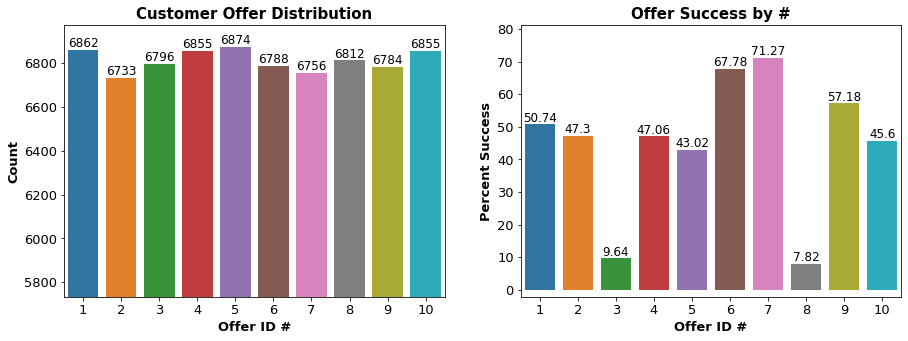

In [151]:
# Offer pct_success plot
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Data
pct_sort = pct_success.sort_values('percent_success', ascending=False)

# Plots
ax1 = sns.barplot(ax=axes[0], data=pct_success, x='offer_id', y='count')
ax2 = sns.barplot(ax=axes[1], data=pct_success, x='offer_id', y=pct_success['percent_success'].round(2))

# Style plot
ax1.set(ylim=(pct_success['count'].min() - 1000, pct_success['count'].max() + 100))
ax2.set(ylim=(pct_success['percent_success'].min() - 10, pct_success['percent_success'].max() + 10))
ax1.bar_label(ax1.containers[0], size=12); ax2.bar_label(ax2.containers[0], size=12)
style.style_sns_2('Customer Offer Distribution', 'Offer Success by #', 
                  'Offer ID #', 'Count', 'Offer ID #', 'Percent Success', ax1, ax2)

**Observation:** The results show quite an even distribution of offer success. However, things change for the last two results which are informational offers with just 9.6% and 7.8% offer success rates accordingly.

**References:** 
1. Seaborn Barplot Display Values: https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
2. Set Axis Limits: https://www.kite.com/python/answers/how-to-set-axis-limits-in-a-seaborn-lmplot-facetgrid-in-python
3. Annotate Bar Label: https://datavizpyr.com/annotate-barplot-with-bar_label-in-matplotlib/

#### Customer Offer Statistics

In [152]:
# Create a dataframe for offer_id n
cols = ['user_id', 'offer_id', 'offer_successful', 'income', 
        'income_1', 'income_2', 'income_3', 'income_4', 'income_5',
        'female', 'male', 'other', 'age', '18_24', '25_34', '35_44', 
        '45_54', '55_64', '65_74', '75_84', '85_94', '95_104', 
        '2013', '2014', '2015', '2016', '2017', '2018']

offer_1 = clean_verbose[cols][clean_verbose['offer_id'] == 1]
offer_2 = clean_verbose[cols][clean_verbose['offer_id'] == 2]
offer_3 = clean_verbose[cols][clean_verbose['offer_id'] == 3]
offer_4 = clean_verbose[cols][clean_verbose['offer_id'] == 4]
offer_5 = clean_verbose[cols][clean_verbose['offer_id'] == 5]
offer_6 = clean_verbose[cols][clean_verbose['offer_id'] == 6]
offer_7 = clean_verbose[cols][clean_verbose['offer_id'] == 7]
offer_8 = clean_verbose[cols][clean_verbose['offer_id'] == 8]
offer_9 = clean_verbose[cols][clean_verbose['offer_id'] == 9]
offer_10 = clean_verbose[cols][clean_verbose['offer_id'] == 10]

In [153]:
def offer_probability(df, col):
    '''This function calculates probability of a customer accepting 
    an offer based on a single input feature
    
    INPUT:
    df - DataFrame containing records of a specific offer_id
    col - column of DataFrame containing an input feature
    
    OUTPUT:
    p_result - a string including probability of the offer 
    being successful and unsuccessful 
    '''
    
    # Add count column for calculations
    df['count'] = 1
    
    # Pivot table to perform operations
    pb_df = \
    pd.pivot_table(df, 
    values='count', 
    index=['offer_successful'], 
    columns=[col], 
    aggfunc=np.size,
    fill_value=0)
    
    # Calculating probability
    p00, p01, p10, p11 = pb_df.iloc[0,0], pb_df.iloc[0,1], \
                         pb_df.iloc[1,0], pb_df.iloc[1,1]
    
    # Probability of an offer being successful
    Pa = (p10 + p11) / (p10 + p11 + p00 + p01)
    Pb = (p01 + p11) / (p10 + p11 + p00 + p01)
    Panb = p11 / (p10 + p11 + p00 + p01)

    # Probability of offers to males being successful
    p_result = Panb / Pb
    print('Probability of', pb_df.columns.name, pb_df.index.name, round(p_result *100, 2), '%')
    print('Probability of', pb_df.columns.name, 'offer_unsuccessful', round(100 - p_result *100, 2), '%')
    
    
def print_offer_probability(df):
    '''This function calculates probability of a customer accepting 
    an offer based on a single input feature

    INPUT:
    df - DataFrame containing records of a specific offer_id
    col - column of DataFrame containing an input feature

    OUTPUT:
    a list including probability of the offer 
    being successful and unsuccessful 
    '''

    # Loop through offer_probability to create results df
    unused_cols = ['male', 'female', 'other', 'income_1', 'income_2', 
            'income_3', 'income_4', 'income_5''18_24', '25_34', 
            '35_44', '45_54', '55_64', '65_74', '75_84', '85_94', 
            '95_104', '2013', '2014', '2015', '2016', '2017', '2018']

    # Select columns
    cols = ['male', 'female', 'other', '2013', '2014', '2015', 
            '2016', '2017', '2018']

    # Loop through the columns in offer_probability (no need to print twice)
    for idx in range(len(cols)):
        offer_probability(df, cols[idx]);

**Reference:** <br>
Conditional Probability with a Python Example https://towardsdatascience.com/conditional-probability-with-a-python-example-fd6f5937cd2

In [154]:
def offer_percentage(df, col):
    '''This function calculates the offer success percentage
    
    INPUT:
    df - DataFrame containing records of a specific offer_id
    col - column of DataFrame containing an input feature
    
    OUTPUT:
    print - a string including percentage of the offers 
    being successful and unsuccessful
    '''
    
    # Offer successful percentage of input col
    success = df[(df[col] == 1) & (df['offer_successful'] == 1)].shape[0] / df[col].sum()
    failed = df[(df[col] == 1) & (df['offer_successful'] == 0)].shape[0] / df[col].sum()

    # Print results
    print('Offer successful percentage for', col, round(success *100, 2), '%')
    print('Offer unsuccessful percentage for', col, round(failed *100, 2), '%')

In [155]:
def offer_demographics(df, offer, success):
    '''This function calculates demographics of a customer
    
    INPUT:
    df - DataFrame containing records of a specific offer_id
    offer - offer_id number (integer)
    success - determines if offer was successful. 1: yes, 0: no (integer)
    
    OUTPUT:
    print - mean of income and age for selected offer (float)
    '''
    
    # Filter selected offer
    cur_offer = df[(df['offer_id'] == offer) & (df['offer_successful'] == success)]
    
    # Drop duplicate user ids affecting the calculations
    cur_offer = cur_offer.drop_duplicates(subset='user_id')
    
    # Calculate mean
    cur_mean = cur_offer[['income', 'age']].mean()
    
    print(cur_mean)

#### Training Data Verbose Start

In [156]:
data_shape = print('Dataset Shape:', clean_data.shape)
training_shape = print('Training Shape:', training_data.shape)
training_split = print('Training Spilt:', training_data.shape[0]/clean_data.shape[0] * 100, '%')

Dataset Shape: (68115, 42)
Training Shape: (43593, 31)
Training Spilt: 63.999119136754025 %


In [157]:
training_data_verbose.head()

,offer_id,total_amount,difficulty,duration,reward,bogo,discount,mobile,social,web,female,male,other,member_days,income,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104,2013,2014,2015,2016,2017,2018,offer_successful,user_id,time,informational,email,income_1,income_2,income_3,income_4,income_5,age
0,9.0,15.40,5.0,5.0,5.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2058.0,73000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,4622,7,0,1,0,0,0,1,0,69
1,1.0,8.70,10.0,7.0,10.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1148.0,67000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,10808,7,0,1,0,0,1,0,0,52
2,10.0,48.20,10.0,7.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1456.0,64000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,9992,21,0,1,0,0,1,0,0,24
3,4.0,91.56,5.0,7.0,5.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1660.0,57000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,13777,14,0,1,0,0,1,0,0,49
4,1.0,54.21,10.0,7.0,10.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1462.0,106000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,3684,21,0,1,0,0,0,0,1,68


In [158]:
# Dataset is imbalanced 8 to 10 in favour of successful offers
clean_data[clean_data['offer_successful'] == 1].shape[0] / clean_data[clean_data['offer_successful'] == 0].shape[0]

0.8088750796685787

In [159]:
# Dataset is imbalanced 8.1 to 10 in favour of successful offers
training_data[training_data['offer_successful'] == 1] \
.shape[0] / training_data[training_data['offer_successful'] == 0].shape[0]

0.8099647083246834

In [160]:
# Dataset is imbalanced 7.3 to 10 in favour of successful offers
training_data_verbose[training_data_verbose['offer_successful'] == 1] \
.shape[0] / training_data_verbose[training_data_verbose['offer_successful'] == 0].shape[0]

0.7667472510332995

In [161]:
# Compute the value of the relevant boolean conditions
male = training_data['male'] == 1
female = training_data['female'] == 1
other = training_data['other'] == 1

# Create categorical series data
cat = pd.Series(pd.Categorical([np.nan] * len(training_data),
                                categories=['female', 'male', 'other']),
                                index=training_data.index)

# Create labels
cat[female] = 'female'
cat[male] = 'male'
cat[other] = 'other'

# Assign to new column
training_data['gender'] = cat

In [162]:
training_data_verbose.head()

,offer_id,total_amount,difficulty,duration,reward,bogo,discount,mobile,social,web,female,male,other,member_days,income,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104,2013,2014,2015,2016,2017,2018,offer_successful,user_id,time,informational,email,income_1,income_2,income_3,income_4,income_5,age
0,9.0,15.40,5.0,5.0,5.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2058.0,73000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,4622,7,0,1,0,0,0,1,0,69
1,1.0,8.70,10.0,7.0,10.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1148.0,67000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,10808,7,0,1,0,0,1,0,0,52
2,10.0,48.20,10.0,7.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1456.0,64000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,9992,21,0,1,0,0,1,0,0,24
3,4.0,91.56,5.0,7.0,5.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1660.0,57000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,13777,14,0,1,0,0,1,0,0,49
4,1.0,54.21,10.0,7.0,10.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1462.0,106000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,3684,21,0,1,0,0,0,0,1,68


#### Training Data Verbose Ends

In [163]:
success_df

,offer_id,count,offer_successful,male,female,other,male_u,female_u,other_u,male_%,male_u%,female_%,female_u%,other_%,other_u%,percent_success,success_dist
0,1,6862,3482,1965,1467,50,1975,1365,40,56.433084,58.431953,42.130959,40.384615,1.435956,1.183432,50.743224,11.431761
1,2,6733,3185,1865,1265,55,2040,1461,47,58.555730,57.497182,39.717425,41.178129,1.726845,1.324690,47.304322,10.456679
2,3,6796,655,359,286,10,3487,2570,84,54.809160,56.782283,43.664122,41.849862,1.526718,1.367855,9.638022,2.150432
3,4,6855,3226,1826,1347,53,2022,1552,55,56.602604,55.717829,41.754495,42.766602,1.642901,1.515569,47.060540,10.591287
4,5,6874,2957,1666,1244,47,2286,1579,52,56.340886,58.360991,42.069665,40.311463,1.589449,1.327547,43.017166,9.708132
5,6,6788,4601,2592,1940,69,1275,889,23,56.335579,58.299040,42.164747,40.649291,1.499674,1.051669,67.781379,15.105552
6,7,6756,4815,2764,1977,74,1102,812,27,57.403946,56.774858,41.059190,41.834106,1.536864,1.391036,71.269982,15.808136
7,8,6812,533,307,216,10,3663,2545,71,57.598499,58.337315,40.525328,40.531932,1.876173,1.130753,7.824427,1.749893
8,9,6784,3879,2252,1563,64,1666,1199,40,58.056200,57.349398,40.293890,41.273666,1.649910,1.376936,57.178656,12.735152
9,10,6855,3126,1783,1294,49,2107,1568,54,57.037748,56.503084,41.394754,42.048807,1.567498,1.448109,45.601751,10.262976


In [164]:
success_df1.head(5)

,offer_id,count,offer_successful,income_1_s,income_2_s,income_3_s,income_4_s,income_5_s,male_s,female_s,other_s,18_24_s,25_34_s,35_44_s,45_54_s,55_64_s,65_74_s,75_84_s,85_94_s,95_104_s,2013_s,2014_s,2015_s,2016_s,2017_s,2018_s,income_1_u,income_2_u,income_3_u,income_4_u,income_5_u,male_u,female_u,other_u,18_24_u,25_34_u,35_44_u,45_54_u,55_64_u,65_74_u,75_84_u,85_94_u,95_104_u,2013_u,2014_u,2015_u,2016_u,2017_u,2018_u,income_1_s%,income_2_s%,income_3_s%,income_4_s%,income_5_s%,male_s%,female_s%,other_s%,18_24_s%,25_34_s%,35_44_s%,45_54_s%,55_64_s%,65_74_s%,75_84_s%,85_94_s%,95_104_s%,2013_s%,2014_s%,2015_s%,2016_s%,2017_s%,2018_s%,income_1_u%,income_2_u%,income_3_u%,income_4_u%,income_5_u%,male_u%,female_u%,other_u%,18_24_u%,25_34_u%,35_44_u%,45_54_u%,55_64_u%,65_74_u%,75_84_u%,85_94_u%,95_104_u%,2013_u%,2014_u%,2015_u%,2016_u%,2017_u%,2018_u%,percent_success,success_dist
0,1,6862,3482,679,649,718,670,766,1965,1467,50,194,348,432,683,861,565,269,113,17,53,147,390,742,1293,857,599,609,765,707,700,1975,1365,40,172,315,431,705,776,575,279,109,18,67,146,339,713,1275,840,20.088757,19.201183,21.242604,19.822485,22.662722,58.136095,43.402367,1.479290,5.739645,10.295858,12.781065,20.207101,25.473373,16.715976,7.958580,3.343195,0.502959,1.568047,4.349112,11.538462,21.952663,38.254438,25.355030,17.721893,18.017751,22.633136,20.917160,20.710059,58.431953,40.384615,1.183432,5.088757,9.319527,12.751479,20.857988,22.958580,17.011834,8.254438,3.224852,0.532544,1.982249,4.319527,10.029586,21.094675,37.721893,24.852071,50.743224,11.431761
1,2,6733,3185,631,615,671,642,626,1865,1265,55,220,319,383,627,754,505,258,109,10,60,149,324,627,1211,814,686,670,742,742,708,2040,1461,47,200,310,468,747,777,608,310,117,11,81,156,402,726,1315,868,17.784667,17.333709,18.912063,18.094701,17.643743,52.564825,35.653890,1.550169,6.200676,8.990981,10.794814,17.671928,21.251409,14.233371,7.271702,3.072153,0.281849,1.691094,4.199549,9.131905,17.671928,34.131905,22.942503,19.334837,18.883878,20.913191,20.913191,19.954904,57.497182,41.178129,1.324690,5.636979,8.737317,13.190530,21.054115,21.899662,17.136415,8.737317,3.297632,0.310034,2.282976,4.396843,11.330327,20.462232,37.063134,24.464487,47.304322,10.456679
2,3,6796,655,113,107,148,159,128,359,286,10,43,61,94,124,170,83,57,18,5,11,28,72,130,242,172,1191,1193,1254,1302,1201,3487,2570,84,402,556,743,1274,1461,972,494,212,27,106,280,621,1308,2290,1536,1.840091,1.742387,2.410031,2.589155,2.084351,5.845953,4.657222,0.162840,0.700212,0.993324,1.530695,2.019215,2.768279,1.351571,0.928188,0.293112,0.081420,0.179124,0.455952,1.172447,2.116919,3.940726,2.800847,19.394235,19.426803,20.420127,21.201759,19.557075,56.782283,41.849862,1.367855,6.546165,9.053900,12.099007,20.745807,23.790914,15.828041,8.044292,3.452206,0.439668,1.726103,4.559518,10.112360,21.299463,37.290344,25.012213,9.638022,2.150432
3,4,6855,3226,640,609,697,649,631,1826,1347,53,180,316,401,674,747,492,279,122,15,54,138,357,625,1259,793,720,677,752,738,742,2022,1552,55,213,349,478,759,810,574,308,125,13,83,155,360,733,1368,930,17.635712,16.781483,19.206393,17.883715,17.387710,50.316892,37.117663,1.460457,4.960044,8.707633,11.049876,18.572610,20.584183,13.557454,7.688068,3.361808,0.413337,1.488013,3.802700,9.837421,17.222375,34.692753,21.851750,19.840176,18.655277,20.721962,20.336181,20.446404,55.717829,42.766602,1.515569,5.869386,9.616974,13.171673,20.914853,22.320198,15.817029,8.487187,3.444475,0.358225,2.287131,4.271149,9.920088,20.198402,37.696335,25.626894,47.060540,10.591287
4,5,6874,2957,572,550,585,614,636,1666,1244,47,188,274,340,589,635,552,249,110,20,52,118,342,588,1145,712,739,730,800,830,818,2286,1579,52,242,338,491,791,886,674,328,144,23,71,160,457,786,1435,1008,14.603013,14.041358,14.934899,15.675262,16.236916,42.532550,31.758999,1.199898,4.799592,6.995149,8.680112,15.037018,16.211386,14.092418,6.356906,2.808272,0.510595,1.327547,3.012510,8.731172,15.011488,29.231555,18.177176,18.866479,18.636712,20.423794,21.189686,20.883329,58.360991,40.311463,1

In [165]:
def melt_success_df(df, string, variable, cols):
    '''This function calculates demographics of a customer
    
    INPUT:
    df - DataFrame containing offer success data
    string - string to replace (string)
    variable - variable name (string)

    cols - list of variables (list)
    
    OUTPUT:
    melt_df - return output (DataFrame)
    '''
    
    # Melt df
    melt_df = pd.melt(frame=df, id_vars=['offer_id'], var_name=variable, 
                      value_vars=cols, value_name='pct_success')
    
    # Replace and capitalize strings
    melt_df[variable] = melt_df[variable].str.replace(string, '').str.capitalize()
    
    return melt_df

In [166]:
# Income success function
income_successful = melt_success_df(success_df1, '_s%','income_group', 
                              ['income_1_s%', 'income_2_s%', 
                               'income_3_s%', 'income_4_s%',
                               'income_5_s%'])
# Gender success function
gender_successful = melt_success_df(success_df1, '_s%', 'gender', ['male_s%', 'female_s%', 'other_s%'])

# Age success function
age_successful = melt_success_df(success_df1, '_s%', 'age_group', 
                           ['18_24_s%', '25_34_s%', '35_44_s%', '45_54_s%', 
                            '55_64_s%', '65_74_s%', '75_84_s%', '85_94_s%', 
                            '95_104_s%'])
# Member year success function
year_successful = melt_success_df(success_df1, '_s%', 'year_group', 
                            ['2013_s%', '2014_s%', '2015_s%', '2016_s%',
                             '2017_s%', '2018_s%'])

In [167]:
# Income success function
income_unsuccessful = melt_success_df(success_df1, '_u%','income_group', 
                              ['income_1_u%', 'income_2_u%', 
                               'income_3_u%', 'income_4_u%',
                               'income_5_u%'])
# Gender success function
gender_unsuccessful = melt_success_df(success_df1, '_u%', 'gender', ['male_u%', 'female_u%', 'other_u%'])

# Age success function
age_unsuccessful = melt_success_df(success_df1, '_u%', 'age_group', 
                           ['18_24_u%', '25_34_u%', '35_44_u%', '45_54_u%', 
                            '55_64_u%', '65_74_u%', '75_84_u%', '85_94_u%', 
                            '95_104_u%'])
# Member year success function
year_unsuccessful = melt_success_df(success_df1, '_u%', 'year_group', 
                            ['2013_u%', '2014_u%', '2015_u%', '2016_u%',
                             '2017_u%', '2018_u%'])

In [168]:
# List of DataFrames to be proccessed
df_list = [[income_successful, gender_successful, 
            age_successful, year_successful],
            [income_unsuccessful, gender_unsuccessful, 
            age_unsuccessful, year_unsuccessful]]

# Add successful bool column to each
for i in range(len(df_list[0])):
    df_list[0][i]['Successful'] = 'Yes'
for i in range(len(df_list[1])):
    df_list[1][i]['Successful'] = 'No'
        
# Merge successful and unsuccessful using dict comprehension
offer_success_dict = {i: pd.concat([df_list[0][i], df_list[1][i]]) 
                      for i in range(len(df_list[0]))}

**References:** 
1. https://www.geeksforgeeks.org/python-pandas-melt/
2. https://stackoverflow.com/questions/58119448/how-to-store-a-dataframe-in-a-dictionary

In [169]:
offer_success_dict[0].head()

,offer_id,income_group,pct_success,Successful
0,1,Income_1,20.088757,Yes
1,2,Income_1,17.784667,Yes
2,3,Income_1,1.840091,Yes
3,4,Income_1,17.635712,Yes
4,5,Income_1,14.603013,Yes


In [170]:
# Add yes and no for success

In [171]:
# Melt df for offer successful
os_melted = pd.melt(frame=success_df, id_vars=['offer_id'], 
                    value_vars=['male_%', 'female_%', 'other_%']). \
                    rename(columns={'variable':'gender', 
                                    'value':'pct_success'})

# Replace strings
os_melted = os_melted.replace('male_%', 'Male')
os_melted = os_melted.replace('female_%', 'Female')
os_melted = os_melted.replace('other_%', 'Other')

# Melt df for offer not successful
ous_melted = pd.melt(frame=success_df, id_vars=['offer_id'], 
                     value_vars=['male_u%', 'female_u%', 'other_u%']). \
                     rename(columns={'variable':'gender', 'value'
                                    :'pct_success'})

# Replace strings
ous_melted = ous_melted.replace('male_u%', 'Male')
ous_melted = ous_melted.replace('female_u%', 'Female')
ous_melted = ous_melted.replace('other_u%', 'Other')

os_melted.head()

,offer_id,gender,pct_success
0,1,Male,56.433084
1,2,Male,58.555730
2,3,Male,54.809160
3,4,Male,56.602604
4,5,Male,56.340886


In [172]:
# Capitlize first letter of each string for plot
#offer_gender_success['gender'] = offer_gender_success['gender'].str.capitalize()

In [173]:
# Filter columns by string
input_values = success_df1.columns[success_df1.columns.str.contains('%')]

In [174]:
# Create test df
melt = pd.melt(frame=success_df1, id_vars=['offer_id'], 
               value_vars=input_values). \
               rename(columns={'variable':'income', 'value'
                               :'pct_success'})

In [175]:
# Create a successful bool column
melt['Successful'] = melt['income'].apply(lambda x: 'Yes' if 's%' in x else 'No')

# Remove strings _s% and _u%
melt['income'] = melt['income'].replace({'_s%':''}, regex=True)
melt['income'] = melt['income'].replace({'_u%':''}, regex=True)

In [176]:
success_df1

,offer_id,count,offer_successful,income_1_s,income_2_s,income_3_s,income_4_s,income_5_s,male_s,female_s,other_s,18_24_s,25_34_s,35_44_s,45_54_s,55_64_s,65_74_s,75_84_s,85_94_s,95_104_s,2013_s,2014_s,2015_s,2016_s,2017_s,2018_s,income_1_u,income_2_u,income_3_u,income_4_u,income_5_u,male_u,female_u,other_u,18_24_u,25_34_u,35_44_u,45_54_u,55_64_u,65_74_u,75_84_u,85_94_u,95_104_u,2013_u,2014_u,2015_u,2016_u,2017_u,2018_u,income_1_s%,income_2_s%,income_3_s%,income_4_s%,income_5_s%,male_s%,female_s%,other_s%,18_24_s%,25_34_s%,35_44_s%,45_54_s%,55_64_s%,65_74_s%,75_84_s%,85_94_s%,95_104_s%,2013_s%,2014_s%,2015_s%,2016_s%,2017_s%,2018_s%,income_1_u%,income_2_u%,income_3_u%,income_4_u%,income_5_u%,male_u%,female_u%,other_u%,18_24_u%,25_34_u%,35_44_u%,45_54_u%,55_64_u%,65_74_u%,75_84_u%,85_94_u%,95_104_u%,2013_u%,2014_u%,2015_u%,2016_u%,2017_u%,2018_u%,percent_success,success_dist
0,1,6862,3482,679,649,718,670,766,1965,1467,50,194,348,432,683,861,565,269,113,17,53,147,390,742,1293,857,599,609,765,707,700,1975,1365,40,172,315,431,705,776,575,279,109,18,67,146,339,713,1275,840,20.088757,19.201183,21.242604,19.822485,22.662722,58.136095,43.402367,1.479290,5.739645,10.295858,12.781065,20.207101,25.473373,16.715976,7.958580,3.343195,0.502959,1.568047,4.349112,11.538462,21.952663,38.254438,25.355030,17.721893,18.017751,22.633136,20.917160,20.710059,58.431953,40.384615,1.183432,5.088757,9.319527,12.751479,20.857988,22.958580,17.011834,8.254438,3.224852,0.532544,1.982249,4.319527,10.029586,21.094675,37.721893,24.852071,50.743224,11.431761
1,2,6733,3185,631,615,671,642,626,1865,1265,55,220,319,383,627,754,505,258,109,10,60,149,324,627,1211,814,686,670,742,742,708,2040,1461,47,200,310,468,747,777,608,310,117,11,81,156,402,726,1315,868,17.784667,17.333709,18.912063,18.094701,17.643743,52.564825,35.653890,1.550169,6.200676,8.990981,10.794814,17.671928,21.251409,14.233371,7.271702,3.072153,0.281849,1.691094,4.199549,9.131905,17.671928,34.131905,22.942503,19.334837,18.883878,20.913191,20.913191,19.954904,57.497182,41.178129,1.324690,5.636979,8.737317,13.190530,21.054115,21.899662,17.136415,8.737317,3.297632,0.310034,2.282976,4.396843,11.330327,20.462232,37.063134,24.464487,47.304322,10.456679
2,3,6796,655,113,107,148,159,128,359,286,10,43,61,94,124,170,83,57,18,5,11,28,72,130,242,172,1191,1193,1254,1302,1201,3487,2570,84,402,556,743,1274,1461,972,494,212,27,106,280,621,1308,2290,1536,1.840091,1.742387,2.410031,2.589155,2.084351,5.845953,4.657222,0.162840,0.700212,0.993324,1.530695,2.019215,2.768279,1.351571,0.928188,0.293112,0.081420,0.179124,0.455952,1.172447,2.116919,3.940726,2.800847,19.394235,19.426803,20.420127,21.201759,19.557075,56.782283,41.849862,1.367855,6.546165,9.053900,12.099007,20.745807,23.790914,15.828041,8.044292,3.452206,0.439668,1.726103,4.559518,10.112360,21.299463,37.290344,25.012213,9.638022,2.150432
3,4,6855,3226,640,609,697,649,631,1826,1347,53,180,316,401,674,747,492,279,122,15,54,138,357,625,1259,793,720,677,752,738,742,2022,1552,55,213,349,478,759,810,574,308,125,13,83,155,360,733,1368,930,17.635712,16.781483,19.206393,17.883715,17.387710,50.316892,37.117663,1.460457,4.960044,8.707633,11.049876,18.572610,20.584183,13.557454,7.688068,3.361808,0.413337,1.488013,3.802700,9.837421,17.222375,34.692753,21.851750,19.840176,18.655277,20.721962,20.336181,20.446404,55.717829,42.766602,1.515569,5.869386,9.616974,13.171673,20.914853,22.320198,15.817029,8.487187,3.444475,0.358225,2.287131,4.271149,9.920088,20.198402,37.696335,25.626894,47.060540,10.591287
4,5,6874,2957,572,550,585,614,636,1666,1244,47,188,274,340,589,635,552,249,110,20,52,118,342,588,1145,712,739,730,800,830,818,2286,1579,52,242,338,491,791,886,674,328,144,23,71,160,457,786,1435,1008,14.603013,14.041358,14.934899,15.675262,16.236916,42.532550,31.758999,1.199898,4.799592,6.995149,8.680112,15.037018,16.211386,14.092418,6.356906,2.808272,0.510595,1.327547,3.012510,8.731172,15.011488,29.231555,18.177176,18.866479,18.636712,20.423794,21.189686,20.883329,58.360991,40.311463,1

**References:** 
1. https://datatofish.com/if-condition-in-pandas-dataframe/
2. https://stackoverflow.com/questions/42145340/using-lambda-conditional-and-pandas-str-contains-to-lump-strings
3. https://stackoverflow.com/questions/42331992/replace-part-of-the-string-in-pandas-data-frame
4. https://stackoverflow.com/questions/27975069/how-to-filter-rows-containing-a-string-pattern-from-a-pandas-dataframe

In [177]:
# Create successful column result
offer_successful_gender = os_melted.copy()
offer_successful_gender['Successful'] = 'Yes'

# Create unsuccessful column result
offer_unsuccessful_gender = ous_melted.copy()
offer_unsuccessful_gender['Successful'] = 'No'

# Merge both dfs
offer_gender_success = pd.concat([offer_successful_gender, offer_unsuccessful_gender])

# Capitlize first letter of each string for plot
#offer_gender_success['gender'] = offer_gender_success['gender'].str.capitalize()

**Reference:** https://www.geeksforgeeks.org/capitalize-first-letter-of-a-column-in-pandas-dataframe/

In [178]:
# Create function to anaylze customer offer
def offer_analysis(offer):
    '''This function calculates demographics 
    of a customer.
    
    INPUT:
    offer - offer id number (int)
    
    OUTPUT:
    return plot and offer results
    '''
    # Offer pct_success init 
    f, axes = plt.subplots(2, 2, figsize=(16, 12))
    ax = [axes[0,0], axes[0,1], axes[1,0], axes[1,1]]
    
    # Plot
    titles = ['Income', 'Gender', 'Age Group', 'Membership Year']
    x_var = ['income_group', 'gender', 'age_group', 'year_group']
    y_var = ['pct_success']

    palette = {'Yes': sns.color_palette('tab10')[0], 
               'No': sns.color_palette('tab10')[1]}
    
    # Suppress legend handle warning
    logging.getLogger().setLevel(logging.CRITICAL)

    for i in range(len(ax)):
        ax[i] = sns.barplot(ax=ax[i], x=x_var[i], y=y_var[0], hue='Successful', palette=palette,
                            data=offer_success_dict[i][offer_success_dict[i]['offer_id'] == offer])

        ax[i].set_title('Customer ' + titles[i], weight='bold', fontsize=15)
        ax[i].set_xlabel(x_var[i].replace('_', ' ').title(), weight='bold', fontsize=13)
        ax[i].set_ylabel('% Success'.replace('_', ' '), weight='bold', fontsize=13)
        ax[i].tick_params(labelsize=13)
        ax[i].legend(bbox_to_anchor=(-0.1, -.5), loc=8, ncol=3, 
                     title=offer_success_dict[0].columns[-1:].values[0])
        ax[i-1].legend().remove()
        
        for container in ax[i].containers:
            ax[i].bar_label(container, padding=5, fmt='%.2f%%', size=12, 
                            rotation='vertical', color='grey')
        
        # Limit bar height by padding max
        ax[i].set(ylim=(0, np.prod([offer_success_dict[i][offer_success_dict[i]
                                   ['offer_id'] == offer]['pct_success'].max(), 1.5])))
        
    # Padding and styling
    plt.subplots_adjust(wspace=.2 ,hspace=.4)
    sns.despine()
    
    print(bold.BOLD + 'Offer', offer, '\n' + bold.END)
    
    print(bold.BOLD + '- Offer Successful\n' + bold.END,
          ' Average customer income:', 
          '${:,.2f}'.format(clean_verbose[(clean_verbose['offer_id'] == offer) 
                              & clean_verbose['offer_successful'] == 1]['income'].mean(), 2),
          '\n  Average customer age:',
          round(clean_verbose[(clean_verbose['offer_id'] == offer) 
                              & clean_verbose['offer_successful'] == 1]['age'].mean(), 2), 'years\n')
#          '  Customer gender success:\n',
#          round(offer_success_dict[1][(offer_success_dict[1]['offer_id'] == offer) & 
#                                     (offer_success_dict[1]['Successful'] == 'Yes')] \
#                                     .iloc[:,1:-1].reset_index(drop=True), 2),
#         '  \nCustomer membership year success:\n',
#          round(offer_success_dict[3][(offer_success_dict[3]['offer_id'] == offer) & 
#                                     (offer_success_dict[3]['Successful'] == 'Yes')] \
#                                     .iloc[:,1:-1].reset_index(drop=True), 2))
    
    print(bold.BOLD + '\n- Offer Unsuccessful\n' + bold.END, 
          ' Average customer income:', 
          '${:,.2f}'.format(clean_verbose[(clean_verbose['offer_id'] == offer) 
                              & clean_verbose['offer_successful'] == 0]['income'].mean(), 2),
          '\n  Average customer age:',
          round(clean_verbose[(clean_verbose['offer_id'] == offer) 
                              & clean_verbose['offer_successful'] == 0]['age'].mean(), 2), 'years\n')
#          '  Customer gender success:\n',
#          round(offer_success_dict[1][(offer_success_dict[1]['offer_id'] == offer) & 
#                                     (offer_success_dict[1]['Successful'] == 'No')] \
#                                     .iloc[:,1:-1].reset_index(drop=True), 2),
#         '  \nCustomer membership year success:\n',
#          round(offer_success_dict[3][(offer_success_dict[3]['offer_id'] == offer) & 
#                                     (offer_success_dict[3]['Successful'] == 'No')] \
#                                     .iloc[:,1:-1].reset_index(drop=True), 2))

**References:**
1. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
2. https://stackoverflow.com/questions/46173419/seaborn-change-bar-colour-according-to-hue-name
3. https://thispointer.com/python-capitalize-the-first-letter-of-each-word-in-a-string/
4. https://www.geeksforgeeks.org/how-to-remove-the-legend-in-matplotlib/
5. https://stackoverflow.com/questions/59024250/suppress-warningmatplotlib-legendno-handles-with-labels-found-to-put-in-legend
6. https://www.delftstack.com/howto/matplotlib/how-to-make-a-single-legend-for-all-subplots-in-matplotlib/
7. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots_adjust.html#matplotlib.pyplot.subplots_adjust
8. https://stackoverflow.com/questions/21415661/logical-operators-for-boolean-indexing-in-pandas
9. https://stackoverflow.com/questions/13611065/efficient-way-to-apply-multiple-filters-to-pandas-dataframe-or-series
10. https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html
11. https://pandas.pydata.org/pandas-docs/version/0.13.1/visualization.html
12. https://stackoverflow.com/questions/1221108/barchart-with-vertical-labels-in-python-matplotlib
13. https://www.reddit.com/r/learnpython/comments/45c9kw/adding_or_in_python_without_space_in_between_the/
14. https://stackoverflow.com/questions/68320207/how-to-get-the-label-values-on-a-bar-chat-with-seaborn-on-a-categorical-data

#### Offer 1 Analysis

In [179]:
# Offer information
portfolio_new[portfolio_new['offer_id'] == 1]

,offer_id,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web
0,1,10,7,10,1,0,0,1,1,1,0


Offer 1 

- Offer Successful
  Average customer income: $65,812.46 
  Average customer age: 54.12 years


- Offer Unsuccessful
  Average customer income: $65,410.56 
  Average customer age: 54.41 years



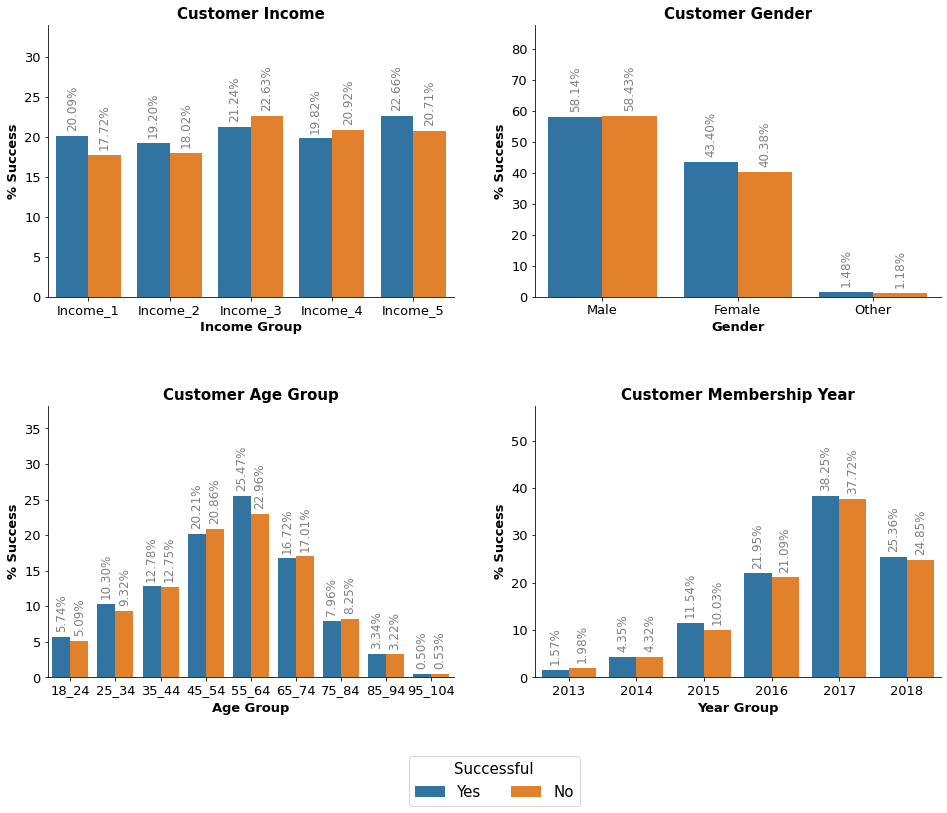

In [180]:
offer_analysis(1)

#### Offer 2 Analysis

In [181]:
# Offer information
portfolio_new[portfolio_new['offer_id'] == 2]

,offer_id,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web
1,2,10,5,10,1,0,0,1,1,1,1


Offer 2 

- Offer Successful
  Average customer income: $65,111.46 
  Average customer age: 53.8 years


- Offer Unsuccessful
  Average customer income: $65,446.79 
  Average customer age: 54.43 years



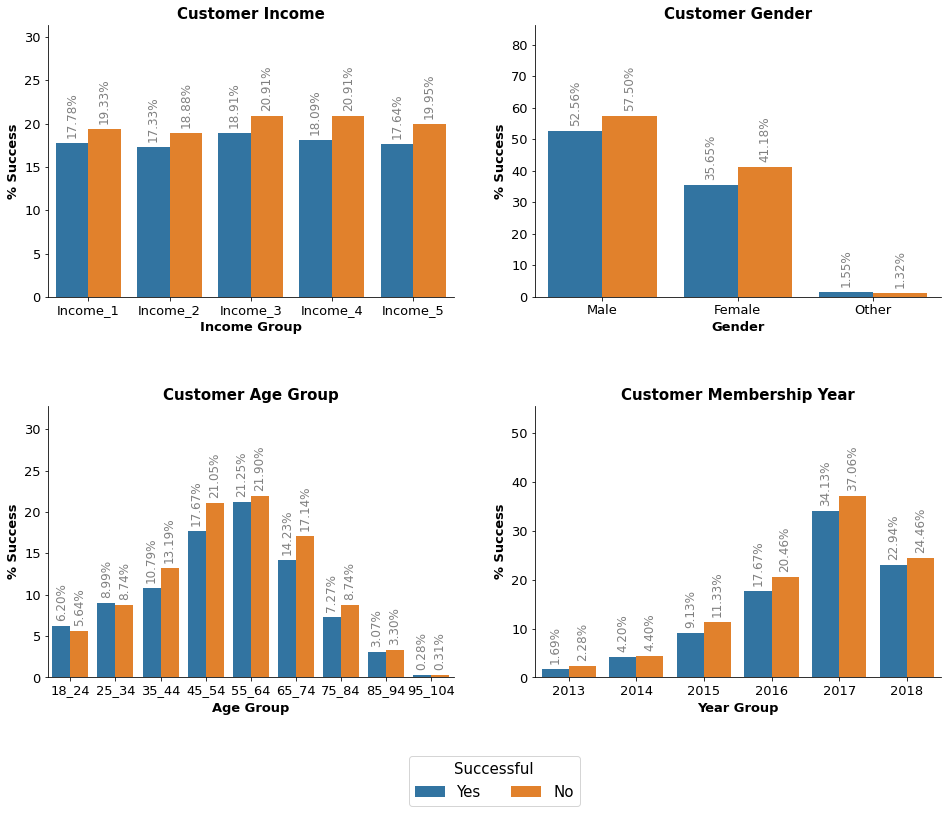

In [182]:
offer_analysis(2)

#### Offer 3 Analysis

In [183]:
# Offer information
portfolio_new[portfolio_new['offer_id'] == 3]

,offer_id,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web
2,3,0,4,0,0,0,1,1,1,0,1


Offer 3 

- Offer Successful
  Average customer income: $66,520.61 
  Average customer age: 53.58 years


- Offer Unsuccessful
  Average customer income: $65,420.53 
  Average customer age: 54.4 years



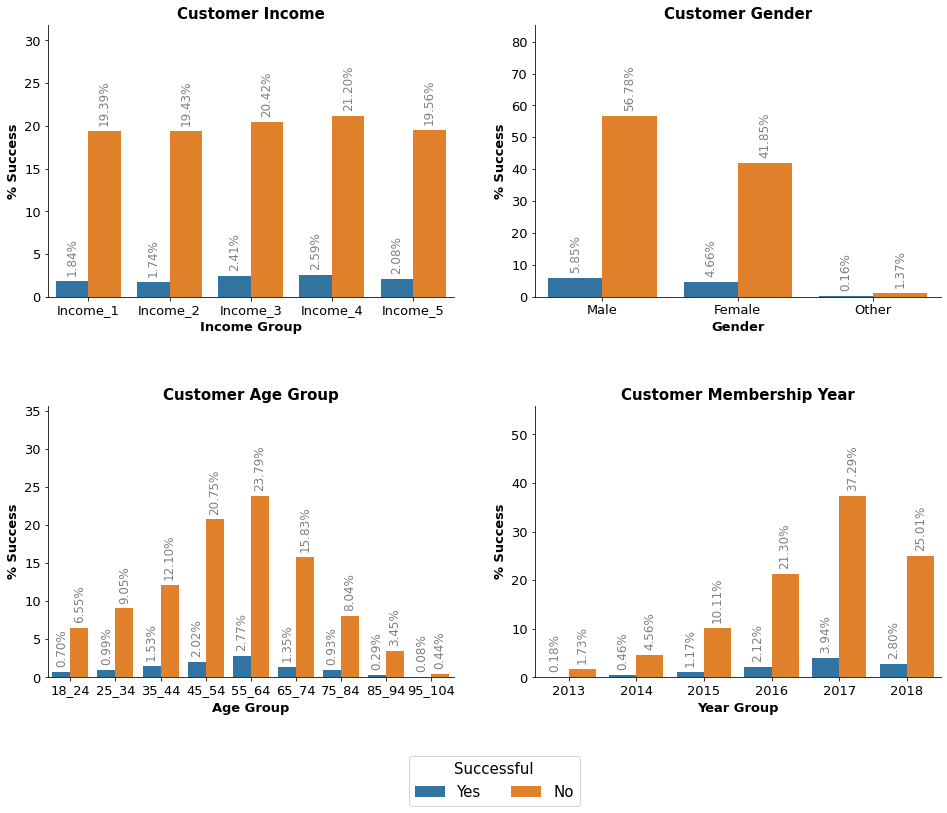

In [184]:
offer_analysis(3)

#### Offer 4 Analysis

In [185]:
# Offer information
portfolio_new[portfolio_new['offer_id'] == 4]

,offer_id,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web
3,4,5,7,5,1,0,0,1,1,0,1


Offer 4 

- Offer Successful
  Average customer income: $64,792.00 
  Average customer age: 54.3 years


- Offer Unsuccessful
  Average customer income: $65,462.88 
  Average customer age: 54.4 years



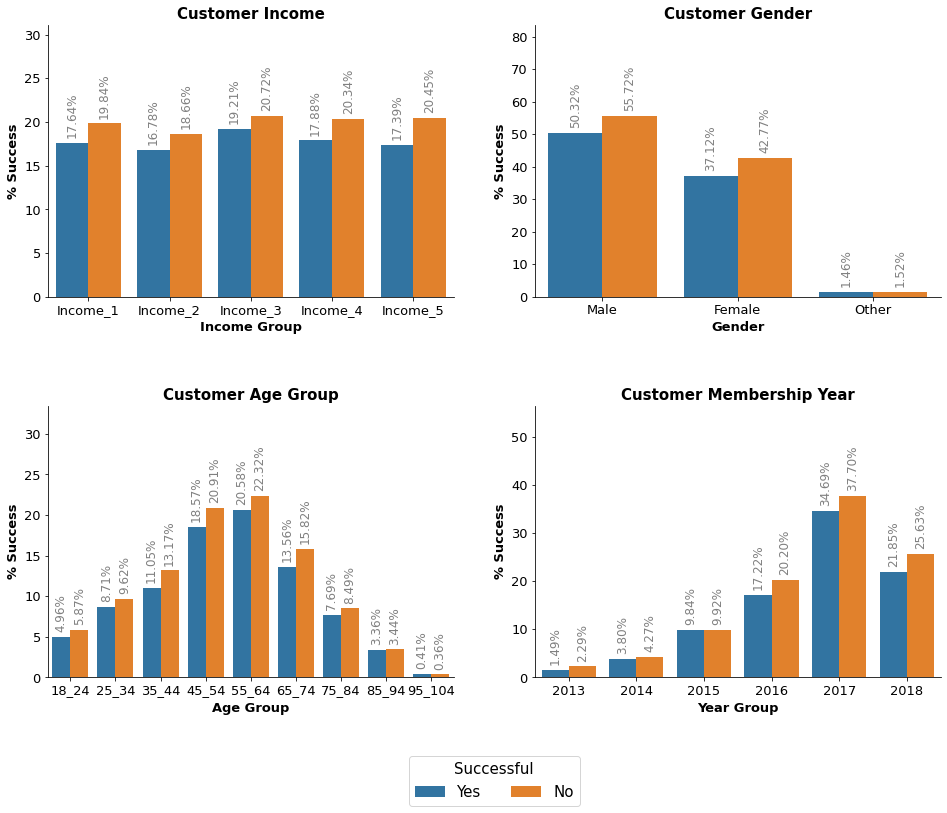

In [186]:
offer_analysis(4)

#### Offer 5 Analysis

In [187]:
# Offer information
portfolio_new[portfolio_new['offer_id'] == 5]

,offer_id,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web
4,5,20,10,5,0,1,0,1,0,0,1


Offer 5 

- Offer Successful
  Average customer income: $65,779.17 
  Average customer age: 54.91 years


- Offer Unsuccessful
  Average customer income: $65,415.31 
  Average customer age: 54.37 years



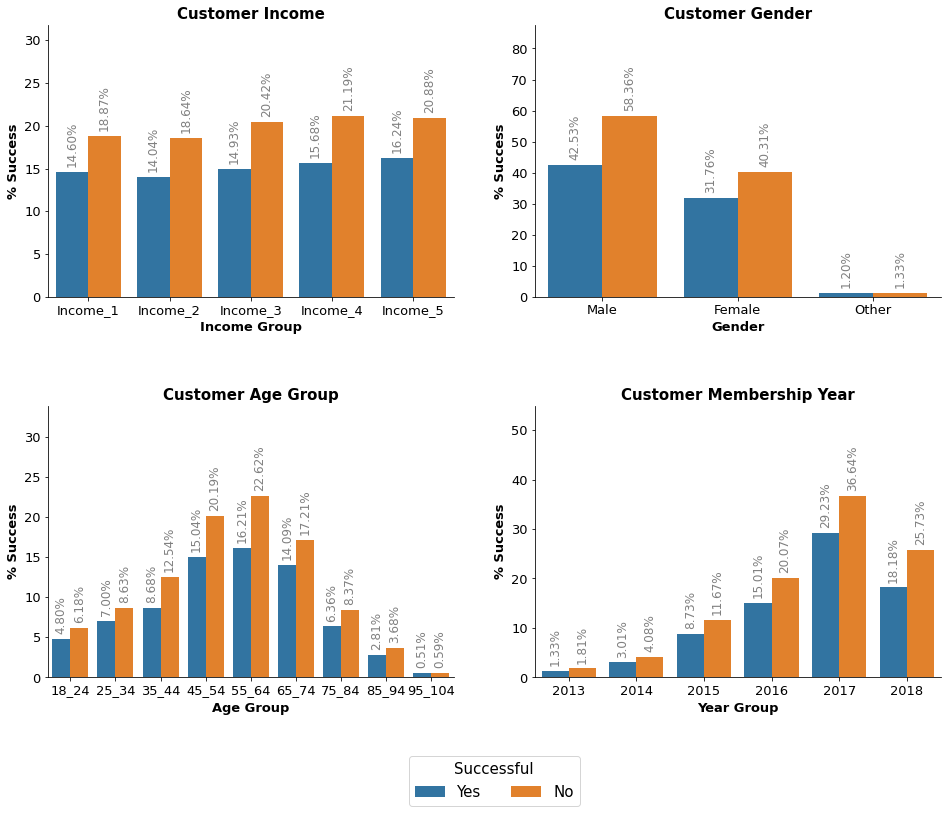

In [188]:
offer_analysis(5)

#### Offer 4 Analysis

In [189]:
# Offer information
portfolio_new[portfolio_new['offer_id'] == 6]

,offer_id,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web
5,6,7,7,3,0,1,0,1,1,1,1


Offer 6 

- Offer Successful
  Average customer income: $65,169.09 
  Average customer age: 54.64 years


- Offer Unsuccessful
  Average customer income: $65,450.09 
  Average customer age: 54.38 years



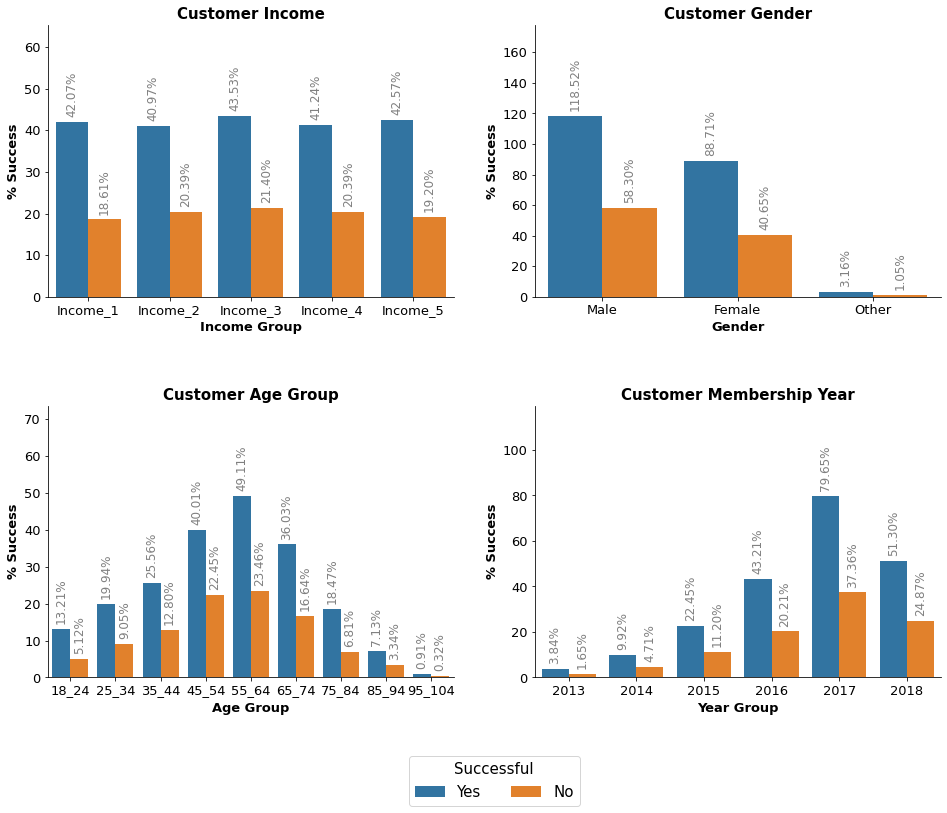

In [190]:
offer_analysis(6)

#### Offer 7 Analysis

In [191]:
# Offer information
portfolio_new[portfolio_new['offer_id'] == 7]

,offer_id,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web
6,7,10,10,2,0,1,0,1,1,1,1


Offer 7 

- Offer Successful
  Average customer income: $65,440.71 
  Average customer age: 54.11 years


- Offer Unsuccessful
  Average customer income: $65,430.38 
  Average customer age: 54.42 years



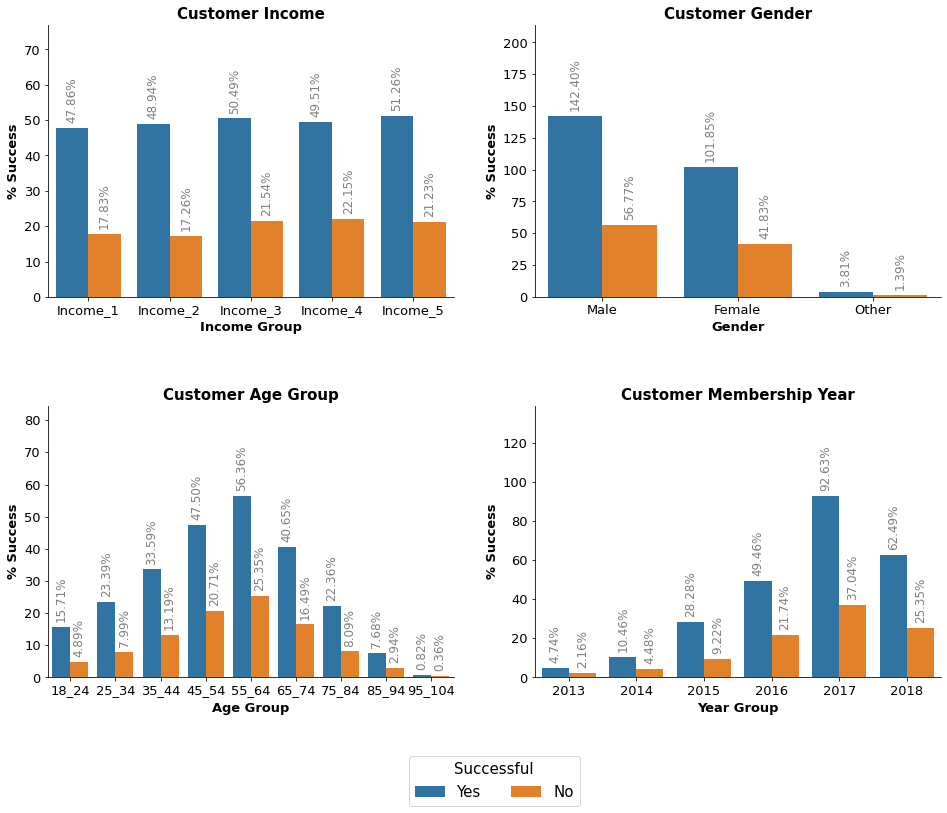

In [192]:
offer_analysis(7)

#### Offer 8 Analysis

In [193]:
# Offer information
portfolio_new[portfolio_new['offer_id'] == 8]

,offer_id,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web
7,8,0,3,0,0,0,1,1,1,1,0


Offer 8 

- Offer Successful
  Average customer income: $67,652.91 
  Average customer age: 54.76 years


- Offer Unsuccessful
  Average customer income: $65,413.59 
  Average customer age: 54.39 years



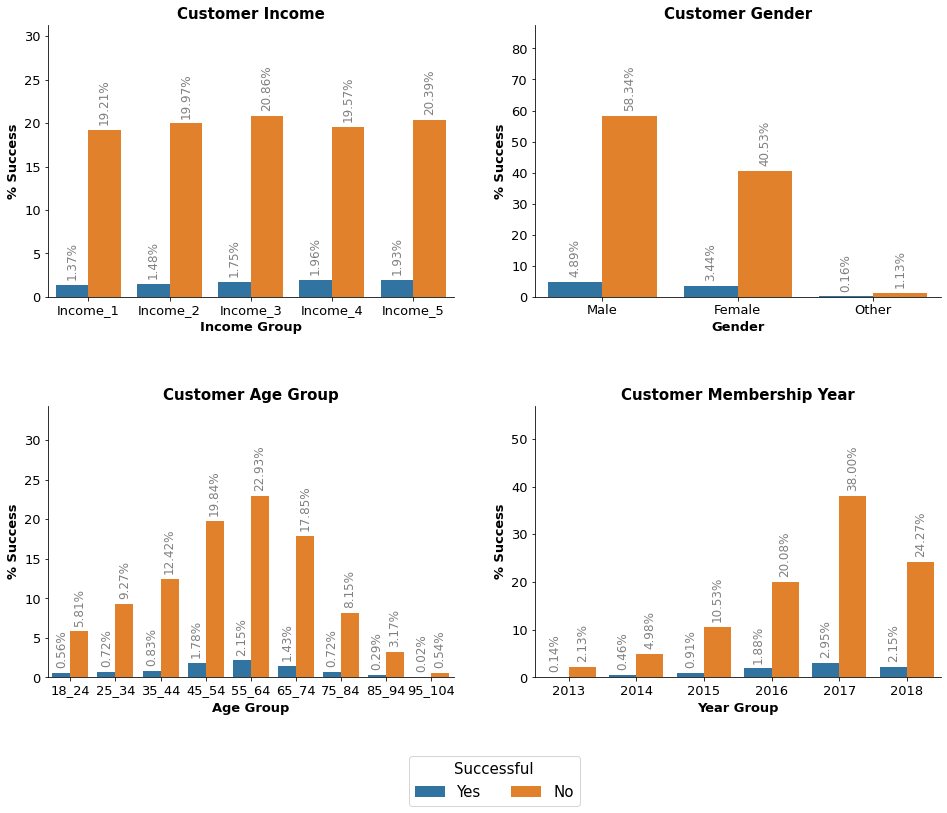

In [194]:
offer_analysis(8)

#### Offer 9 Analysis

In [195]:
# Offer information
portfolio_new[portfolio_new['offer_id'] == 9]

,offer_id,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web
8,9,5,5,5,1,0,0,1,1,1,1


Offer 9 

- Offer Successful
  Average customer income: $65,428.98 
  Average customer age: 54.1 years


- Offer Unsuccessful
  Average customer income: $65,431.24 
  Average customer age: 54.41 years



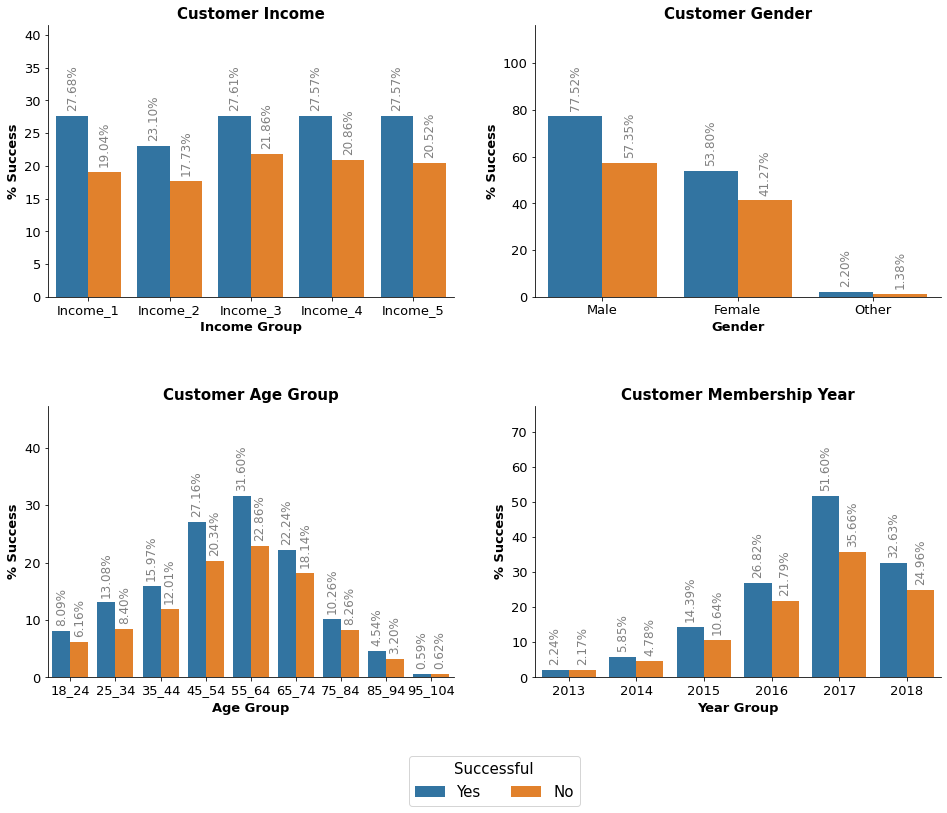

In [196]:
offer_analysis(9)

#### Offer 10 Analysis

In [197]:
# Offer information
portfolio_new[portfolio_new['offer_id'] == 10]

,offer_id,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web
9,10,10,7,2,0,1,0,1,1,0,1


Offer 10 

- Offer Successful
  Average customer income: $65,535.19 
  Average customer age: 54.45 years


- Offer Unsuccessful
  Average customer income: $65,426.10 
  Average customer age: 54.39 years



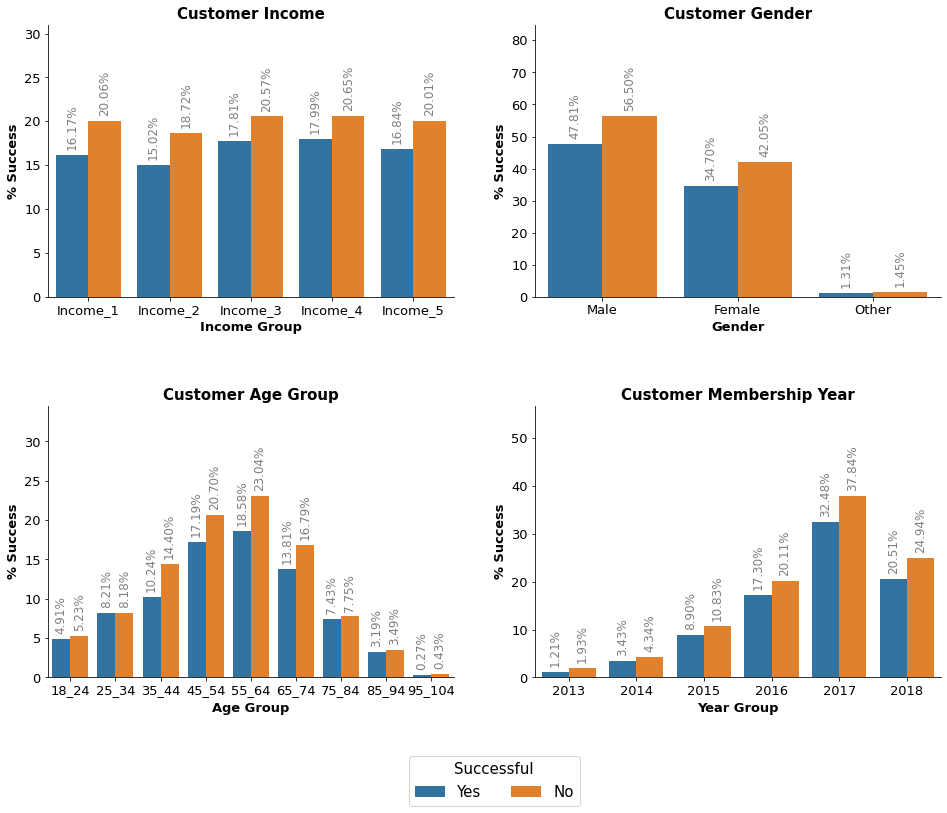

In [198]:
offer_analysis(10)

In [199]:
training_data_verbose.head()

,offer_id,total_amount,difficulty,duration,reward,bogo,discount,mobile,social,web,female,male,other,member_days,income,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104,2013,2014,2015,2016,2017,2018,offer_successful,user_id,time,informational,email,income_1,income_2,income_3,income_4,income_5,age
0,9.0,15.40,5.0,5.0,5.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2058.0,73000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,4622,7,0,1,0,0,0,1,0,69
1,1.0,8.70,10.0,7.0,10.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1148.0,67000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,10808,7,0,1,0,0,1,0,0,52
2,10.0,48.20,10.0,7.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1456.0,64000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,9992,21,0,1,0,0,1,0,0,24
3,4.0,91.56,5.0,7.0,5.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1660.0,57000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,13777,14,0,1,0,0,1,0,0,49
4,1.0,54.21,10.0,7.0,10.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1462.0,106000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,3684,21,0,1,0,0,0,0,1,68


**Reference:** Dummies to categories - https://stackoverflow.com/questions/26762100/reconstruct-a-categorical-variable-from-dummies-in-pandas

In [200]:
success_trans = success_df.transpose().reset_index()

In [201]:
success_trans

,index,0,1,2,3,4,5,6,7,8,9
0,offer_id,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000
1,count,6862.000000,6733.000000,6796.000000,6855.000000,6874.000000,6788.000000,6756.000000,6812.000000,6784.000000,6855.000000
2,offer_successful,3482.000000,3185.000000,655.000000,3226.000000,2957.000000,4601.000000,4815.000000,533.000000,3879.000000,3126.000000
3,male,1965.000000,1865.000000,359.000000,1826.000000,1666.000000,2592.000000,2764.000000,307.000000,2252.000000,1783.000000
4,female,1467.000000,1265.000000,286.000000,1347.000000,1244.000000,1940.000000,1977.000000,216.000000,1563.000000,1294.000000
5,other,50.000000,55.000000,10.000000,53.000000,47.000000,69.000000,74.000000,10.000000,64.000000,49.000000
6,male_u,1975.000000,2040.000000,3487.000000,2022.000000,2286.000000,1275.000000,1102.000000,3663.000000,1666.000000,2107.000000
7,female_u,1365.000000,1461.000000,2570.000000,1552.000000,1579.000000,889.000000,812.000000,2545.000000,1199.000000,1568.000000
8,other_u,40.000000,47.000000,84.000000,55.000000,52.000000,23.000000,27.000000,71.000000,40.000000,54.000000
9,male_%,56.433084,58.555730,54.809160,56.602604,56.340886,56.335579,57.403946,57.598499,58.056200,57.037748


In [202]:
a = success_trans.loc[success_trans['index'] == 'male_%']
b = success_trans.loc[success_trans['index'] == 'female_%']
c = success_trans.loc[success_trans['index'] == 'other_%']
d = pd.concat([a, b])
e = pd.concat([d, c])

e = e.replace('male_%', 'Male')
e = e.replace('female_%', 'Female')
e = e.replace('other_%', 'Other')

In [203]:
f = success_trans.loc[success_trans['index'] == 'male_u%']
g = success_trans.loc[success_trans['index'] == 'female_u%']
h = success_trans.loc[success_trans['index'] == 'other_u%']
i = pd.concat([f, g])
j = pd.concat([i, h])

j = j.replace('male_u%', 'Male')
j = j.replace('female_u%', 'Female')
j = j.replace('other_u%', 'Other')

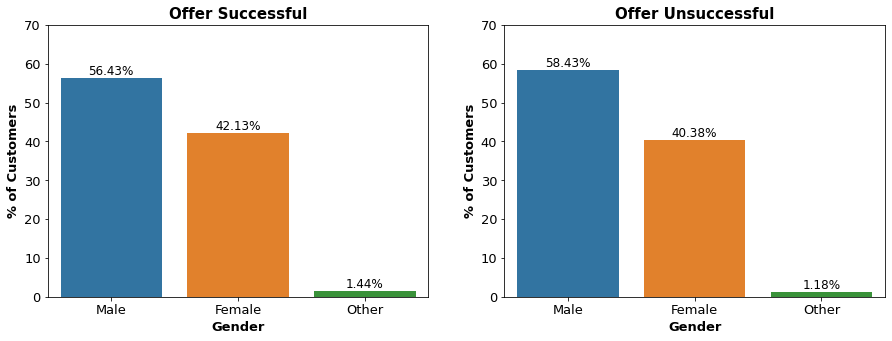

In [204]:
# Offer pct_success plot
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Plot
ax1 = sns.barplot(ax=axes[0], x='index', y=0, data=e.iloc[:, 0:2])
ax2 = sns.barplot(ax=axes[1], x='index', y=0, data=j.iloc[:, 0:2])

# Styling
ax1.set(ylim=(0, 70)); ax2.set(ylim=(0, 70))
ax1.bar_label(ax1.containers[0], fmt='%.2f%%', size=12)
ax2.bar_label(ax2.containers[0], fmt='%.2f%%', size=12)
style.style_sns_2('Offer Successful', 'Offer Unsuccessful', 'Gender', 
                  '% of Customers', 'Gender', '% of Customers', ax1, ax2)

In [205]:
# Percent of users who joined in 2013
(training_data['2013'].sum() / training_data.shape[0]) * 100

1.8535085908288027

In [206]:
print_offer_probability(training_data[training_data.loc[:, 'offer_id'] == 1].copy(deep=True))

Probability of male offer_successful 50.24 %
Probability of male offer_unsuccessful 49.76 %
Probability of female offer_successful 51.62 %
Probability of female offer_unsuccessful 48.38 %
Probability of other offer_successful 61.4 %
Probability of other offer_unsuccessful 38.6 %
Probability of 2013 offer_successful 45.45 %
Probability of 2013 offer_unsuccessful 54.55 %
Probability of 2014 offer_successful 48.96 %
Probability of 2014 offer_unsuccessful 51.04 %
Probability of 2015 offer_successful 53.68 %
Probability of 2015 offer_unsuccessful 46.32 %
Probability of 2016 offer_successful 51.14 %
Probability of 2016 offer_unsuccessful 48.86 %
Probability of 2017 offer_successful 50.73 %
Probability of 2017 offer_unsuccessful 49.27 %
Probability of 2018 offer_successful 50.7 %
Probability of 2018 offer_unsuccessful 49.3 %


In [207]:
offer_percentage(training_data[training_data.loc[:, 'offer_id'] == 1].copy(deep=True), 'male')

Offer successful percentage for male 50.24 %
Offer unsuccessful percentage for male 49.76 %


In [208]:
# Average customer income and age when offer successful
print('Offer Successful')
offer_demographics(training_data_verbose, 1, 1)

# Average customer income and age when offer unsuccessful
print('\nOffer Unsuccessful')
offer_demographics(training_data_verbose, 1, 0)

Offer Successful
income    65605.352798
age          54.053041
dtype: float64

Offer Unsuccessful
income    65745.068285
age          54.759737
dtype: float64


<a id='4.3'></a>
### 4.3. Building models

#### Finding the best model

To find the best model I've prepared a function below which takes a selection of models that might work well with the dataset. The function will test each of the models and return the accuracy, precision, recall, f1-score and support per model. We are going to test fit 5 different models on our dataset. The models chosen are:

1. Logistic Regression: basic linear classifier (a good baseline model)
2. Random Forest: ensemble bagging classifier
3. K-Nearest Neighbors: instance based classifier
4. Gaussian Naive Bayes: probabilistic classifier
5. XGBoost: ensemble (extreme!) boosting classifier

I have omitted SVM because it had one of the worst performing models and was slow to train/score. For the initial experiements, I used the default parameters for each model. To get better results for the fit of each model, we'll need to fine tune the parameters later. 

Below, our function will create a new dataset from the application of 5-fold cross validation on our training set. However, the metrics recorded here are weighted mean metrics across both classes. This may not work well if our dataset is imbalanced as performance on the majority class will overshadow the minority class. If this is the case, we may need to further tweak the code below. We can also modifiy our function to record only the metrics for the classes of interest!

**Choosing the Right Algorithm:**
1. https://www.dummies.com/programming/big-data/data-science/choosing-right-algorithm-machine-learning/
2. https://medium.com/quick-code/regression-versus-classification-machine-learning-whats-the-difference-345c56dd15f7

In [209]:
def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    dfs = [] 
    
    # Contains tuple of name and classifier or 'clf'
    models = [
              ('LogReg', LogisticRegression(max_iter=500)), # Stop iteration error
              ('RF', RandomForestClassifier()),
              ('KNN', KNeighborsClassifier()), 
              ('GNB', GaussianNB()),
              ('XGB', XGBClassifier(use_label_encoder=False, # Fix depreciation
                                    eval_metric='mlogloss')) 
             ]
    model_dir = './models'
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    target_names = ['unsuccessful', 'successful']
    
    for name, model in models:
            # Cross validation
            kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=random_state)
            cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
            
            # Fit the model on training set
            clf = model.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            
            # Create model folder if nonexistant
            if not os.path.exists(model_dir):
                os.mkdir(model_dir)
                
            # Save model files to disk    
            filename = name + '.joblib'
            file_path = os.path.join(model_dir, filename)
            joblib.dump(model, file_path)
            
            # Print classification report and evaluation output
            print(name)
            print(classification_report(y_test, y_pred, target_names=target_names))
            results.append(cv_results)
            names.append(name)
            this_df = pd.DataFrame(cv_results)
            this_df['model'] = name
            dfs.append(this_df)
            
    final = pd.concat(dfs, ignore_index=True)
    return final

In [210]:
final = run_exps(X_train, y_train, X_test, y_test)

LogReg
              precision    recall  f1-score   support

unsuccessful       0.85      0.93      0.89      7561
  successful       0.91      0.80      0.85      6062

    accuracy                           0.88     13623
   macro avg       0.88      0.87      0.87     13623
weighted avg       0.88      0.88      0.87     13623

RF
              precision    recall  f1-score   support

unsuccessful       0.92      0.90      0.91      7561
  successful       0.88      0.90      0.89      6062

    accuracy                           0.90     13623
   macro avg       0.90      0.90      0.90     13623
weighted avg       0.90      0.90      0.90     13623

KNN
              precision    recall  f1-score   support

unsuccessful       0.82      0.88      0.85      7561
  successful       0.83      0.76      0.79      6062

    accuracy                           0.82     13623
   macro avg       0.83      0.82      0.82     13623
weighted avg       0.82      0.82      0.82     13623

GNB
 

In [211]:
final

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.135408,0.010912,0.871086,0.874358,0.871086,0.870038,0.937139,LogReg
1,0.136400,0.011408,0.875789,0.878608,0.875789,0.874698,0.937129,LogReg
2,0.128464,0.010912,0.874756,0.877923,0.874756,0.873630,0.939121,LogReg
3,0.120032,0.010911,0.874627,0.877137,0.874627,0.873557,0.939723,LogReg
4,0.122016,0.010416,0.871530,0.874387,0.871530,0.870443,0.937170,LogReg
5,2.286061,0.256431,0.901480,0.901724,0.901480,0.901545,0.957719,RF
6,2.320282,0.253482,0.896662,0.896815,0.896662,0.896717,0.958654,RF
7,2.267213,0.247008,0.902741,0.903034,0.902741,0.902822,0.957925,RF
8,2.257294,0.250973,0.899862,0.900215,0.899862,0.899960,0.958985,RF
9,2.291020,0.254944,0.901124,0.901522,0.901124,0.901222,0.957951,RF


In [212]:
# Print the best performing model
print('The best performing model is', final[final['test_accuracy'] == final['test_accuracy'] \
      .max()]['model'].values[0])

The best performing model is XGB


#### Evaluating the results

To complete our analysis, we need to analyze the data in the `final` dataframe returned from the `run_exps()` script.
To obtain better estimates of the distribution of metrics from each model, we need to run empirical bootstrapping at 30 samples using the code below. Additionally, we should partition the data into two groups: 
- performance metrics
- fit-time metrics. 

In [213]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics

# Performance Metrics
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')

# Time Metrics
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

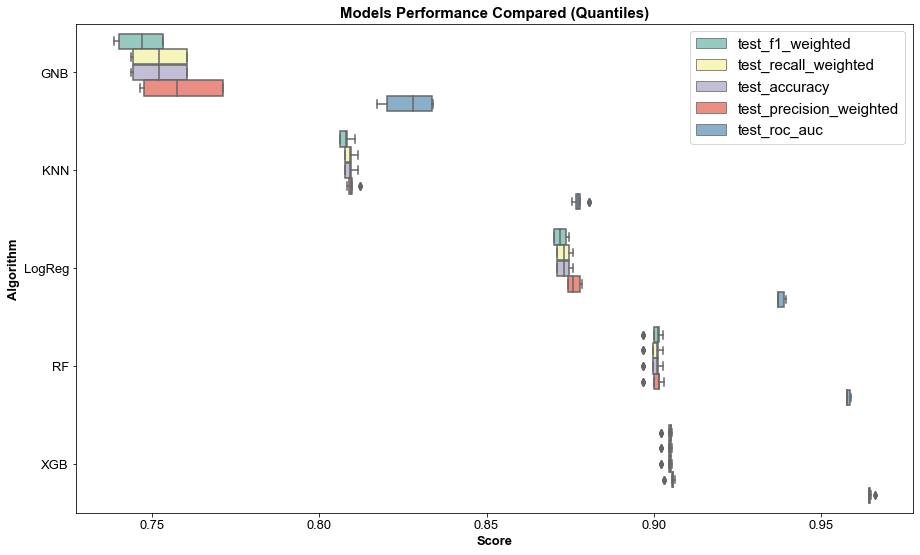

<Figure size 432x288 with 0 Axes>

In [214]:
# Plot
plt.figure(figsize=(15, 9))
ax = sns.boxplot(x="values", y="model", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(None), loc=1, borderaxespad=.5, fontsize=15)
plt.title('Comparison of Model by Classification Metric')

# Style chart
sns.set_style("whitegrid")
style.style_sns_1('Models Performance Compared (Quantiles)', 'Score', 'Algorithm')
plt.savefig('./benchmark_models_performance.png',dpi=300)
plt.show()

In [215]:
# Mean score of each model
max_scores = results_long_nofit.groupby('model').max().reset_index()
max_scores['metrics'] = 'test_overall_score'
max_scores = max_scores[['model', 'metrics', 'values']]
max_scores.sort_values(by='values', ascending=False)

,model,metrics,values
4,XGB,test_overall_score,0.966208
3,RF,test_overall_score,0.958985
2,LogReg,test_overall_score,0.939723
1,KNN,test_overall_score,0.880657
0,GNB,test_overall_score,0.833991


In [216]:
# Merge to create overall score bar for plot
ovr_scores = pd.concat([results_long_nofit, max_scores])

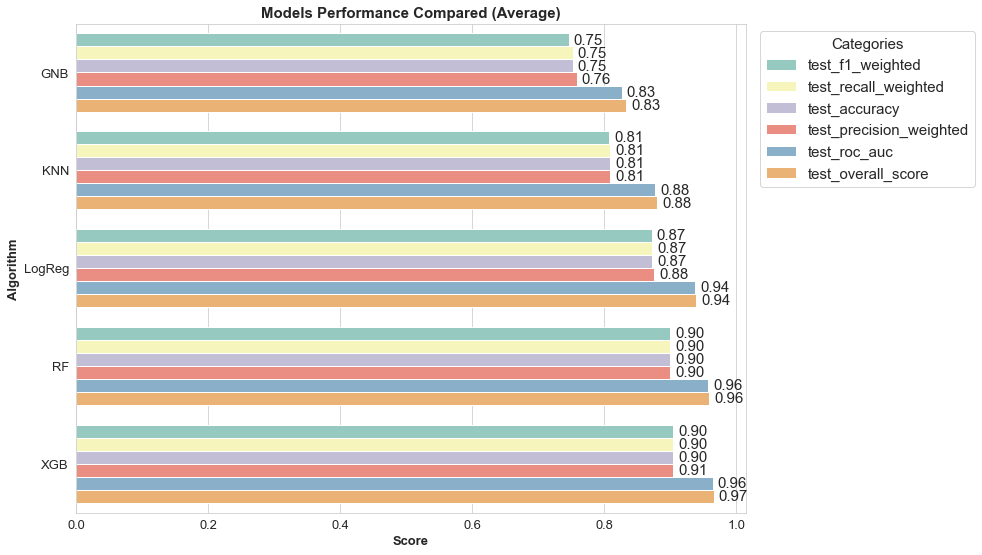

In [217]:
# Plot with error bar
plt.figure(figsize=(12, 9))
ax = sns.barplot(x='values', y='model', hue='metrics', 
                 data=ovr_scores, palette="Set3", errwidth=1,
                 ci=None)

for container in ax.containers:
    ax.bar_label(container, padding=5, fmt='%.2f') # Round values
    
# Style chart
ax.legend(title='Categories', bbox_to_anchor=(1.01, 1),
         fontsize='medium')
style.style_sns_1('Models Performance Compared (Average)', 'Score', 'Algorithm')

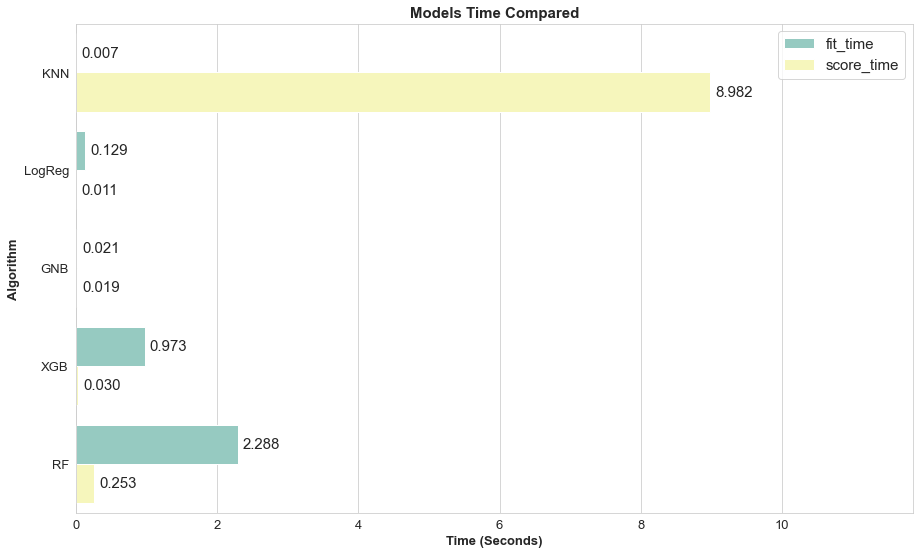

<Figure size 432x288 with 0 Axes>

In [218]:
# Plot
plt.figure(figsize=(15, 9))
ax = sns.barplot(x="values", y="model", hue="metrics", 
                 data=results_long_fit, palette="Set3",
                 ci=None) # Turn off error bars

# Display values
for container in ax.containers:
    ax.bar_label(container, padding=5, fmt='%.3f') # Round values

# Set tick limits
plt.xlim(0, results_long_fit['values'].max()+2)

# Style chart
sns.set_style("whitegrid")
plt.legend(bbox_to_anchor=(None), loc=1, borderaxespad=.5, fontsize=15)
plt.title('Comparison of Model by Fit and Score Time')
style.style_sns_1('Models Time Compared', 'Time (Seconds)', 'Algorithm')
plt.savefig('./benchmark_models_time.png',dpi=300)
plt.show()

**Observation:** From this plot we can see the best performing model appears to be **XGBoost**, followed by **Logistic Regression** and **Random Forest**. The differences are very small though. **KNN** was the fastest model to fit but also the took the longest to score by a large margin, the score times of the other models are extremely short. There seems to be a correlation between the length of time taken to fit the model and model performance as slower fitting models seem to perform better. The exception is **Random Forest** which takes the longest to fit but still ends up as the third-best performing model. From our findings, I would suggest continuing to refine the **XGBoost** model since it trains and performs the best of all the models.

Next, we can do further analysis on the models by finding the means and stds for each metric.

**Reference:**
1. https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
2. https://stackoverflow.com/questions/40088585/turn-off-error-bars-in-seaborn-bar-plot
3. https://matplotlib.org/1.3.1/users/legend_guide.html
4. https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [219]:
# Create df to compare models
metrics = list(set(results_long_nofit.metrics.values))
results = bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])
results

test_f1_weighted           test_roc_auc           test_accuracy  \
                    std      mean          std      mean           std   
model                                                                    
GNB            0.006151  0.746600     0.007249  0.826845      0.007193   
KNN            0.001546  0.807797     0.001832  0.877733      0.001455   
LogReg         0.001913  0.872043     0.001144  0.937991      0.001929   
RF             0.001981  0.900325     0.000469  0.958223      0.001970   
XGB            0.001203  0.904623     0.000555  0.964706      0.001205   

                 test_precision_weighted           test_recall_weighted  \
            mean                     std      mean                  std   
model                                                                     
GNB     0.752271                0.010463  0.758663             0.007193   
KNN     0.809054                0.001244  0.809683             0.001455   
LogReg  0.873122                0.001792  0.876080             0.001929   
RF      0.900242                0.002035  0.900548             0.001970   
XGB     0.904481                0.001195  0.905270             0.001205   

                  
            mean  
model             
GNB     0.752271  
KNN     0.809054  
LogReg  0.873122  
RF      0.900242  
XGB     0.904481

In [220]:
# Labels
time_metrics = list(set(results_long_fit.metrics.values))

# Group results
bootstrap_df.groupby(['model'])[time_metrics].agg([np.std, np.mean])

score_time            fit_time          
              std      mean       std      mean
model                                          
GNB      0.000866  0.018501  0.001446  0.021162
KNN      0.437226  8.981551  0.000511  0.006619
LogReg   0.000289  0.010879  0.006851  0.128629
RF       0.002780  0.253444  0.020664  2.288044
XGB      0.001795  0.030008  0.019257  0.973381

**Reference:**
1. https://towardsdatascience.com/quickly-test-multiple-models-a98477476f0
2. https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

<a id='4.4'></a>
### 4.4. Assessing models

It's time to review the models that we have created, from a technical standpoint but also from a business standpoint.

In [221]:
# Model assessment by grouped by mean
mass = results_long_nofit.groupby(['model', 'metrics']).mean().reset_index()

**Reference:** https://realpython.com/pandas-groupby/

#### Model assessment

We need to summarize the information developed in our model review. Since we have created several models, we can rank them based on our assessment of their value for a specific application.

In [222]:
# Best test accuracy
mass[mass['metrics'] == 'test_accuracy'].sort_values(by='values', ascending=False).reset_index(drop=True)

,model,metrics,values
0,XGB,test_accuracy,0.904481
1,RF,test_accuracy,0.900242
2,LogReg,test_accuracy,0.873122
3,KNN,test_accuracy,0.809054
4,GNB,test_accuracy,0.752271


**Observation:** **XGBoost** has the best **accuracy** from our observations, closely followed by **LogReg** and **KNN**.

In [223]:
# Best test f1 score
mass[mass['metrics'] == 'test_f1_weighted'].sort_values(by='values', ascending=False).reset_index(drop=True)

,model,metrics,values
0,XGB,test_f1_weighted,0.904623
1,RF,test_f1_weighted,0.900325
2,LogReg,test_f1_weighted,0.872043
3,KNN,test_f1_weighted,0.807797
4,GNB,test_f1_weighted,0.746600


**Observation:** **XGBoost** has the best **f1-score** from our observations, closely followed by **LogReg** but **KNN** a bit further back than before.

In [224]:
# Best test precision weighted
mass[mass['metrics'] == 'test_precision_weighted'].sort_values(by='values', ascending=False).reset_index(drop=True)

,model,metrics,values
0,XGB,test_precision_weighted,0.905270
1,RF,test_precision_weighted,0.900548
2,LogReg,test_precision_weighted,0.876080
3,KNN,test_precision_weighted,0.809683
4,GNB,test_precision_weighted,0.758663


**Observation:** **XGBoost** has the best **precision weighted** score from our observations, closely followed by **GNB** and **LogReg**.

In [225]:
# Best test_recall_weighted
mass[mass['metrics'] == 'test_recall_weighted'].sort_values(by='values', ascending=False).reset_index(drop=True)

,model,metrics,values
0,XGB,test_recall_weighted,0.904481
1,RF,test_recall_weighted,0.900242
2,LogReg,test_recall_weighted,0.873122
3,KNN,test_recall_weighted,0.809054
4,GNB,test_recall_weighted,0.752271


**Observation:** **XGBoost** has the best **recall weighted** score from our observations, closely followed by **LogReg** and **KNN**.

In [226]:
# Best test_roc_auc
mass[mass['metrics'] == 'test_roc_auc'].sort_values(by='values', ascending=False).reset_index(drop=True)

,model,metrics,values
0,XGB,test_roc_auc,0.964706
1,RF,test_roc_auc,0.958223
2,LogReg,test_roc_auc,0.937991
3,KNN,test_roc_auc,0.877733
4,GNB,test_roc_auc,0.826845


**Observation:** **XGBoost** has the best **ROC AUC** score from our observations, closely followed by **LogReg** and **GNB**.

From our findings, I would suggest continuing to refine the **XGBoost** model since it trains and performs the best of all the models.

#### Revised parameter settings
Since we have found our best performing model, we can fine-tune settings that were used to build the model and conduct another round of modeling and try to improve our results. **XGBoost** allows us to assess the incremental performance by the incremental number of trees. By using two arguments: eval_set - used for Train and Test sets and, eval_metric - used to measure our error on those evaluation sets.

In [227]:
model = XGBClassifier(use_label_encoder=False)
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["logloss","error"]
%time model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=False)

Wall time: 1.48 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [228]:
# Make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.33%


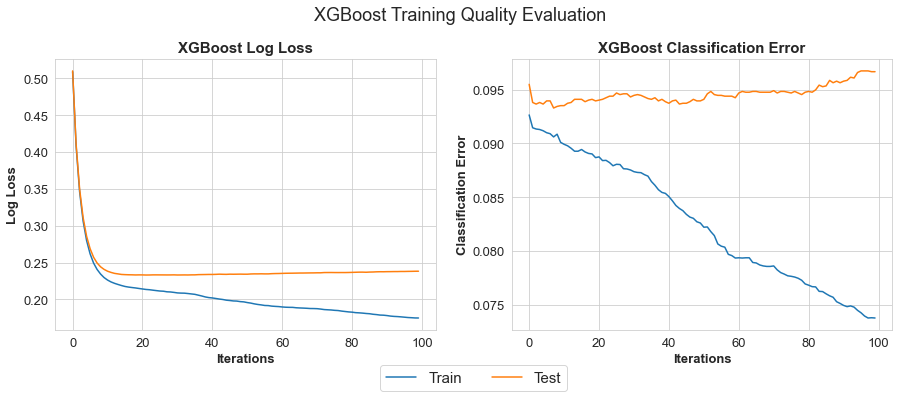

In [229]:
# Retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

f, axes = plt.subplots(1, 2, figsize=(15, 5))
f.suptitle('XGBoost Training Quality Evaluation\n\n', y=1.025)
ax1, ax2 = axes[0], axes[1]

# Plot log loss
ax1 = sns.lineplot(x=x_axis, y=results['validation_0']['logloss'], label='Train', ax=ax1)
ax1 = sns.lineplot(x=x_axis, y=results['validation_1']['logloss'], label='Test', ax=ax1)
ax1.legend().remove()

# Plot classification error
ax2 = sns.lineplot(x=x_axis, y=results['validation_0']['error'], label='Train', ax=ax2)
ax2 = sns.lineplot(x=x_axis, y=results['validation_1']['error'], label='Test', ax=ax2)
ax2.legend(bbox_to_anchor=(-0.1, -.25), loc=8, ncol=3)

style.style_sns_2('XGBoost Log Loss', 'XGBoost Classification Error', 'Iterations', 
                  'Log Loss', 'Iterations', 'Classification Error', ax1, ax2)

plt.show()

**Observation:** It looks like our model is learning alot until 15-20 iterations.

In [230]:
# Function used to time RandomSearchCV
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [231]:
# Check if pkl file already exists. If not, create pkl
file_path = './models/clf_optimised.pkl'
if os.path.exists(file_path):
    clf = joblib.load(file_path)
else:
    # Create parameter grid for XGBoost
    params = { 'max_depth': [3, 5, 6, 10, 15, 20],
               'learning_rate': [0.01, 0.1, 0.2, 0.3],
               'subsample': np.arange(0.5, 1.0, 0.1),
               'colsample_bytree': np.arange(0.4, 1.0, 0.1),
               'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
               'n_estimators': [100, 500, 1000]}

    xgbr = xgb.XGBRegressor(seed = 20)
    clf = RandomizedSearchCV(estimator=xgbr,
                             param_distributions=params,
                             scoring='neg_mean_squared_error',
                             n_iter=25,
                             verbose=1)

    # Time classifier fit
    start_time = timer(None) # timing starts from this point for "start_time" variable
    clf.fit(X, y)
    print("Best parameters:", clf.best_params_)
    print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

    # Save clf
    joblib.dump(clf, './models/clf_optimised.pkl')
    timer(start_time) # timing ends here for "start_time" variable

In [232]:
# Print results from RandomSearchCV
print(f'Lowest RMSE: {(-clf.best_score_)**(1/2.0)}')
print('Best parameters:')
clf.best_params_

Lowest RMSE: 0.2675807440289287
Best parameters:


{'subsample': 0.6,
 'n_estimators': 100,
 'max_depth': 5,
 'learning_rate': 0.2,
 'colsample_bytree': 0.7,
 'colsample_bylevel': 0.7}

In [233]:
# Load model
old_model = load('./models/XGB.joblib')
old_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [234]:
def tune_model(X_train, X_test, filename, compare=old_model):
    '''This is a function used to fine-tune
    model hyperparameters in order to compare
    scores to old model saved in joblib file.
    Tweak the model parameters then run the 
    function below to compare each model.
    
    INPUT:
    X_train - training matrix
    X_test - testing matrix
    compare(old_model) - original model from joblib
    
    OUTPUT:
    accuracy = predicting accuracy of model
    f1 = f1 score of model'''

    # Set parameters
    manual_params = {'silent':False, 'scale_pos_weight': 1, 
                     'learning_rate': 0.1,  'colsample_bytree': 1, 
                     'subsample': 0.1, 'objective':'binary:logistic', 
                     'n_estimators': 1000, 'reg_alpha': 0.4, 
                     'max_depth': 11, 'gamma': 1,'use_label_encoder': False}
    
    tuned_params = clf.best_params_
    param_sel = [manual_params, tuned_params]
    
    # Init classifer and select parameters
    model = XGBClassifier(use_label_encoder=False).set_params(**param_sel[1])
    
    # List of models to loop through
    m = [model, old_model]
    m_names = ['New Model', 'Old Model (joblib)']
    scores_list = []
    #train_scores_list = []
    models = [0, 1]
    
    for i in range(len(m)):
        print(m_names[i])
        eval_set = [(X_train, y_train), (X_test, y_test)]
        eval_metric = ["logloss","error"]
        %time models[i] = m[i].fit(X_train, y_train, eval_metric=eval_metric, \
                       eval_set=eval_set, verbose=False)

        # Make predictions for test data
        y_pred = m[i].predict(X_test)
        predictions = [round(value) for value in y_pred]

        # Evaluate predictions (test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        train_accuracy = accuracy_score(y_train, m[i].predict(X_train))
        train_f1 = f1_score(y_train, m[i].predict(X_train))
        
        # Score list - 0/1 is new acc and f1, 2/3 is old, etc
        scores_list.append(f1)
        scores_list.append(accuracy)
        
        # Print new scores vs old
        print("Accuracy: %.2f%%" % (accuracy * 100.0))
        print("F1 Score: %.2f%%" % (f1 * 100.0), '\n')
        print("Training Accuracy: %.2f%%" % (train_accuracy * 100.0))
        print("Training F1 Score: %.2f%%" % (train_f1 * 100.0), '\n')
        
    # Compare model scores (0 = new acc, 1 = new f1, 2 = old acc, 3 = old f1)
    if scores_list[2] < scores_list[0]:
        print(f'{m_names[0]} Accuracy + {round(scores_list[0] - scores_list[2], 3) * 100} % higer')
    else:
        print(f'{m_names[1]} Accuracy {round(scores_list[2] - scores_list[0], 3) * 100} % lower')
        
    if scores_list[3] < scores_list[1]:
        print(f'{m_names[0]} F1-score + {round(scores_list[1] - scores_list[3], 3) * 100} % higher')
    else:
        print(f'{m_names[1]} F1-score {round(scores_list[3] - scores_list[1], 3) * 100} % lower')
    
    
    # Save fine-tuned model
    filepath = './models/'
    joblib.dump(models[0], filepath + filename + '.joblib')
    
# Run function
tune_model(X_train, X_test, filename='XGB_tuned', compare=old_model)

New Model
Wall time: 1.21 s
Accuracy: 90.53%
F1 Score: 89.53% 

Training Accuracy: 91.40%
Training F1 Score: 90.58% 

Old Model (joblib)
Wall time: 1.42 s
Accuracy: 90.33%
F1 Score: 89.33% 

Training Accuracy: 92.62%
Training F1 Score: 91.92% 

New Model Accuracy + 0.2 % higer
New Model F1-score + 0.2 % higher


In [235]:
load('./models/XGB_tuned.joblib').fit(X_train, y_train, eval_metric=eval_metric,
                                      eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.56627	validation_0-error:0.10050	validation_1-logloss:0.56667	validation_1-error:0.10174
[1]	validation_0-logloss:0.48050	validation_0-error:0.09421	validation_1-logloss:0.48121	validation_1-error:0.09506
[2]	validation_0-logloss:0.41943	validation_0-error:0.09428	validation_1-logloss:0.42044	validation_1-error:0.09499
[3]	validation_0-logloss:0.37436	validation_0-error:0.09249	validation_1-logloss:0.37601	validation_1-error:0.09418
[4]	validation_0-logloss:0.34130	validation_0-error:0.09256	validation_1-logloss:0.34335	validation_1-error:0.09433
[5]	validation_0-logloss:0.33528	validation_0-error:0.09242	validation_1-logloss:0.33749	validation_1-error:0.09433
[6]	validation_0-logloss:0.31152	validation_0-error:0.09151	validation_1-logloss:0.31417	validation_1-error:0.09352
[7]	validation_0-logloss:0.30814	validation_0-error:0.09148	validation_1-logloss:0.31115	validation_1-error:0.09359
[8]	validation_0-logloss:0.30592	validation_0-error:0.09139	validation_1

[71]	validation_0-logloss:0.21249	validation_0-error:0.08772	validation_1-logloss:0.23362	validation_1-error:0.09411
[72]	validation_0-logloss:0.21230	validation_0-error:0.08774	validation_1-logloss:0.23369	validation_1-error:0.09396
[73]	validation_0-logloss:0.21217	validation_0-error:0.08763	validation_1-logloss:0.23383	validation_1-error:0.09396
[74]	validation_0-logloss:0.21204	validation_0-error:0.08754	validation_1-logloss:0.23388	validation_1-error:0.09411
[75]	validation_0-logloss:0.21163	validation_0-error:0.08738	validation_1-logloss:0.23391	validation_1-error:0.09411
[76]	validation_0-logloss:0.21135	validation_0-error:0.08749	validation_1-logloss:0.23391	validation_1-error:0.09455
[77]	validation_0-logloss:0.21103	validation_0-error:0.08751	validation_1-logloss:0.23410	validation_1-error:0.09469
[78]	validation_0-logloss:0.21086	validation_0-error:0.08747	validation_1-logloss:0.23421	validation_1-error:0.09477
[79]	validation_0-logloss:0.21077	validation_0-error:0.08756	val

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

**Observation:** It seems we have tuned this model very well out of the box so we don't have much room for improvement here. I have tried using RandomSearchCV to find the best parameters but the results are identical to our manually tuned model. We can enable **verbose=True** to get more information about each models' performance.

**References:** 
1. https://stackoverflow.com/questions/15704280/python-loop-through-a-range-of-variables/15704360
2. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
3. https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663
4. https://stackoverflow.com/questions/51424312/how-to-save-gridsearchcv-object
5. https://stackoverflow.com/questions/34674797/xgboost-xgbclassifier-defaults-in-python
6. https://datascience.stackexchange.com/questions/28426/train-accuracy-vs-test-accuracy-vs-confusion-matrix

<a id='5'></a>
## 5. Evaluation

We’ve explored the customer data and you’ve found patterns, and now we have to ask: Are the results any good? It's time to evaluate not just the models we have created, but also the process that we used to create them and their potential for practical use.

<a id='5.1'></a>
### 5.1. Evaluating results

#### Classification accuracy (Percentage of correct predictions)

In [236]:
# Load model
model = load('./models/XGB_tuned.joblib')

# Generate predictions with the model using our X values
y_pred = model.predict(X)

# Make class predictions for the testing set
y_pred_class = model.predict(X_test)

# Calculate accuracy
print('Classification Accuracy:', round(accuracy_score(y_test, y_pred_class)*100, 2), '%')

Classification Accuracy: 90.53 %


In [237]:
# examine the class distribution of the testing set (using a Pandas Series method)
np.where(y_test == 0) #.count()

(array([    1,     2,     3, ..., 13617, 13619, 13622], dtype=int64),)

In [238]:
# Mean of y_test
round(y_test.mean(), 3)

0.445

In [239]:
# y_test value counts
print('1:', y_test.shape[0] - np.count_nonzero(y_test),
      '\n0:', np.count_nonzero(y_test))

1: 7561 
0: 6062


In [240]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
xgb_cm = confusion_matrix(y_test, y_pred_class)
print(xgb_cm)

[[6816  745]
 [ 545 5517]]


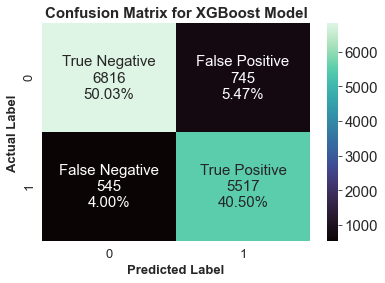

(0.9053072010570359, 0.8953261927945472)

In [241]:
# Confusion matrix function for xgb model
y_pred_class = model.predict(X_test)
xgb_cm = confusion_matrix(y_test, y_pred_class)

# Plot
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
categories = ['0', '1']
make_confusion_matrix(xgb_cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='mako')

# Style
style.style_sns_1('Confusion Matrix for XGBoost Model', 'Predicted Label', 'Actual Label')

# Scores
accuracy_score(y_test, y_pred_class), f1_score(y_test, y_pred_class)

In [242]:
# Basic terminology
print('True Positives (TP): we correctly predicted that a customer will respond to an offer', xgb_cm[1][1], 'times')
print('True Negatives (TN): we correctly predicted that a customer will not respond to an offer', xgb_cm[0][0], 'times')

# Falsly predict positive - Type I error
print('False Positives (FP): we incorrectly predicted that a customer will respond to an offer', xgb_cm[0][1], 'times')

# Falsly predict negative - Type II error
print('False Negatives (FN): we incorrectly predicted that a customer will not respond to an offer', xgb_cm[1][0], 'times')

True Positives (TP): we correctly predicted that a customer will respond to an offer 5517 times
True Negatives (TN): we correctly predicted that a customer will not respond to an offer 6816 times
False Positives (FP): we incorrectly predicted that a customer will respond to an offer 745 times
False Negatives (FN): we incorrectly predicted that a customer will not respond to an offer 545 times


In [243]:
# Accuracy score
accuracy_score(y_test, y_pred_class)

0.9053072010570359

In [244]:
# F1 score
f1_score(y, y_pred)

0.6179925741067624

In [245]:
# Create a list of features to plot importances for
feature_scores = []
for i in range(len(model.feature_importances_)):
    feature_scores.append(model.feature_importances_[i])

# Create DataFrame of feature importance
feature_importance = pd.DataFrame(data=feature_scores,
                    index=list(variables.columns),
                    columns=['feature_importance']). \
                    sort_values(by='feature_importance', 
                                ascending=False).reset_index(). \
                    rename(columns={'index':'feature_name'})

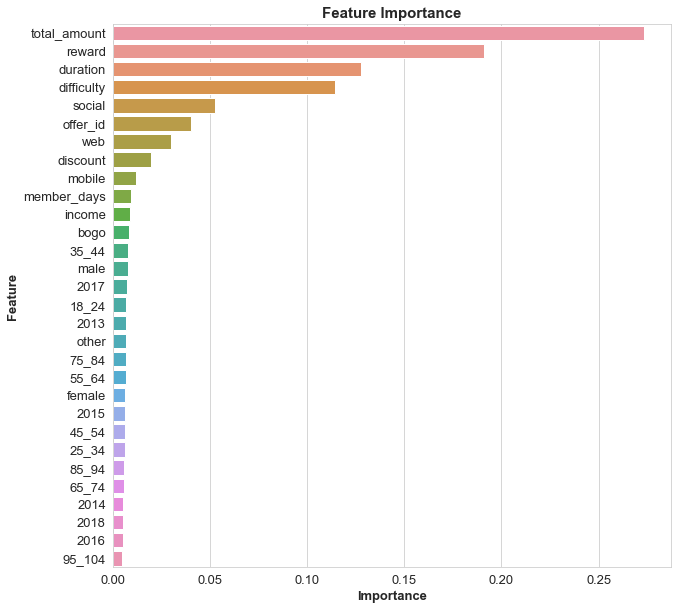

In [246]:
# Plot relative feature importance
f, ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(data=feature_importance, x='feature_importance', y='feature_name')

style.style_sns_1('Feature Importance', 'Importance', 'Feature')

In [247]:
# Top ten most important features
feature_importance[:10]

,feature_name,feature_importance
0,total_amount,0.273585
1,reward,0.190774
2,duration,0.127873
3,difficulty,0.114080
4,social,0.052473
5,offer_id,0.040354
6,web,0.030136
7,discount,0.019436
8,mobile,0.011611
9,member_days,0.009363


**References:**
1. https://stackoverflow.com/questions/54933804/how-to-get-actual-feature-names-in-xgboost-feature-importance-plot-without-retra
2. https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
3. https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8
4. https://newbedev.com/how-to-position-suptitle
5. https://stackoverflow.com/questions/56304562/numpy-float64-object-is-not-callable-in-aucrecall-precision
6. https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
7. https://towardsdatascience.com/how-to-evaluate-your-machine-learning-models-with-python-code-5f8d2d8d945b
8. https://www.ritchieng.com/machine-learning-evaluate-classification-model/
9. https://www.codegrepper.com/code-examples/python/sns+heatmap+annot+large+number+format
10. https://github.com/DTrimarchi10/confusion_matrix
11. https://stackoverflow.com/questions/44116194/import-a-function-from-another-ipynb-file

<a id='5.2'></a>
### 5.2. Reviewing the process

We wanted to find out if a customer would respond to an offer by building a model that predicts just that. 

**Step 1:** The first step was to evaluate the data we had to work with. We had three **json** files to work with, `portfolio.json` - includes offer meta data, `profile.json` - includes demographic data for each customer, and `transcript` - includes records for trasactions, offers viewed/received/completed.

**Step 2:** The second step was to convert each dataset to DataFrames before exploring and cleaning them in preparation to combining them. I saved the cleaned DataFrame as a `csv` file before splitting into training and testing sets. Next, I scaled the **X_train** and **X_test** arrays to minimise bias to prepare for fitting them into a suitable algorithm.

**Step 3:** I used a special function to loop over various selected algorithms to see how each compares with the model I fit. From the results **RF** and **XGBoost** scored very well so I continued fine tuning **XGBoost** using **RandomSearchCV** to find the best parameters to use on our model. I saved the model files and continued to further evaluate training quality by looking at the **Logloss** and **Classification Errors**. I also looked at the **Confusion Matrix** and **Feature Importance** of the model to make sure it can accuratly classify each prediction. My analysis returned training data scores of 

- Training Accuracy: 92.42%
- Training F1 Score: 91.70%

**Step 4:** Look at other ways to evaluate the model and determine if it is overfitting or underfitting.

**Step 5:** **Feature Importance** as discussed earlier refers to a numerical value used to describe the predictive power of each feature in the dataset. This is used to determine which features will provide the best fit for the model so accurate predictions can be made. This is importance, since variable selection is quite difficult. The top 5 importances are:
1. `total_amount` - amount spent by the customer
2. `reward` - reward given for completing an offer
3. `offer_duration` - time for offer to be open
4. `offer_difficulty` - minimum required spend to complete an offer
5. `social` - the offer was received on a social channel

<a id='5.3'></a>
### 5.3. Determining the next steps

The top 5 features are directly related with whether a customer will complete an offer, in this case it may be possible to improve the performance of our **XGBoost** model by creating new features using **Feature Creation**. This may help our model understand more without increasing the complexity of our model. We could also remove features to find results on how certain offers perform when shown to customers.

**Reference:** 
https://www.dummies.com/programming/big-data/data-science/machine-learning-creating-features-data/

<a id='6'></a>
## 6. Deployment

<a id='6.1'></a>
### 6.1. Planning deployment

Not neccessary as this is just a capstone project. If we had to deploy this model we would use a Machine Learning Pipeline to collect data from a determined source so that it could proccess new data continuously. Such data may be found in a SQL Database. We would also need to plan monitoring and regular maintainance by performing unit tests to make sure the results are within an acceptable tolerance. 

<a id='6.2'></a>
### 6.2. Reporting final results

The final report summarizes the entire project by assembling all the reports created up to this point, and adding an overview summarizing the entire project and its results. Our final presentation will be located in another notebook.

<a id='6.3'></a>
### 6.3. Reviewing final results

Here, we can discuss what worked and what didn't and what would be good to do again or what should be avoided.

- **What worked?** <br>
Feature engineering - I added a variable `member_days` which helped improve the predictive performance of our model
<br><br>
- **What didn't work?** <br> I tried using **Log Transformation** on `X_train` and `X_test` but the 0 values caused -inf issues
<br><br>
- **What would be good to do again?** <br>
The function used to automatically fit our data using various algorithms, this saves a lot of time
<br><br>
- **What should be avoided?** <br>
Spending too much time on complex analysis

<a id='7'></a>
## 7. Resources

#### General
https://towardsdatascience.com/crisp-dm-methodology-for-your-first-data-science-project-769f35e0346c <br>
https://towardsdatascience.com/how-to-convert-json-into-a-pandas-dataframe-100b2ae1e0d8 <br>
https://www.snapsurveys.com/blog/5-survey-demographic-question-examples/ <br>
https://pandas.pydata.org/docs/reference/api/pandas.Series.between.html <br>
https://www.geeksforgeeks.org/python-ways-to-convert-boolean-values-to-integer/ <br>
https://stackoverflow.com/questions/35321812/move-column-in-pandas-dataframe <br>
https://stackoverflow.com/questions/39602824/pandas-replace-string-with-another-string <br>
https://medium.com/analytics-vidhya/mastering-pandas-indexing-loc-iloc-47ee22b009db <br>
https://seaborn.pydata.org/tutorial/categorical.html <br>
https://machinelearningmastery.com/calculate-feature-importance-with-python/

#### Rename
https://www.quora.com/How-can-I-replace-characters-in-a-multiple-column-name-in-pandas <br>

#### Warnings
https://realpython.com/pandas-settingwithcopywarning/ <br>
https://re-thought.com/how-to-add-new-columns-in-a-dataframe-in-pandas/

#### EDA and Cleaning
https://humansofdata.atlan.com/2018/03/when-delete-outliers-dataset/ <br>
https://www.pluralsight.com/guides/cleaning-up-data-from-outliers <br>
https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e <br>

#### Value Counts
https://www.kaggle.com/parulpandey/five-ways-to-use-value-counts

#### Missing Data
https://pythonexamples.org/pandas-dataframe-fillna/ <br>
https://stackoverflow.com/questions/26837998/pandas-replace-nan-with-blank-empty-string <br>

#### Numpy
https://numpy.org/doc/stable/reference/generated/numpy.transpose.html

#### Datatypes
https://www.datacamp.com/community/tutorials/converting-strings-datetime-objects<br>
https://stackoverflow.com/questions/30405413/python-pandas-extract-year-from-datetime-dfyear-dfdate-year-is-not-wo <br>

#### Visualisations
https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8 <br>
https://stackoverflow.com/questions/38807895/seaborn-multiple-barplots/38808042 <br>

#### Dummies
https://stackoverflow.com/questions/55257957/removing-brackets-from-list-inside-pandas-cell <br>
https://stackoverflow.com/questions/18889588/create-dummies-from-column-with-multiple-values-in-pandas <br>
https://www.geeksforgeeks.org/python-pandas-series-str-get_dummies/ <br>

#### Saving data
https://www.kite.com/python/answers/how-to-save-and-read-a-list-in-python

#### Dictionaries and mapping
https://kanoki.org/2019/04/06/pandas-map-dictionary-values-with-dataframe-columns/

#### Progress Bar
https://github.com/tqdm/tqdm#parameters <br>

#### Data Mining
https://www.dummies.com/programming/big-data/data-science/data-mining-for-dummies-cheat-sheet/

#### Optional